# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [7]:
# this will help in making the Python code more structured automatically (good coding practice)
!pip install black[jupyter] --quiet

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display
from matplotlib.ticker import MaxNLocator


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to build linear regression_model using statsmodels
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to build logistic regression_model
from sklearn.linear_model import LogisticRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

custom = {"axes.edgecolor": "purple", "grid.linestyle": "solid", "grid.color": "black"}
sns.set_style("dark", rc=custom)

#format numeric data for easier readability
pd.set_option("display.float_format", lambda x: "{:.2f}".format(x)) # to display numbers rounded off to 2 decimal places

%matplotlib inline

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [8]:
# let colab access my google drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
df = pd.read_csv("/content/drive/MyDrive/Python_Course/Project_4/INNHotelsGroup.csv")

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset.

In [10]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [11]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

- The dataset contains information about the different attributes of customers' booking details.

### Understand the shape of the dataset.

In [12]:
df.shape

(36275, 19)

There are 36275 rows and 19 columns in the dataset.

### Check the data types of the columns for the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

There are 36275 rows and 19 columns in the data frame.<br>
Booking_ID , type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are all objects. Should be updated to be categories. <br>
no-of_adults, no_of_children, no-of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_time_. arrival_month, arrival_date, repeated_guest, no_of_previous_calccellations, no_of_previous)bookings_not_cancelled, and no_of_special_requests are all integers.<br>
avg_price_per_room is a float <br>
Dependent variable is booking_status. <br>
There is no missing data.

In [14]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [15]:
# Copy data to avoid any changes to original date
df2 = df.copy()

### Check the data types of the columns for the dataset.

In [16]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# converting type_of_meal_plan, and market_segment_type into categorical data
#not converting Booking_ID as it increases the memory
#not converting booking_status as I will be converting that to 0 or 1

for col in ["type_of_meal_plan", "market_segment_type","booking_status", "room_type_reserved"]:
   df2[col] = df2[col].astype("category")

# Use info() to print a concise summary of the DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  object  
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

In [17]:
# Convert the category columns into objects:


# Identify categorical columns
categorical_cols = df2.select_dtypes(['category']).columns
categorical_cols

# Convert categorical columns to object
df2[categorical_cols] = df2[categorical_cols].astype('object')

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

All variable type are now correct.

### Checking for duplicate values

In [19]:
df2.duplicated().sum()

0

### Checking for missing values

In [20]:
df2.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [21]:
# checking for unique values
df2.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

### Statistical summary

In [22]:
df2.describe().T

count    mean   std     min     25%  \
no_of_adults                         36275.00    1.84  0.52    0.00    2.00   
no_of_children                       36275.00    0.11  0.40    0.00    0.00   
no_of_weekend_nights                 36275.00    0.81  0.87    0.00    0.00   
no_of_week_nights                    36275.00    2.20  1.41    0.00    1.00   
required_car_parking_space           36275.00    0.03  0.17    0.00    0.00   
lead_time                            36275.00   85.23 85.93    0.00   17.00   
arrival_year                         36275.00 2017.82  0.38 2017.00 2018.00   
arrival_month                        36275.00    7.42  3.07    1.00    5.00   
arrival_date                         36275.00   15.60  8.74    1.00    8.00   
repeated_guest                       36275.00    0.03  0.16    0.00    0.00   
no_of_previous_cancellations         36275.00    0.02  0.37    0.00    0.00   
no_of_previous_bookings_not_canceled 36275.00    0.15  1.75    0.00    0.00   
avg_price_per_room                   36275.00  103.42 35.09    0.00   80.30   
no_of_special_requests               36275.00    0.62  0.79    0.00    0.00   

                                         50%     75%     max  
no_of_adults                            2.00    2.00    4.00  
no_of_children                          0.00    0.00   10.00  
no_of_weekend_nights                    1.00    2.00    7.00  
no_of_week_nights                       2.00    3.00   17.00  
required_car_parking_space              0.00    0.00    1.00  
lead_time                              57.00  126.00  443.00  
arrival_year                         2018.00 2018.00 2018.00  
arrival_month                           8.00   10.00   12.00  
arrival_date                           16.00   23.00   31.00  
repeated_guest                          0.00    0.00    1.00  
no_of_previous_cancellations            0.00    0.00   13.00  
no_of_previous_bookings_not_canceled    0.00    0.00   58.00  
avg_price_per_room                     99.45  120.00  540.00  
no_of_special_requests                  0.00    1.00    5.00

Average adults is between 1 and 2. <br>
Most people do not bring children. <br>
Average no_of_weekend_nights is less than 1. <br>
Average no_of_week_nights is ~2 <br>
Lead_time is betwwen 0 and 443 days with the average being ~85 days. <br>
arrival_year is between 2017 and 2018. <br>




## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [23]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(df2, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Creates a combined boxplot and histogram for a given feature in the dataset.

    Args:
        df2: The input dataframe.
        feature (str): The column name for which to create the plot.
        figsize (tuple, optional): Size of the figure (default: (12, 7)).
        kde (bool, optional): Whether to show the density curve (default: False).
        bins (int, optional): Number of bins for the histogram (default: None).

    Returns:
        None (displays the plot)
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        figsize=figsize,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
    )

    # Boxplot
    sns.boxplot(data=df2, x=feature, ax=ax_box, showmeans=True, color="#F72585")

    # Histogram
    if bins is None:
        unique_values = df2[feature].unique()
        bins = np.linspace(unique_values.min() - 1, unique_values.max() + 2, num=25)

    sns.histplot(data=df2, x=feature, bins=bins, kde=True, ax=ax_hist)

    # Add mean and median lines
    ax_hist.axvline(df2[feature].mean(), color="purple", linestyle="--", label="Mean")
    ax_hist.axvline(df2[feature].median(), color="blue", linestyle="-", label="Median")

    # Label each bar with its count
    for j, p in enumerate(ax_hist.patches):
        ax_hist.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(1, 10),
            textcoords="offset points",
        )

    ax_hist.legend()
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel("Frequency")
    ax_hist.set_title(f"Frequency of {feature}")

    plt.tight_layout()

In [24]:
# function to create labeled barplots


def labeled_barplot(df2, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    df2: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(df2[feature])  # length of the column
    count = df2[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,  # Assign the x variable to hue
        palette="cubehelix",  # Set the hue to the same variable
        legend=False,  # Disable the legend
        order=df2[feature].value_counts().index[:n].sort_values(),
    )

    # Annotate each bar with its count and percentage
    for p in ax.patches:
        prc = "{:.1f}%".format(100.0 * p.get_height() / total)  # percentage
        cnt = p.get_height()  # count
        xx = p.get_x() + p.get_width() / 2  # x coordinate of bar percentage label
        yy = p.get_height()  # y coordinate of bar percentage label

        # Annotate percentage
        ax.annotate(
            prc,
            (xx, yy),
            ha="center",
            va="center",
            style="italic",
            size=12,
            xytext=(0, 10),
            textcoords="offset points",
        )

        # Annotate count (adjust vertical position)
        ax.annotate(
            cnt,
            (xx, yy + 100),
            ha="center",
            va="bottom",  # Adjusted to display above the percentage label
            size=12,
            xytext=(0, 20),
            textcoords="offset points",
        )

    # Increase y-axis size by 500
    plt.ylim(0, ax.get_ylim()[1] + 500)

In [25]:
def stacked_barplot(df2, predictor, target, palette=None):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    palette: list of colors (optional)
    """
    count = df2[predictor].nunique()
    sorter = df2[target].value_counts().index[-1]

    # Use a custom palette or default to Matplotlib's default colors
    if palette:
        colors = palette
    else:
        # Default colors (you can replace these with your own)
        colors = ["#06C2AC", "#9A0EEA", "#ED0DD9", "#0000BB", "#DC143C"]
        #Colors are Teal, Violet, Fuchsia, Navy, and Crimson

    tab1 = pd.crosstab(df2[predictor], df2[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    tab = pd.crosstab(df2[predictor], df2[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot using the specified colors
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=colors)

    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [26]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df2, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    target_uniq = df2[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df2[df2[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="aqua",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df2[df2[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="indigo",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df2, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df2,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="plasma",
    )

    plt.tight_layout()
    plt.show()

<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'No of Adults per Booking')

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

count   36275.00
mean        1.84
std         0.52
min         0.00
25%         2.00
50%         2.00
75%         2.00
max         4.00
Name: no_of_adults, dtype: float64

<Figure size 2000x600 with 0 Axes>

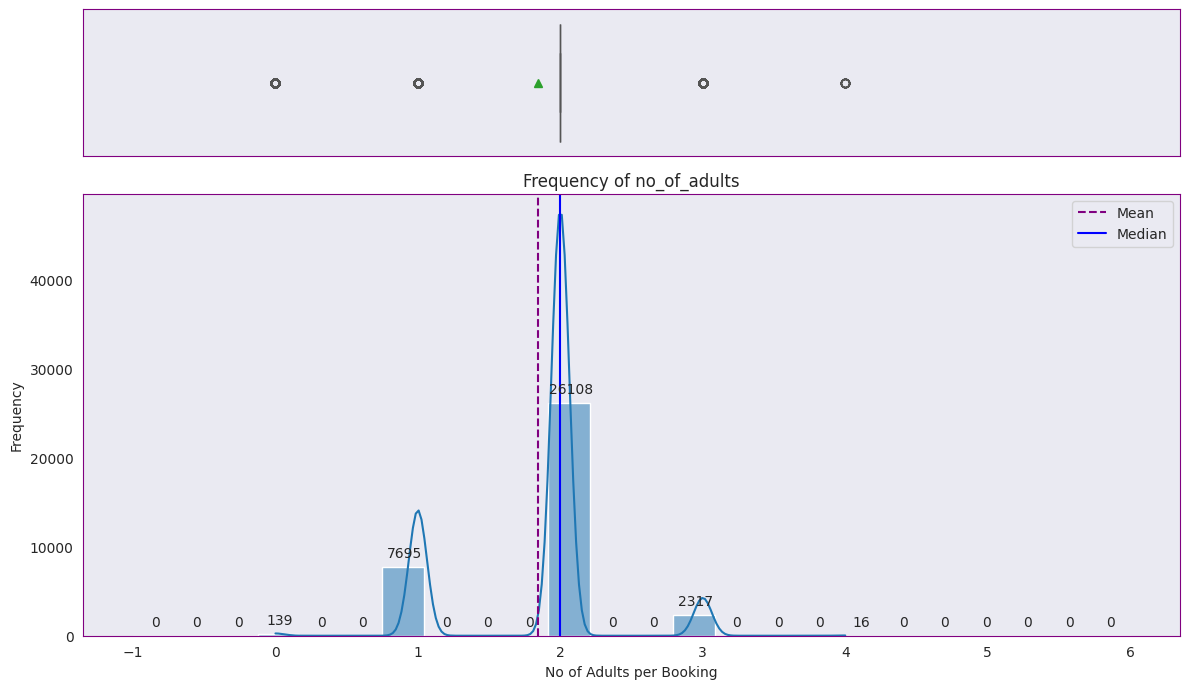

In [27]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "no_of_adults")

# Set the x-axis label
plt.xlabel("No of Adults per Booking")

df2["no_of_adults"].value_counts()
print()
df2["no_of_adults"].describe().T

Most of the bookings have 2 adults. <br>
139 are showing zero adults. These should be researched further.<br>
Most INN hotels do not allow kids under 16 to stay without an adult.<br>
If we were supplied the age we would be able to determine if the 0 were correct or needed to be replace by the mean. <br>
Without that additional information we will leave the 0s, they all are showing children staying. None are zero adults and zero children.

<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'No of Children per Booking')

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

count   36275.00
mean        0.11
std         0.40
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        10.00
Name: no_of_children, dtype: float64

<Figure size 2000x600 with 0 Axes>

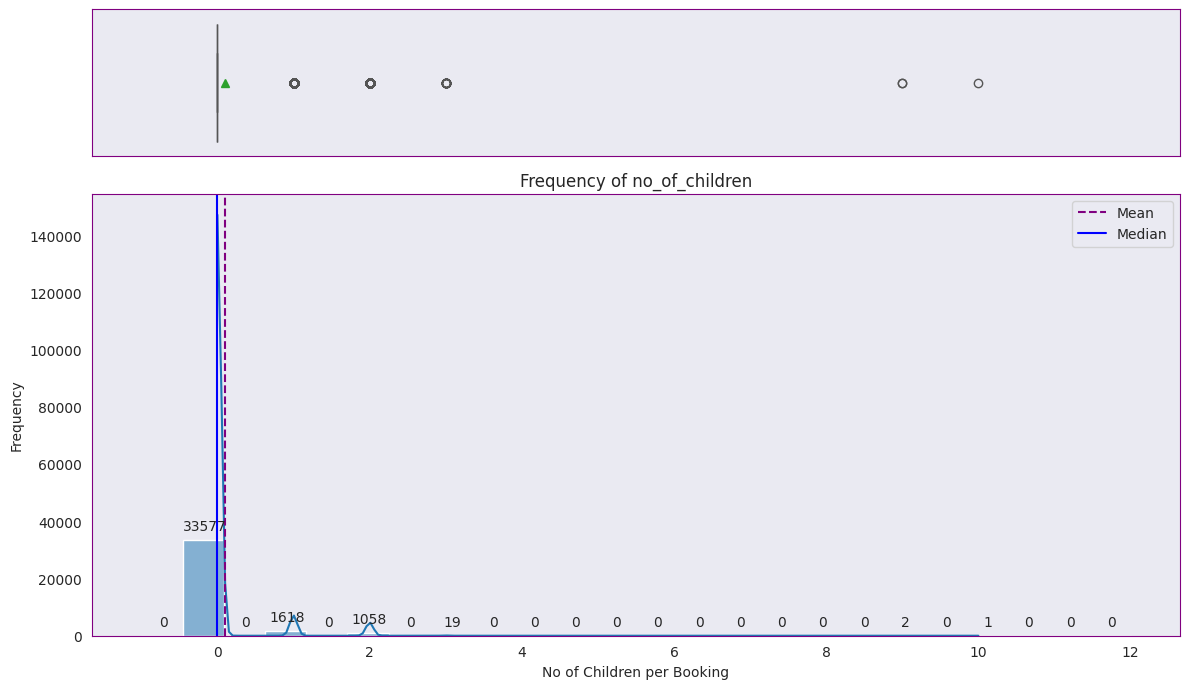

In [28]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "no_of_children")

# Set the x-axis label
plt.xlabel("No of Children per Booking")

df2["no_of_children"].value_counts()
print()
df2["no_of_children"].describe().T

25%, 50%, and 75% are zero.<br>
Most adults book without children. <br>
The max amount of students is 10. The count of 8 to 10 are outlier that should be removed. <br>
These outliers do not happen much so they could skew the results.

<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'No of Weekend Nights per Booking')

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

count   36275.00
mean        0.81
std         0.87
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         7.00
Name: no_of_weekend_nights, dtype: float64

<Figure size 2000x600 with 0 Axes>

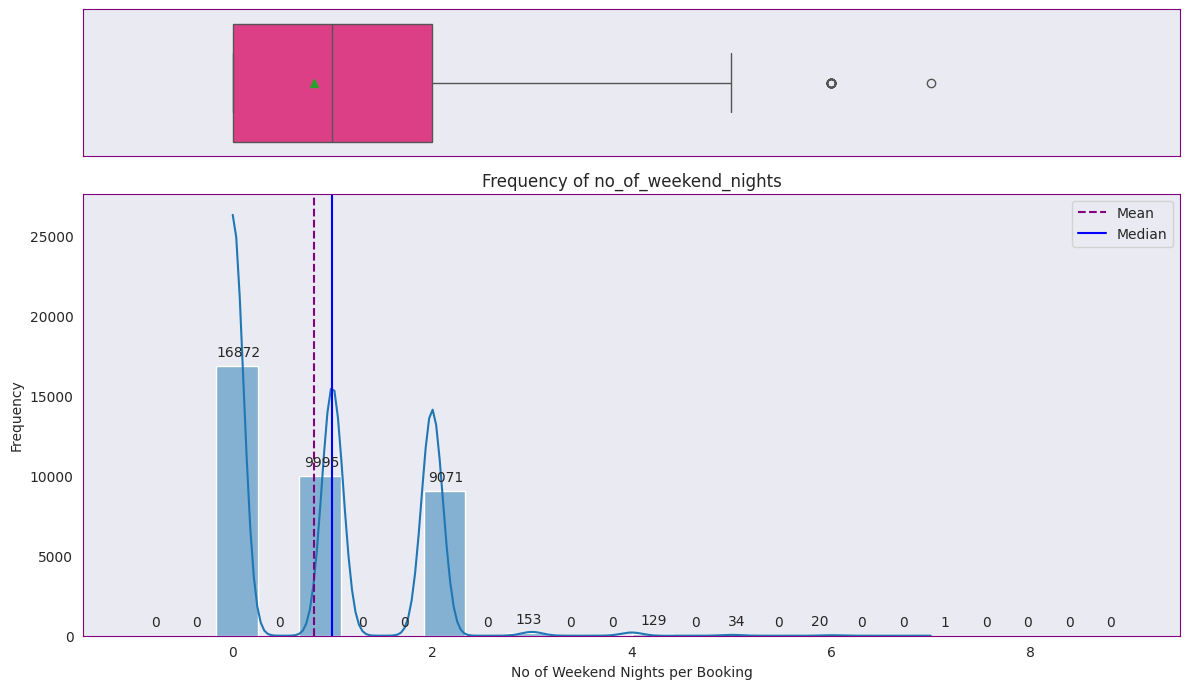

In [29]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "no_of_weekend_nights")

# Set the x-axis label
plt.xlabel("No of Weekend Nights per Booking")

df2["no_of_weekend_nights"].value_counts()
print()
df2["no_of_weekend_nights"].describe().T

Most of the bookings are between 0 and 2. With the majority being zero <br>
Average bookings include 0 to 1 weekend night.

<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'No of Week Nights per Booking')

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

count   36275.00
mean        2.20
std         1.41
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        17.00
Name: no_of_week_nights, dtype: float64

<Figure size 2000x600 with 0 Axes>

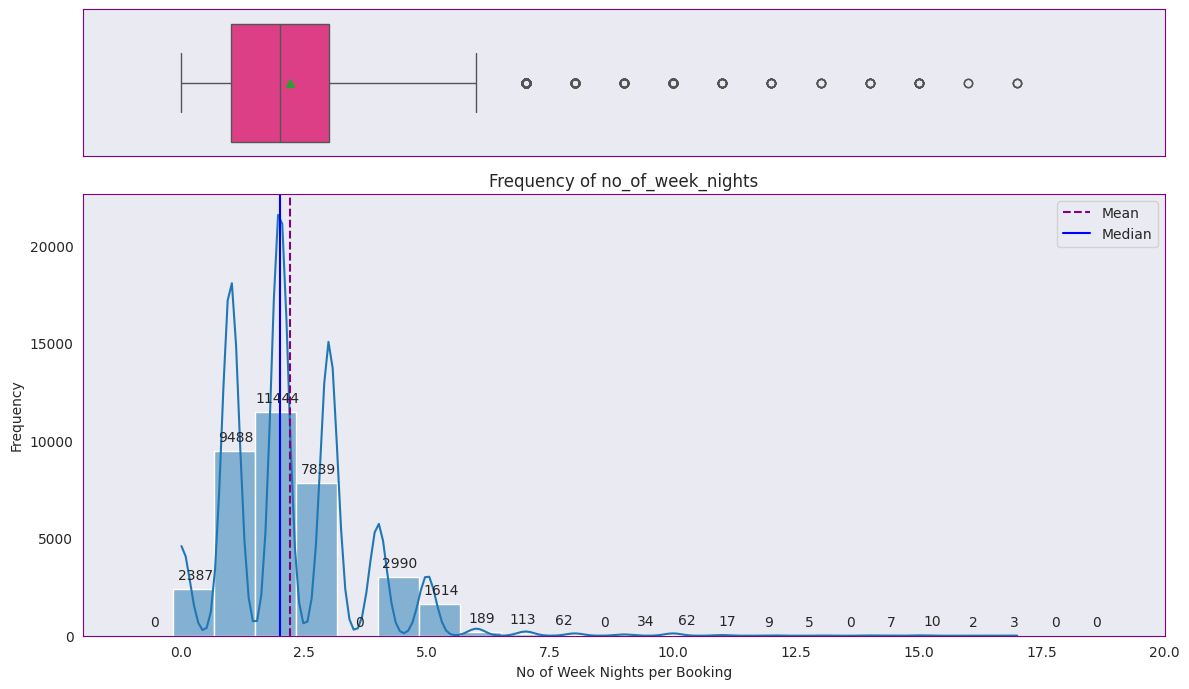

In [30]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "no_of_week_nights")

# Set the x-axis label
plt.xlabel("No of Week Nights per Booking")

df2["no_of_week_nights"].value_counts()
print()
df2["no_of_week_nights"].describe().T

Max number of week nights is 17. <br>
Average number of week nights is 2. <br>
Most of the count of week nights is between O and 3.


<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'Required Car Parking Space per Booking')

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64

count   36275.00
mean        0.03
std         0.17
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: required_car_parking_space, dtype: float64

<Figure size 2000x600 with 0 Axes>

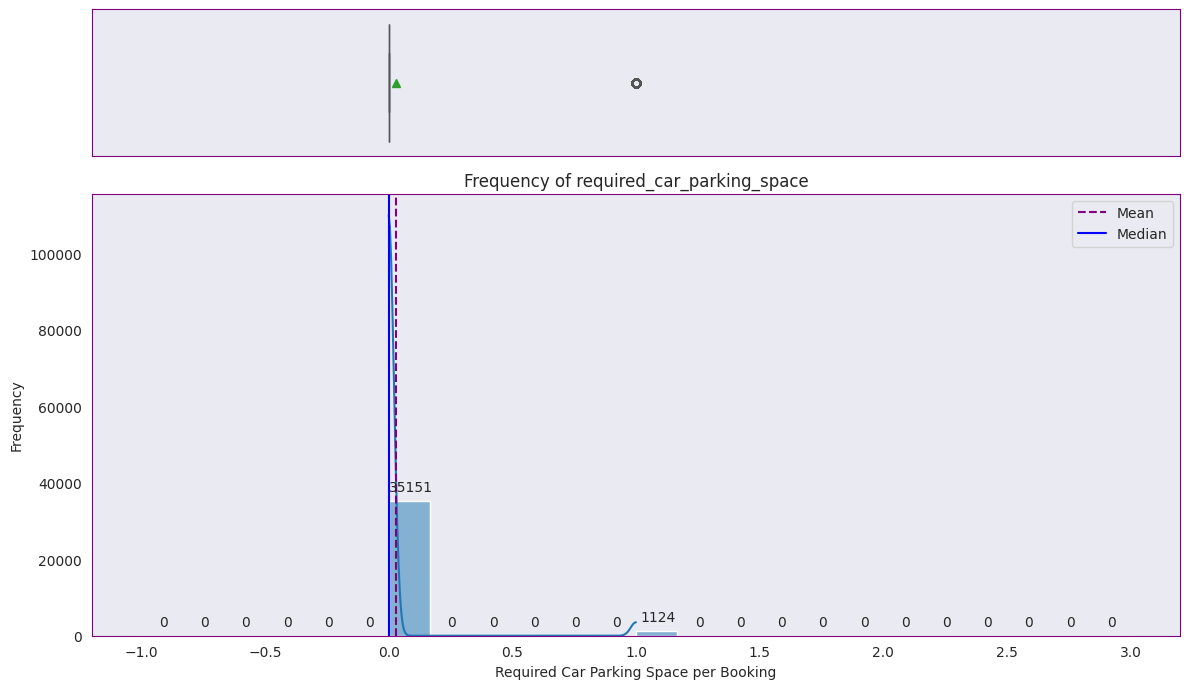

In [31]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "required_car_parking_space")

# Set the x-axis label
plt.xlabel("Required Car Parking Space per Booking")

df2["required_car_parking_space"].value_counts()
print()
df2["required_car_parking_space"].describe().T

Most people do not required a car parking space. <br>
Out of all the bookings on 1124 asked for a parking space.


<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'Lead Time per Booking')

lead_time
0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: count, Length: 352, dtype: int64

count   36275.00
mean       85.23
std        85.93
min         0.00
25%        17.00
50%        57.00
75%       126.00
max       443.00
Name: lead_time, dtype: float64

<Figure size 2000x600 with 0 Axes>

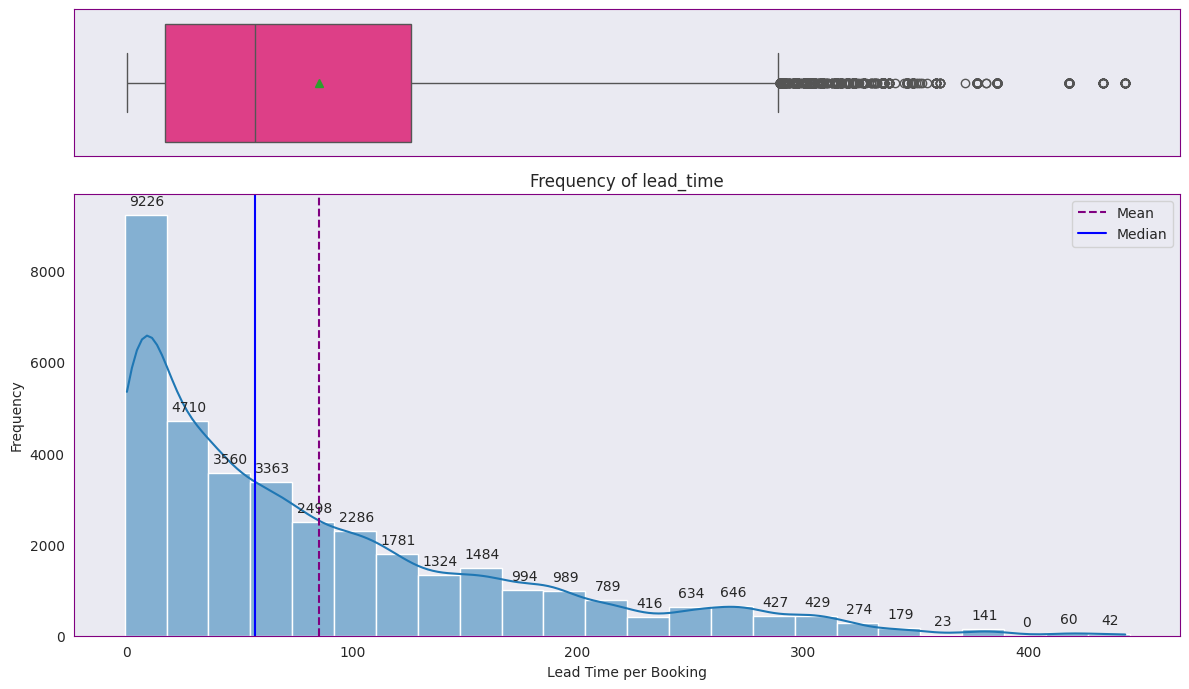

In [32]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "lead_time")

# Set the x-axis label
plt.xlabel("Lead Time per Booking")

df2["lead_time"].value_counts()
print()
df2["lead_time"].describe().T

Average lead time is 85 days. <br>
Most people book their rooms less than 400 days before their stay. <br>
Over 25% of people book their stay 20 days or less before their stay.
Over 75% of people book their stay less than 1/2 year before their stay.


<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'Arrival Year per Booking')

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

count   36275.00
mean     2017.82
std         0.38
min      2017.00
25%      2018.00
50%      2018.00
75%      2018.00
max      2018.00
Name: arrival_year, dtype: float64

<Figure size 2000x600 with 0 Axes>

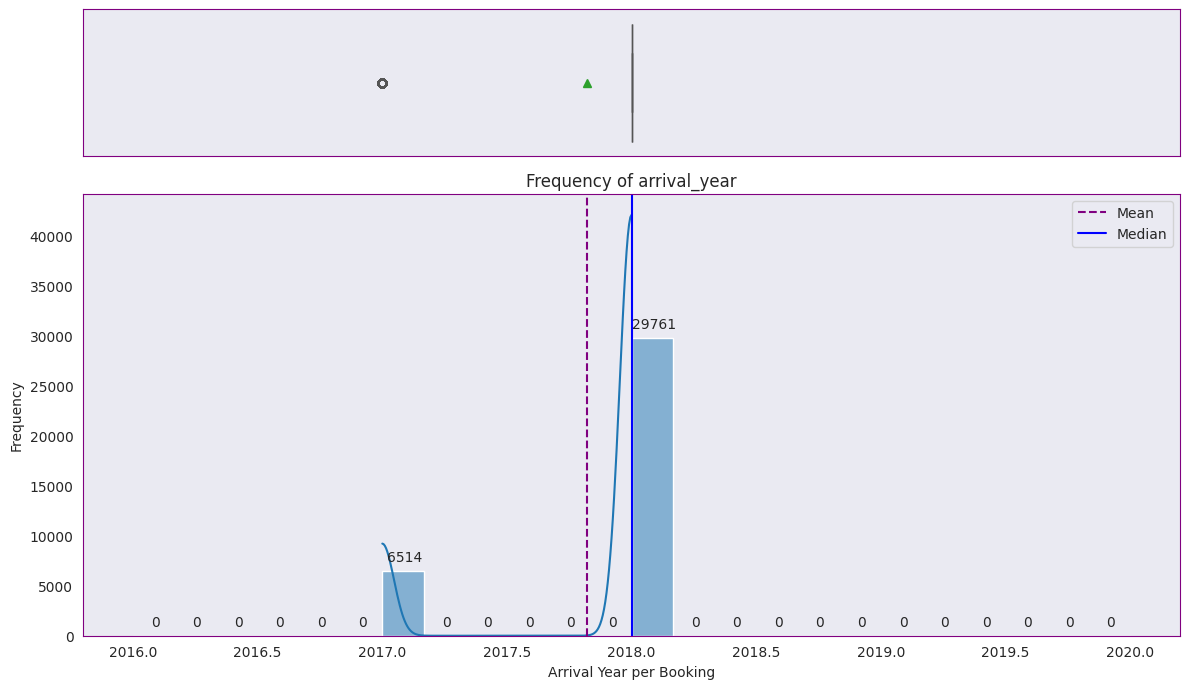

In [33]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "arrival_year")

# Set the x-axis label
plt.xlabel("Arrival Year per Booking")

df2["arrival_year"].value_counts()
print()
df2["arrival_year"].describe().T

Most booking took place in 2018. <br>
18% of all booking were in 2017. <br>
82% of all bookings were in 2018.


<Figure size 2000x600 with 0 Axes>

Text(0.5, 47.722222222222285, 'Arrival Month per Booking')

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

count   36275.00
mean        7.42
std         3.07
min         1.00
25%         5.00
50%         8.00
75%        10.00
max        12.00
Name: arrival_month, dtype: float64

<Figure size 2000x600 with 0 Axes>

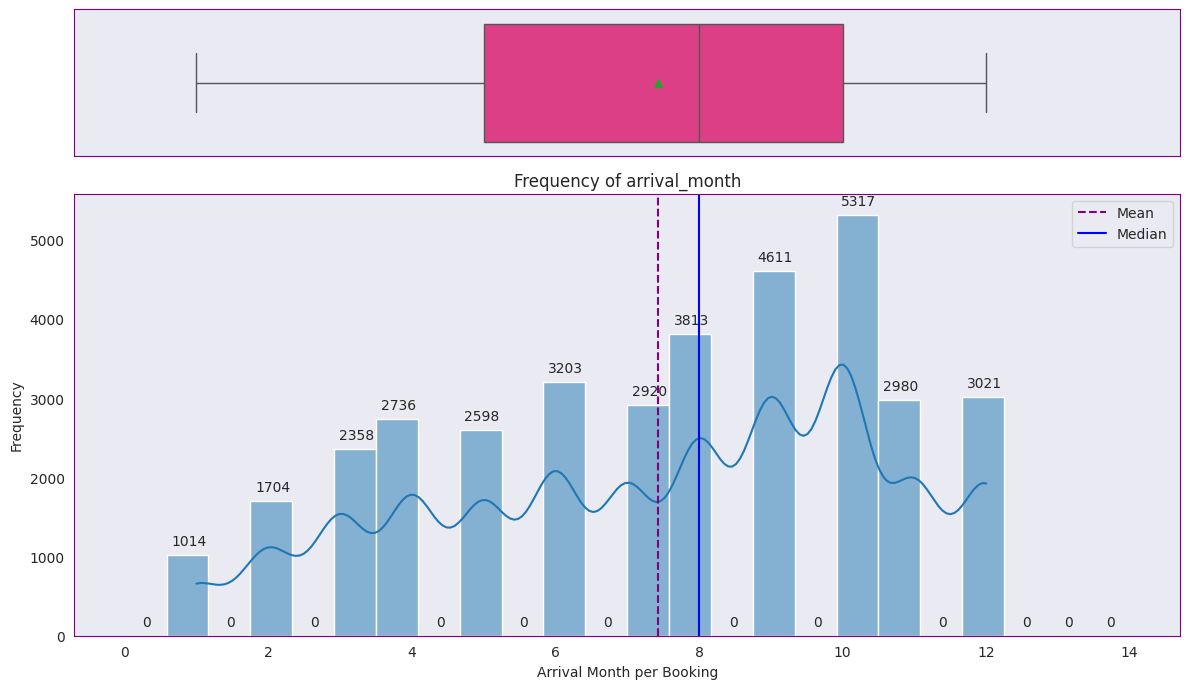

In [34]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "arrival_month")

# Set the x-axis label
plt.xlabel("Arrival Month per Booking")

df2["arrival_month"].value_counts()
print()
df2["arrival_month"].describe().T

The most bookings took place in month 10 (October). <br>
The fewest bookings took place in January.
Winter had 5,739 bookings. That accounts for 16% of the bookings. <br>
Spring had 7,692 bookings. That accounts for 21% of the bookings. <br>
Summer had 9,936 bookings. That accounts for 27% of the bookings. <br>
Fall had 12,908 bookings. That accounts for 36% of the bookings. <br>


In [35]:
#group by *arrival month*, count number of records per month, sort from most to fewest bookings, and show top 3 months
df2.groupby('arrival_month').count().sort_values(by='booking_status', ascending=False)['booking_status'].head(3)

arrival_month
10    5317
9     4611
8     3813
Name: booking_status, dtype: int64

**1. What are the busiest months in the hotel.**

The top 3 months for bookings are:
1. October
2. September
3. August

Fall (September - November) is the most popular season to book a hotel room.

<Figure size 2500x1000 with 0 Axes>

Text(0.5, 47.722222222222285, 'Arrival Date per Booking')

arrival_date
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: count, dtype: int64

count   36275.00
mean       15.60
std         8.74
min         1.00
25%         8.00
50%        16.00
75%        23.00
max        31.00
Name: arrival_date, dtype: float64

<Figure size 2500x1000 with 0 Axes>

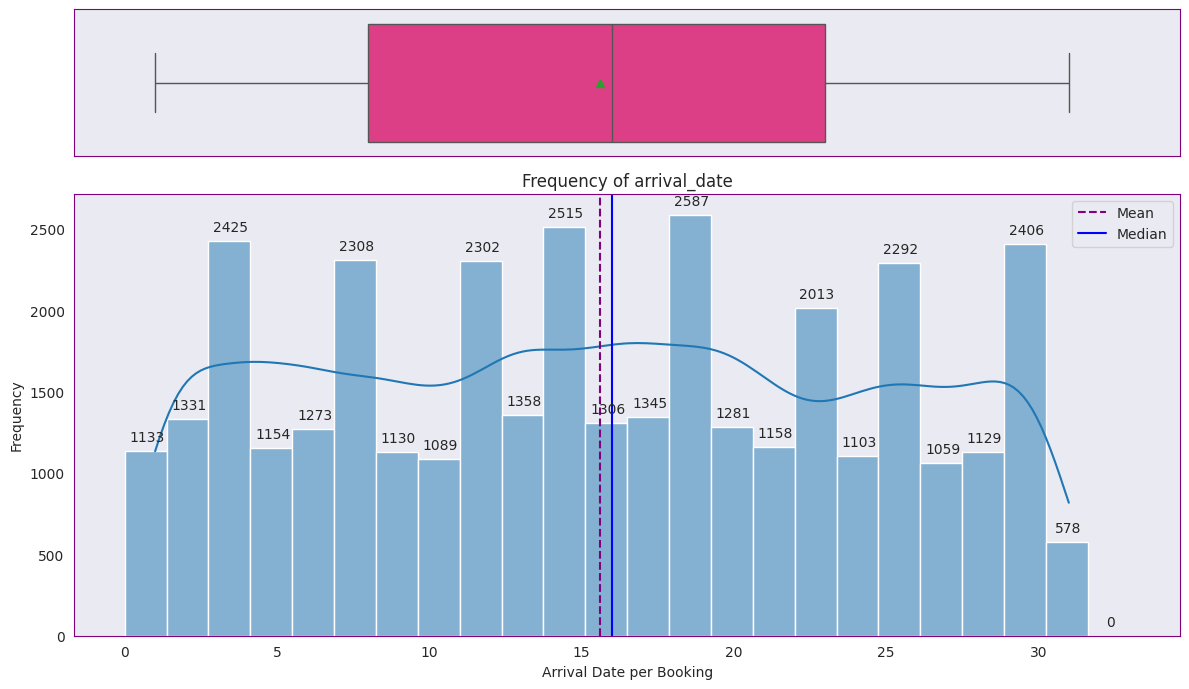

In [36]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Plot the histogram and boxplot
histogram_boxplot(df2, "arrival_date")

# Set the x-axis label
plt.xlabel("Arrival Date per Booking")

df2["arrival_date"].value_counts()
print()
df2["arrival_date"].describe().T

11843 books have an arrival date of 1st - 10th of the month. ~33% of all bookings. <br>
12694 books have an arrival date of 11th - 20th of the month. ~35% of all bookings. <br>
11738 books have an arrival date of 21st - 31st of the month. ~32% of all bookings. <br>

<Figure size 2500x1000 with 0 Axes>

Text(0.5, 47.722222222222285, 'Repeated Guest per Booking')

repeated_guest
0    35345
1      930
Name: count, dtype: int64

count   36275.00
mean        0.03
std         0.16
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: repeated_guest, dtype: float64

<Figure size 2500x1000 with 0 Axes>

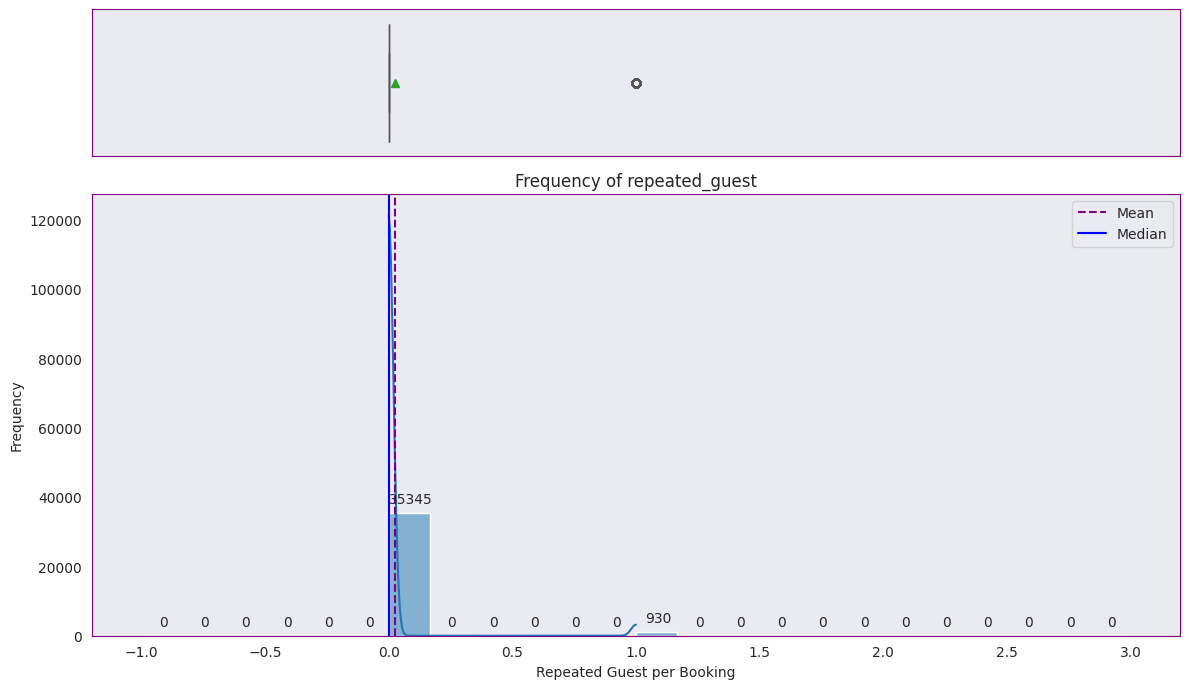

In [37]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Plot the histogram and boxplot
histogram_boxplot(df2, "repeated_guest")

# Set the x-axis label
plt.xlabel("Repeated Guest per Booking")

df2["repeated_guest"].value_counts()
print()
df2["repeated_guest"].describe().T

Most bookings are not repeated guests. <br>
Only 930 bookings are from repeated guests. <br>
More ressearch should be done to determine why more guests are not booking additional stays with the hotels.

<Figure size 2500x1000 with 0 Axes>

Text(0.5, 47.722222222222285, 'Number of Previous Cancellations per Booking')

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

count   36275.00
mean        0.02
std         0.37
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        13.00
Name: no_of_previous_cancellations, dtype: float64

<Figure size 2500x1000 with 0 Axes>

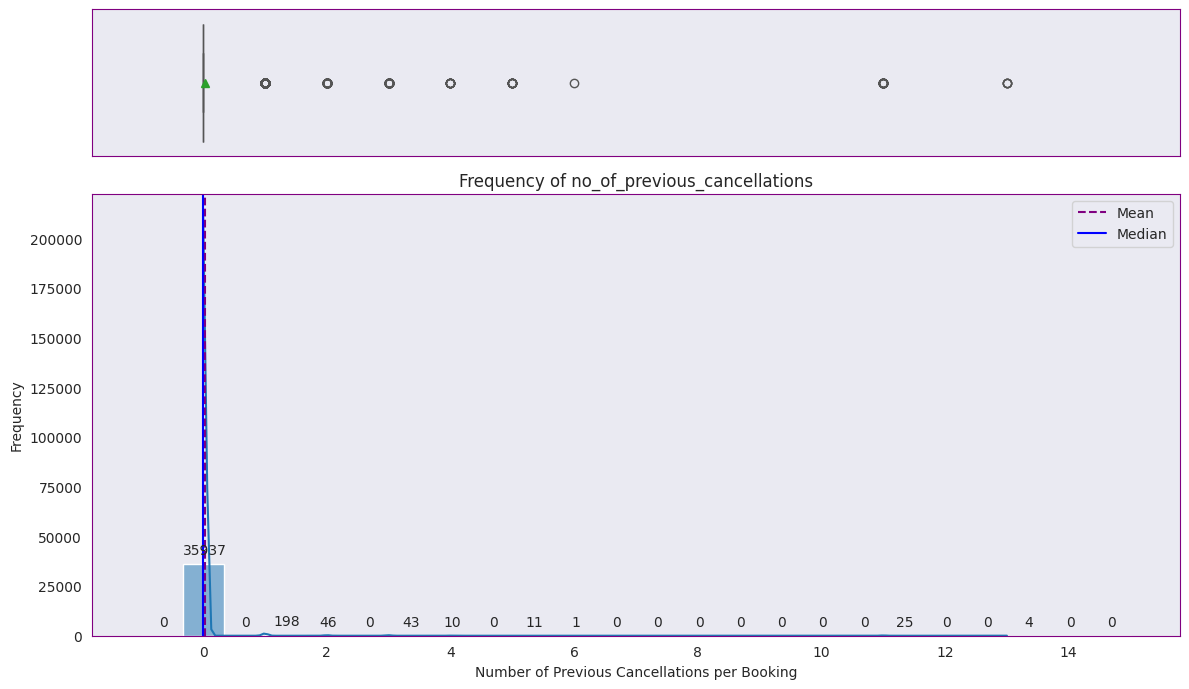

In [38]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Plot the histogram and boxplot
histogram_boxplot(df2, "no_of_previous_cancellations")

# Set the x-axis label
plt.xlabel("Number of Previous Cancellations per Booking")

df2["no_of_previous_cancellations"].value_counts()
print()
df2["no_of_previous_cancellations"].describe().T

Most bookings are not cancelled.

<Figure size 2500x1000 with 0 Axes>

Text(0.5, 47.722222222222285, 'Number of Previous Bookings Not Canceled per Booking')

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

count   36275.00
mean        0.15
std         1.75
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        58.00
Name: no_of_previous_bookings_not_canceled, dtype: float64

<Figure size 2500x1000 with 0 Axes>

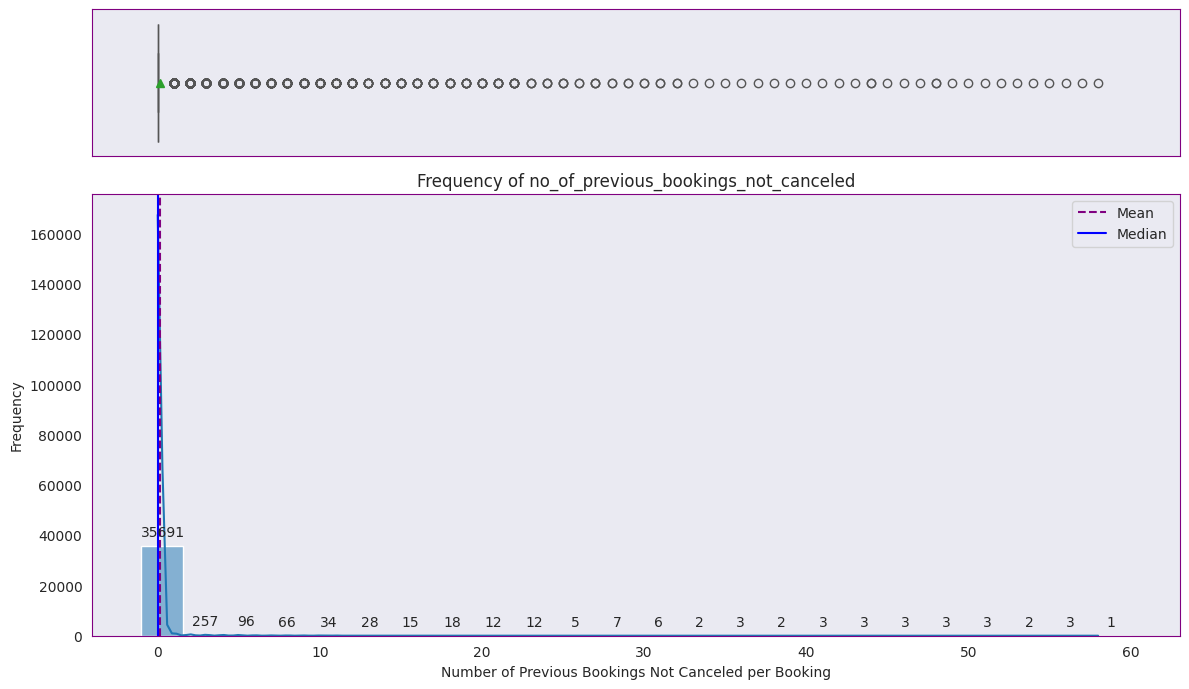

In [39]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Plot the histogram and boxplot
histogram_boxplot(df2, "no_of_previous_bookings_not_canceled")

# Set the x-axis label
plt.xlabel("Number of Previous Bookings Not Canceled per Booking")

df2["no_of_previous_bookings_not_canceled"].value_counts()
print()
df2["no_of_previous_bookings_not_canceled"].describe().T

Per the graph most previous booking have not been cancelled.

<Figure size 2500x1000 with 0 Axes>

Text(0.5, 47.722222222222285, 'Average Price Per Room per Booking')

avg_price_per_room
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: count, Length: 3930, dtype: int64

count   36275.00
mean      103.42
std        35.09
min         0.00
25%        80.30
50%        99.45
75%       120.00
max       540.00
Name: avg_price_per_room, dtype: float64

<Figure size 2500x1000 with 0 Axes>

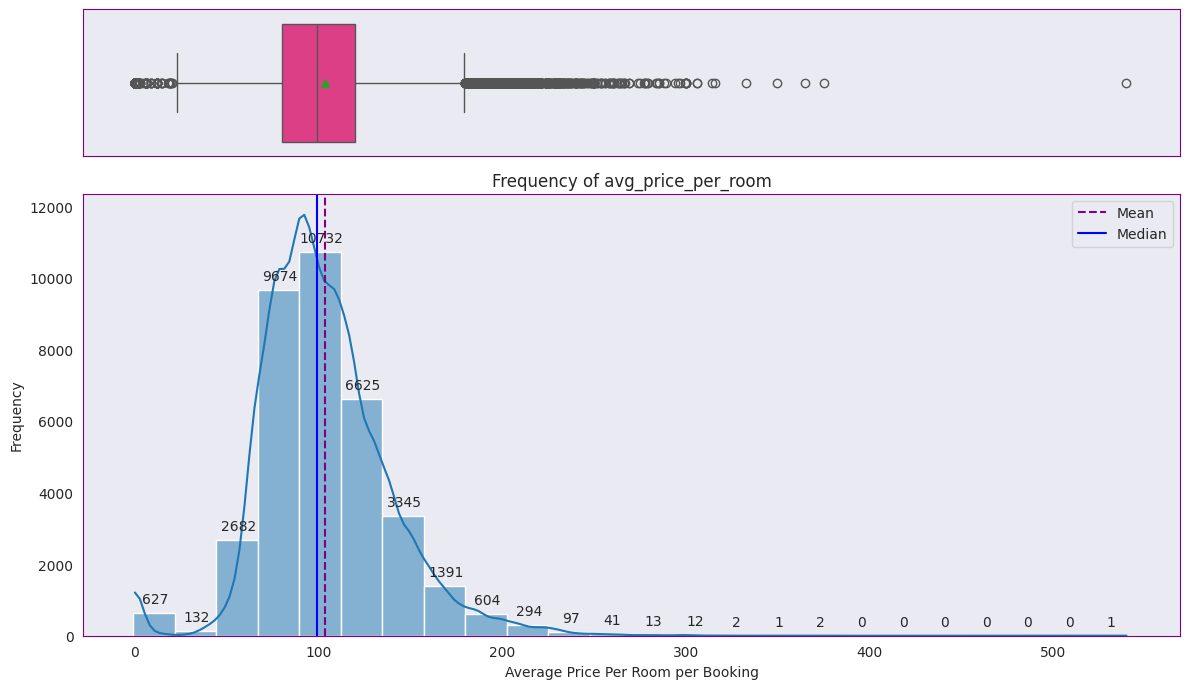

In [40]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Plot the histogram and boxplot
histogram_boxplot(df2, "avg_price_per_room")

# Set the x-axis label
plt.xlabel("Average Price Per Room per Booking")

df2["avg_price_per_room"].value_counts()
print()
df2["avg_price_per_room"].describe().T

The room rate averages around 100. <br>
The 627 that are showing a rate of 20 or less are free or discounted rooms. <br>
Most rooms are less than 250. <br>
75% of all rooms cost 120 or less.

<Figure size 2500x1000 with 0 Axes>

Text(0.5, 47.722222222222285, 'Number of Special Requests per Booking')

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

count   36275.00
mean        0.62
std         0.79
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: no_of_special_requests, dtype: float64

<Figure size 2500x1000 with 0 Axes>

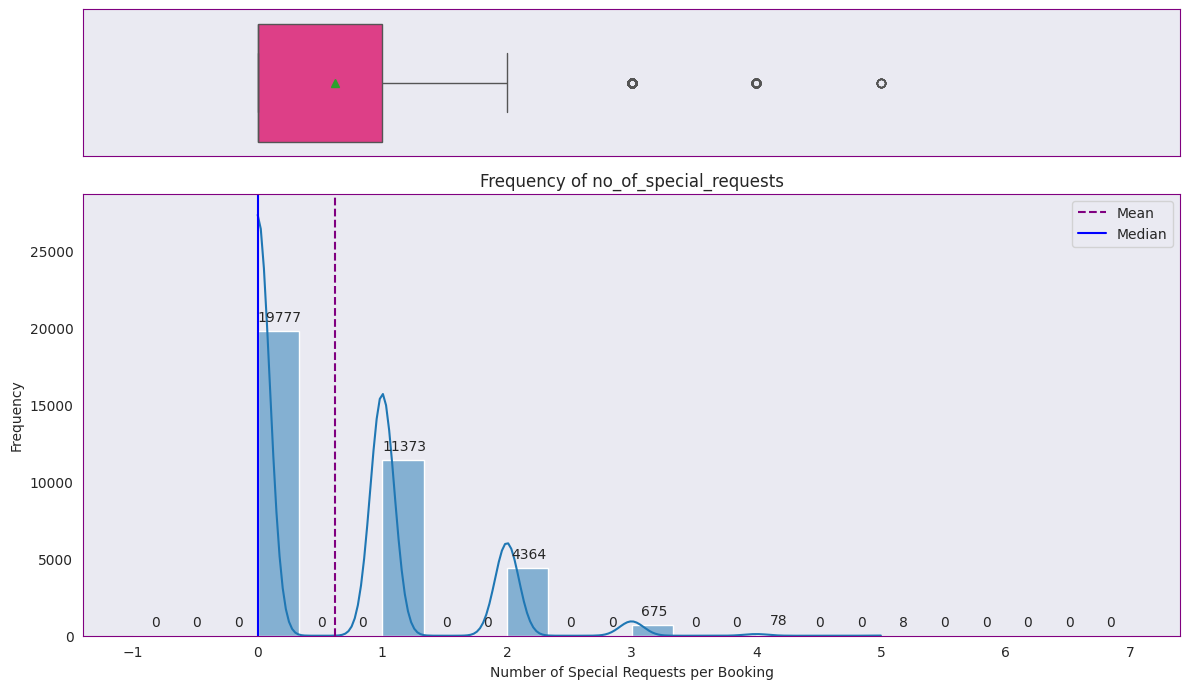

In [41]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Plot the histogram and boxplot
histogram_boxplot(df2, "no_of_special_requests")

# Set the x-axis label
plt.xlabel("Number of Special Requests per Booking")

df2["no_of_special_requests"].value_counts()
print()
df2["no_of_special_requests"].describe().T

Most bookings have 1 or less special requests. <br>
The most special requests is 5.

## Categorical Variables

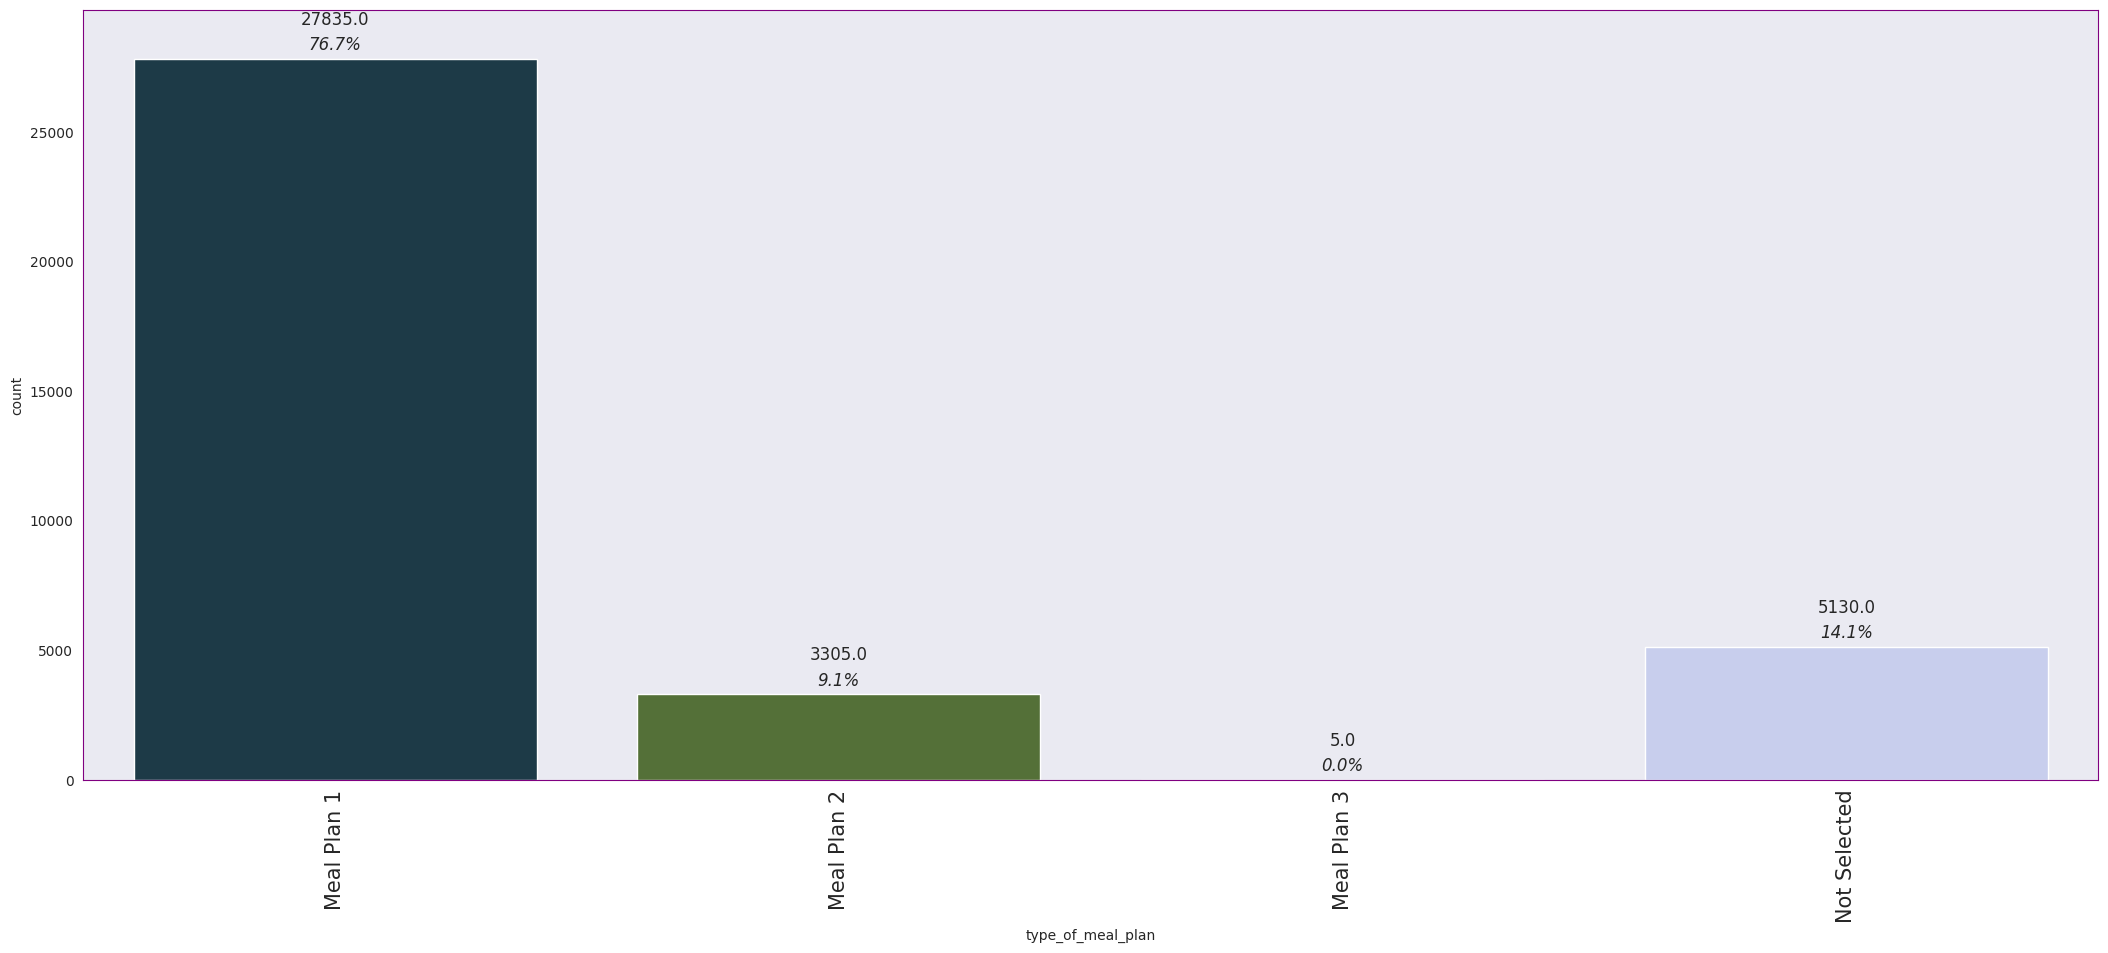

In [42]:
# Labeled barplot for type of meal plan
labeled_barplot(df, "type_of_meal_plan", perc=True, n=25)

Most guests are picking meal plan 1. 76.7% of all guest chose this plan. <br>
The next biggest group is the guests that chose not to have a meal plan. They make up 14.1% of all bookings.

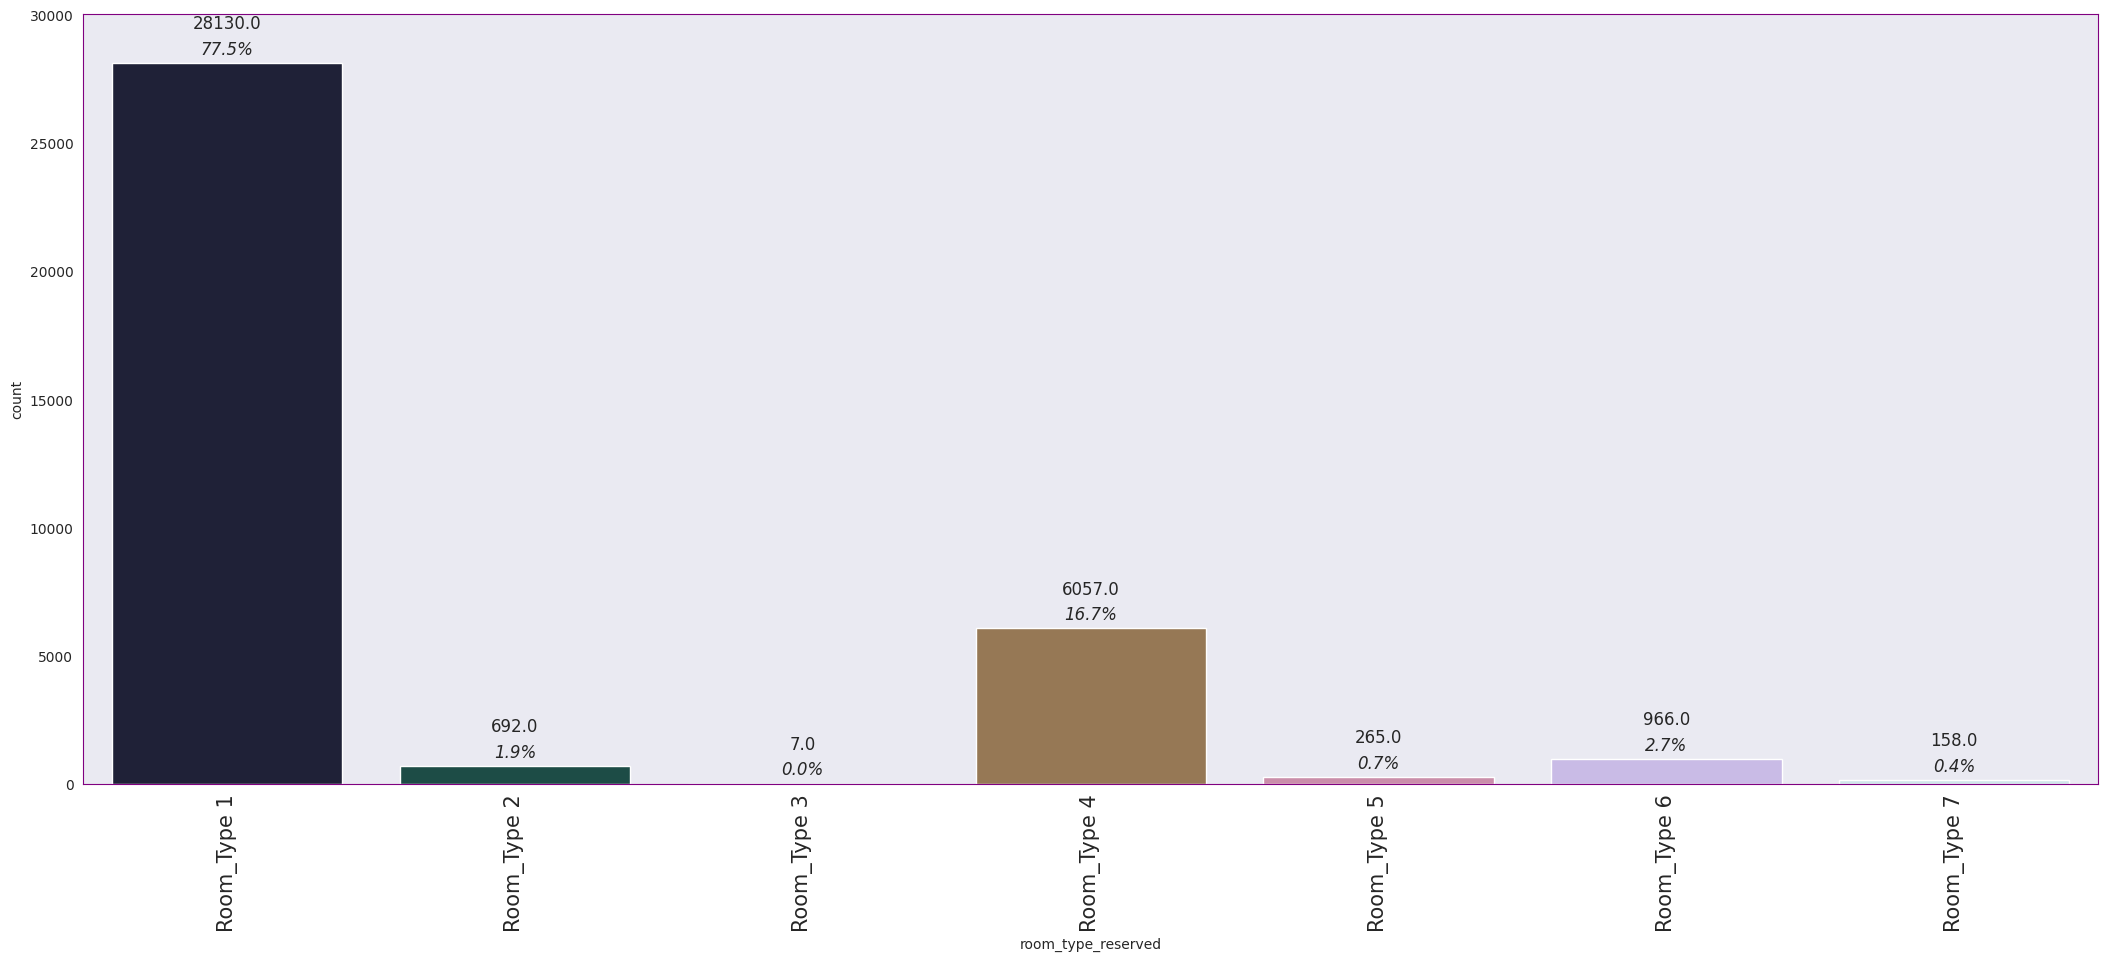

In [43]:
# Labeled barplot for room type reserved
labeled_barplot(df, "room_type_reserved", perc=True, n=25)

Most guests are reserving Room Type 1. 77.5% of all guests reserved this type of room. <br>
Next popular room type is Room Type 4. 16.7% of all guests reserved this type of room. <br>
Room Type 3 is the least popular room. Only 7 guests booked this type of room.

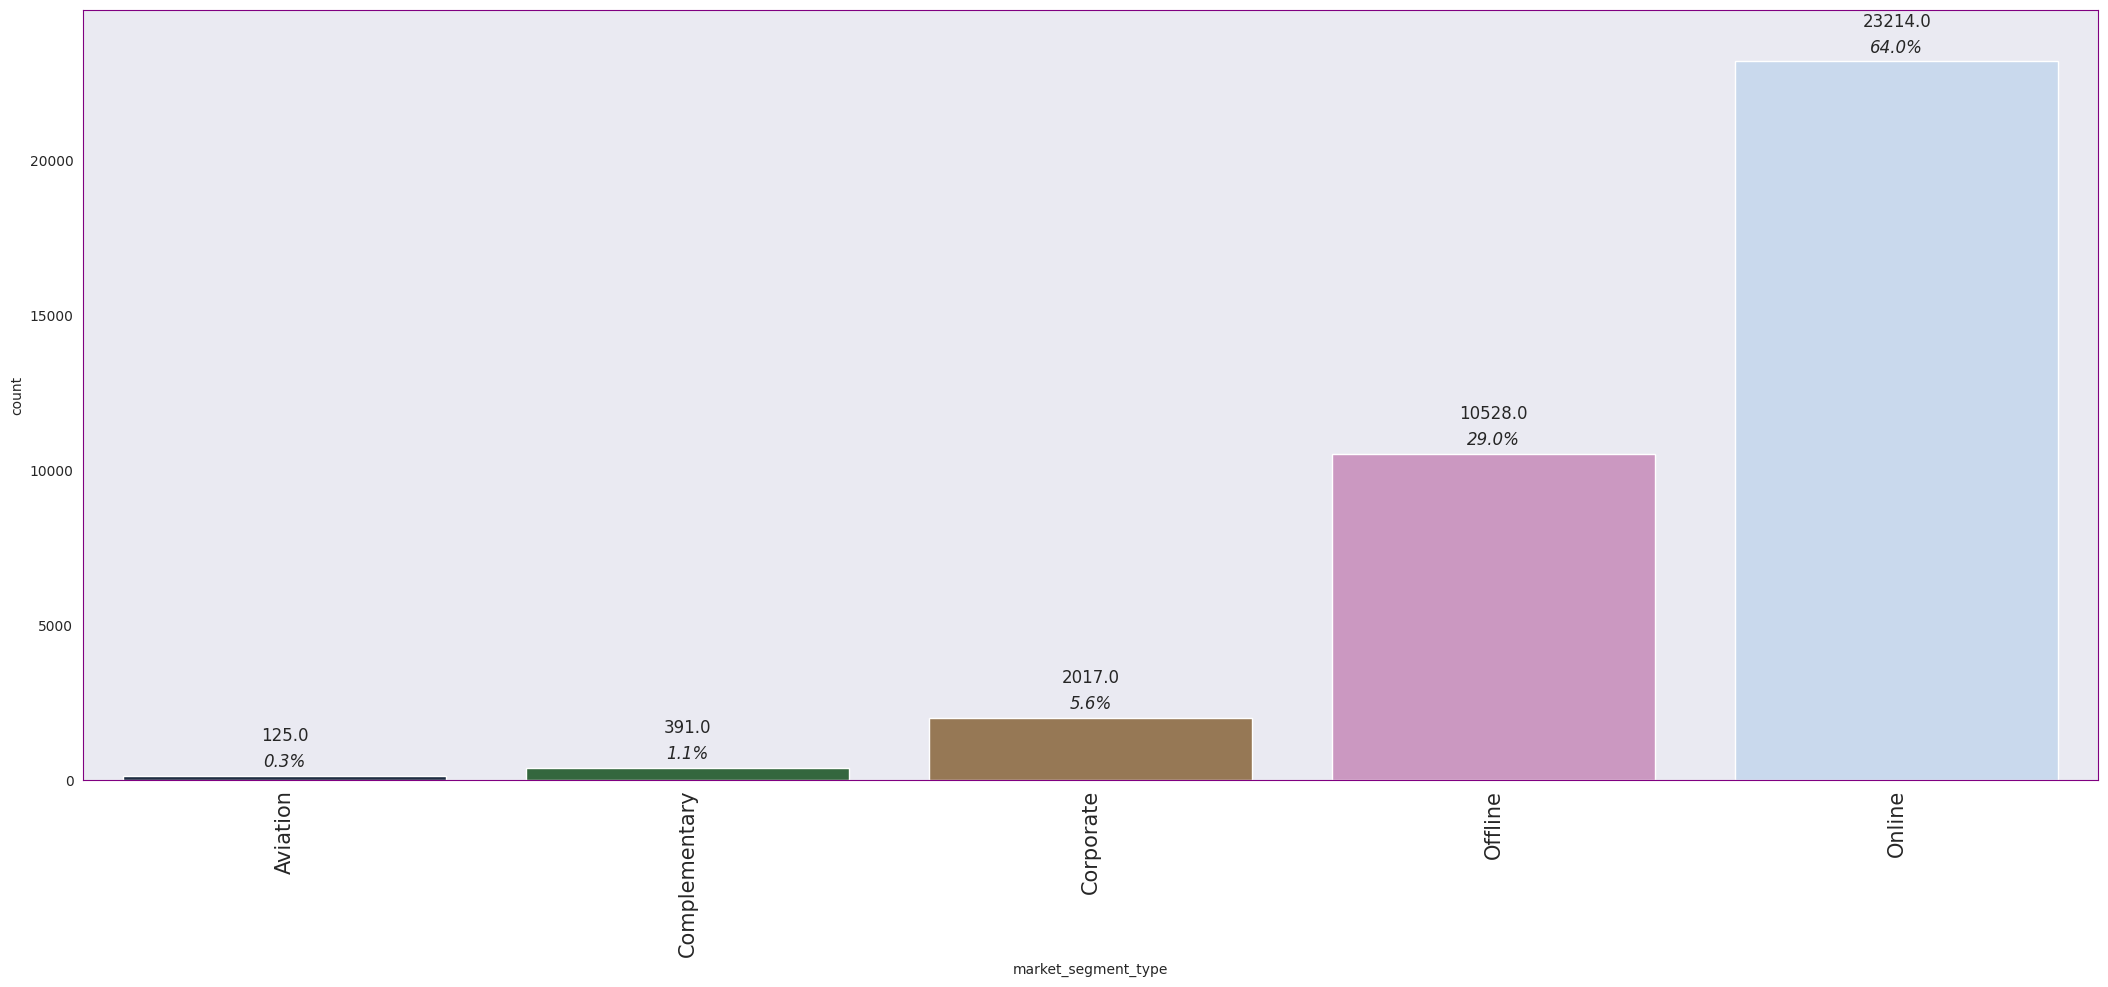

In [44]:
# Labeled barplot for market segment
labeled_barplot(df, "market_segment_type", perc=True, n=25)

The most popular segment of our guests is online which accounts for 64% of all bookings. <br>
Next popular segment is offline which accounts for 29% of all bookings. <br>
Corporate guests only account for 5.6% of all bookings. <br>
Complimentary or avaiation guests only account for 1.4% of all bookings.

In [45]:
df2.groupby('market_segment_type').count().sort_values(by='booking_status', ascending=False)['booking_status']

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: booking_status, dtype: int64

**2. Which market segment do most of the guest come from?**

1. Online               23,214 64% <br>
2. Offline              10,528 29% <br>
3. Corporate             2,017 5.6% <br>
4. Complementary           391 1.1% <br>
5. Aviation                125 0.3%

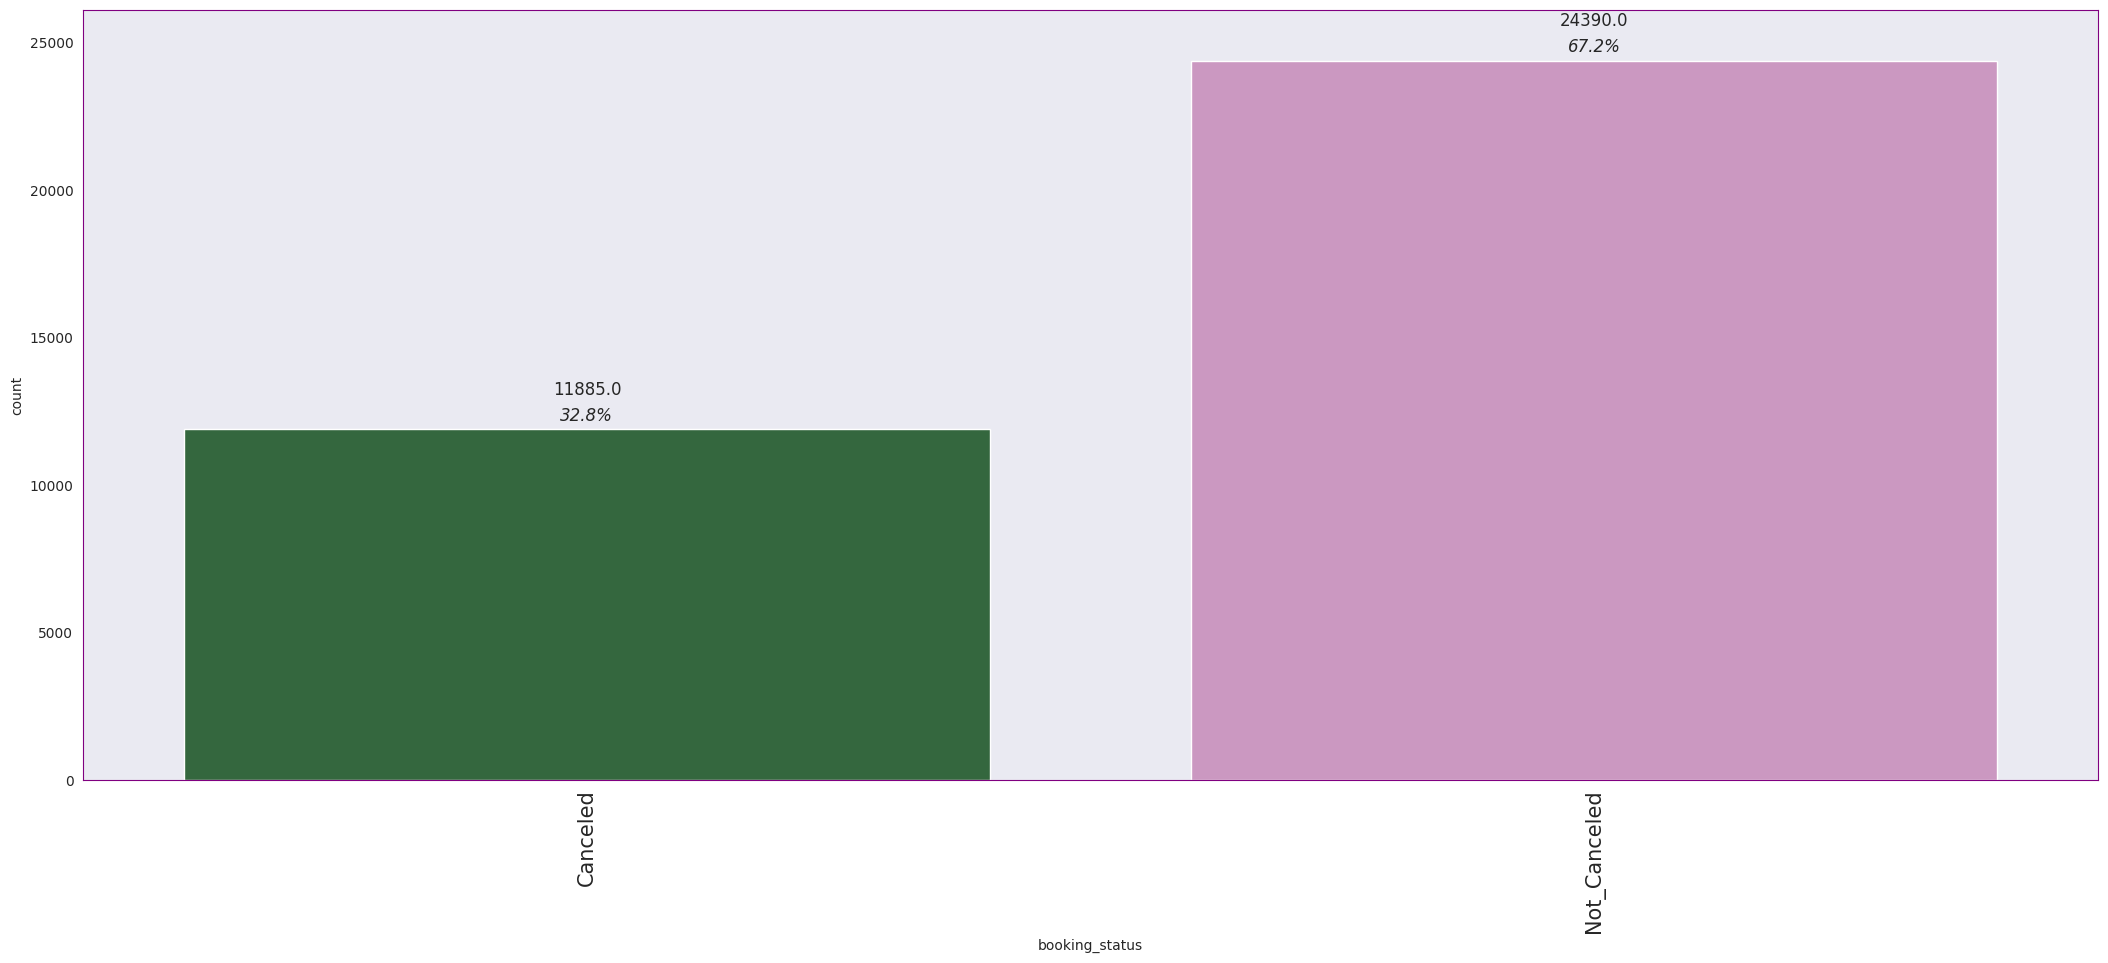

In [46]:
# Labeled barplot for booking_status
labeled_barplot(df, "booking_status", perc=True, n=25)

11,885 bookings 32.8% are canceled. <br>
24,390 bookings 67.2% are not canceled.

##Bivariate Analysis:

##Correlation Check

<Figure size 1500x700 with 0 Axes>

<Axes: >

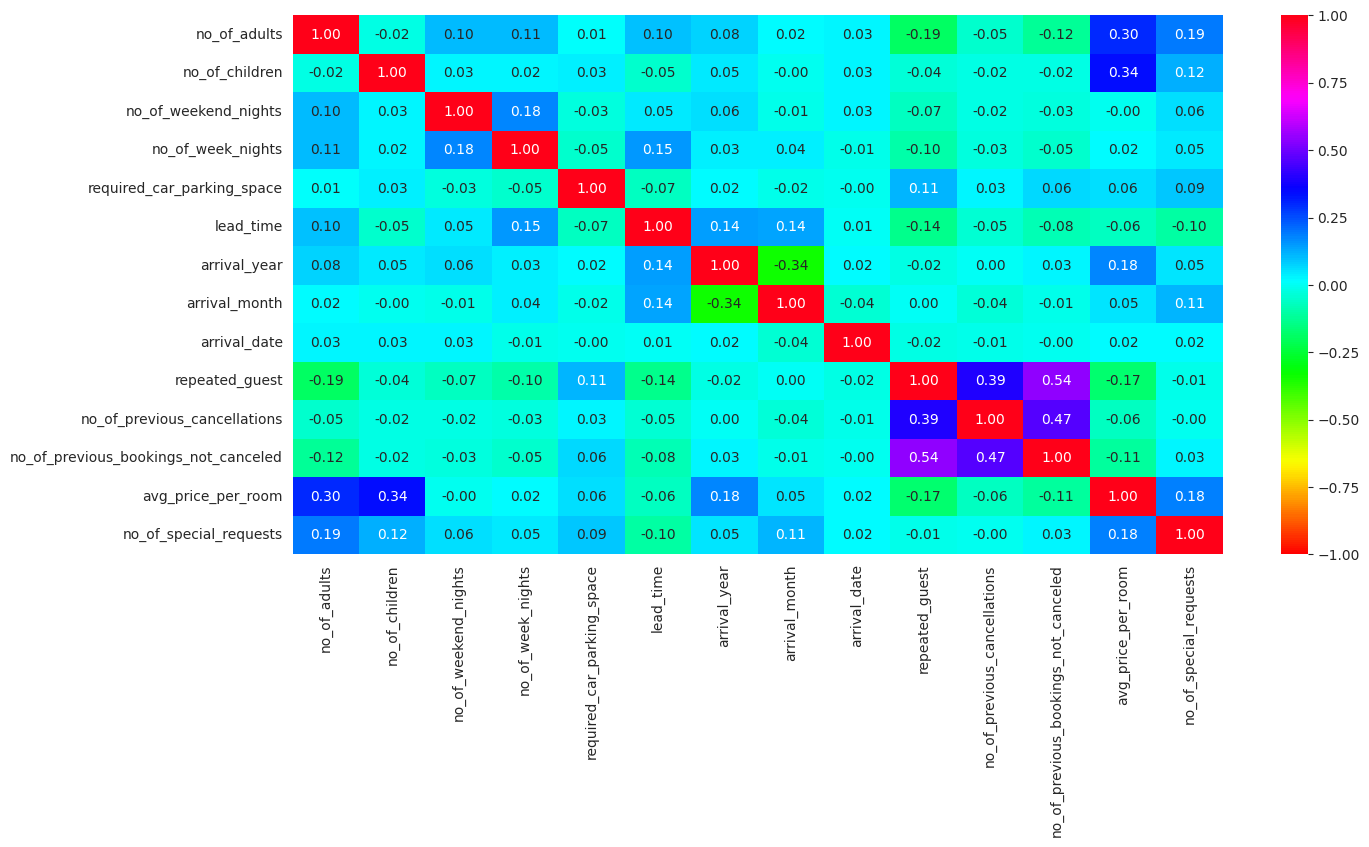

In [47]:
heatmap_list = df2.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable.

plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[heatmap_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="hsv"
)
plt.show()

no_of_previous_bookings_not_canceled and repeated_guest have a 0.54 correlation. <br>
Obviously no_of_previous_bookings_not_cancelled is related to no_of_previous_cancellations. They have a 47% rate

**Market Segment compared to Avg Price Per Room**

**3. Hotel rooms are dynamic and change according to demand & customer demographics.** <br>
**What is difference in room prices in different market segments**.

In [48]:
df2.groupby('market_segment_type').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False).reset_index()

market_segment_type  avg_price_per_room
0              Online              112.26
1            Aviation              100.70
2             Offline               91.63
3           Corporate               82.91
4       Complementary                3.14

Online has the highest average price at 112.26. <br>
As expected Complimentarty is the lowest average price of 3.14. They average between 0 and 20 usually per booking. <br>
Corporate rates are the next lowest at a average of 82.91.

In [49]:
df2['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

**4. What percent of bookings are canceled?**

Out of all bookings, 11,885 bookings 32.8% are canceled. <br>
24,390 bookings 67.2% are not canceled.

**Repeated Guests compared to Booking Status**

**5. Repeating guest are the guest who stay in the hotel often and are important to brand equity.** <br>
**What percent of repeating guests cancel?**

In [50]:
df2.groupby('repeated_guest')['booking_status'].value_counts()

repeated_guest  booking_status
0               Not_Canceled      23476
                Canceled          11869
1               Not_Canceled        914
                Canceled             16
Name: count, dtype: int64

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


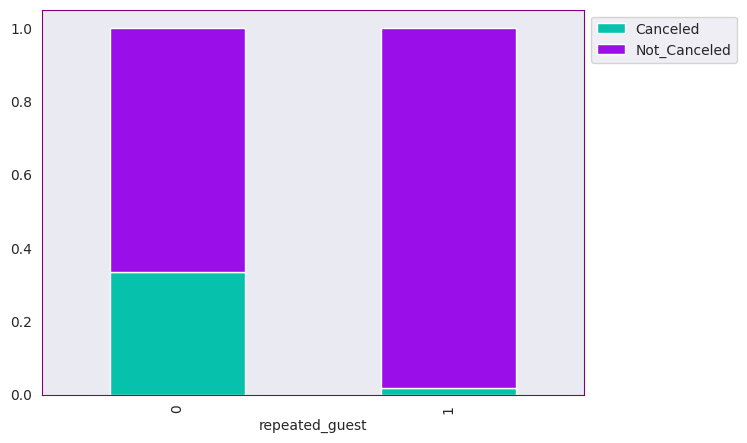

In [51]:
stacked_barplot(df, "repeated_guest", "booking_status")

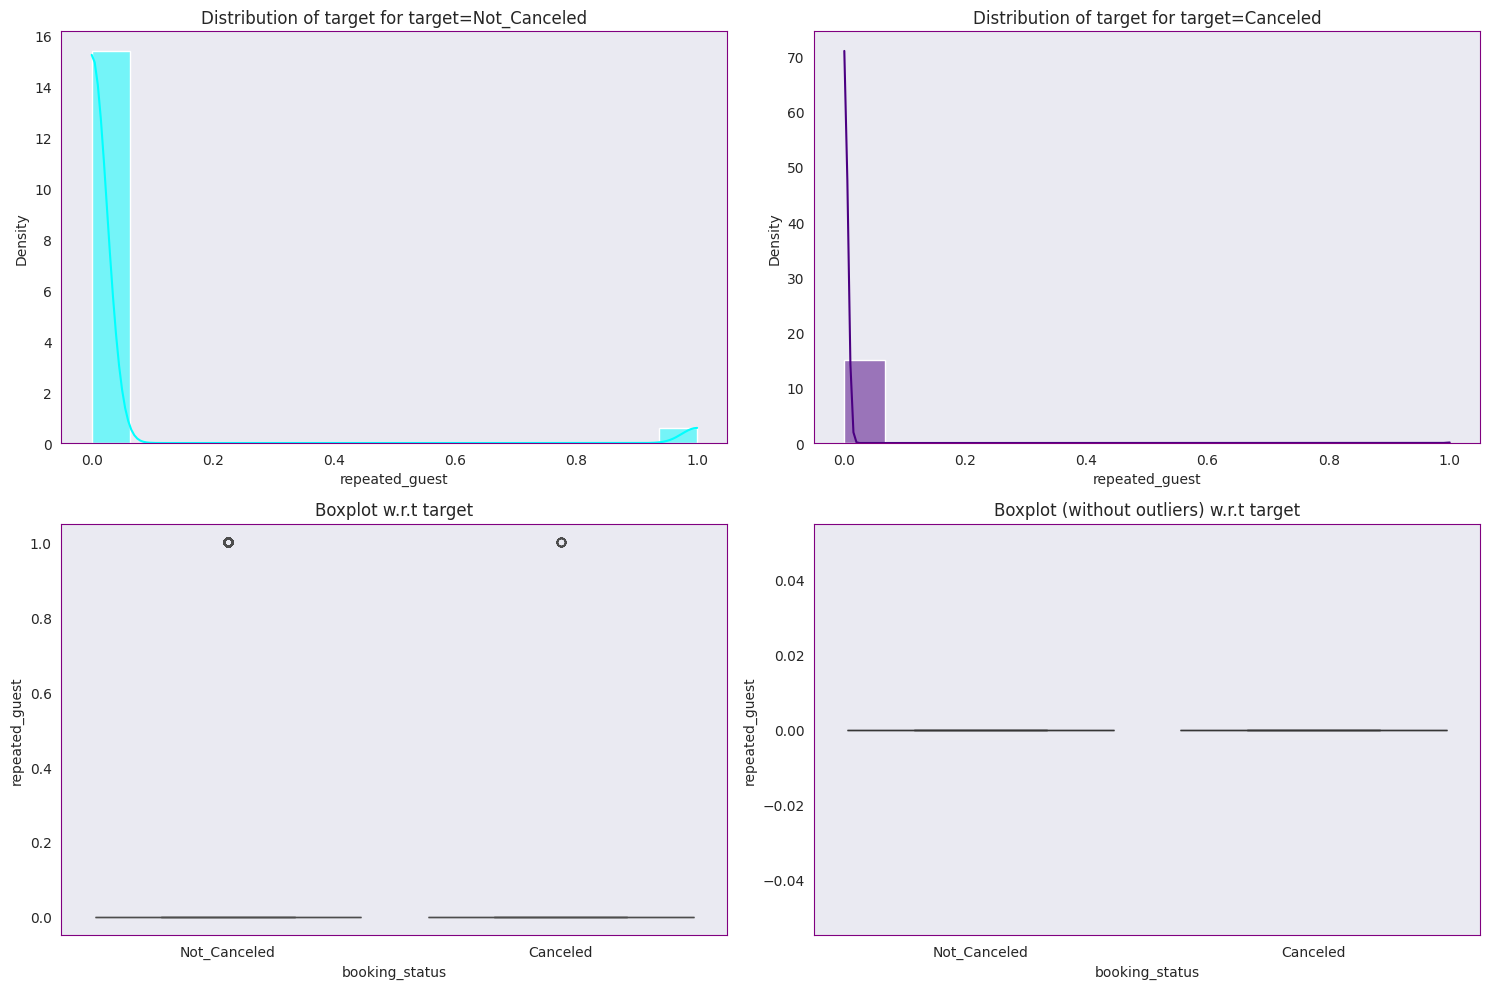

In [52]:
distribution_plot_wrt_target(df2, "repeated_guest", "booking_status")

Repeated guests cancel less than guests who are not repeat guests.<br>
Out of 930 booking by repeat guests only 16 cancelled. That is only 1.7% of all their bookings. <br>
Bookings made by non repeat guests cancel at a rate of 33.6%.

**No of Special Requests copared to Booking Status**

**6. Many guests have special requirements when booking a room.** <br>
**Does these affect booking cancellations?**

In [53]:
df2.groupby('no_of_special_requests')['booking_status'].value_counts()

no_of_special_requests  booking_status
0                       Not_Canceled      11232
                        Canceled           8545
1                       Not_Canceled       8670
                        Canceled           2703
2                       Not_Canceled       3727
                        Canceled            637
3                       Not_Canceled        675
4                       Not_Canceled         78
5                       Not_Canceled          8
Name: count, dtype: int64

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


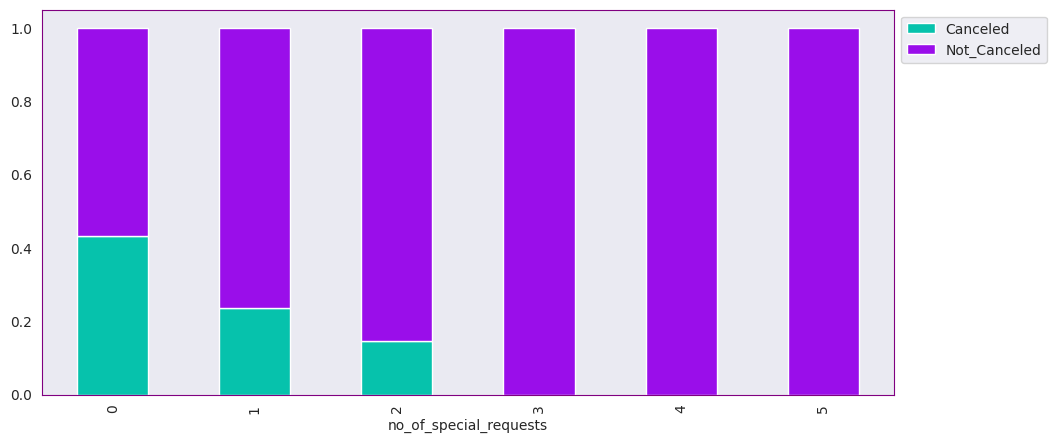

In [54]:
stacked_barplot(df2, "no_of_special_requests", "booking_status")

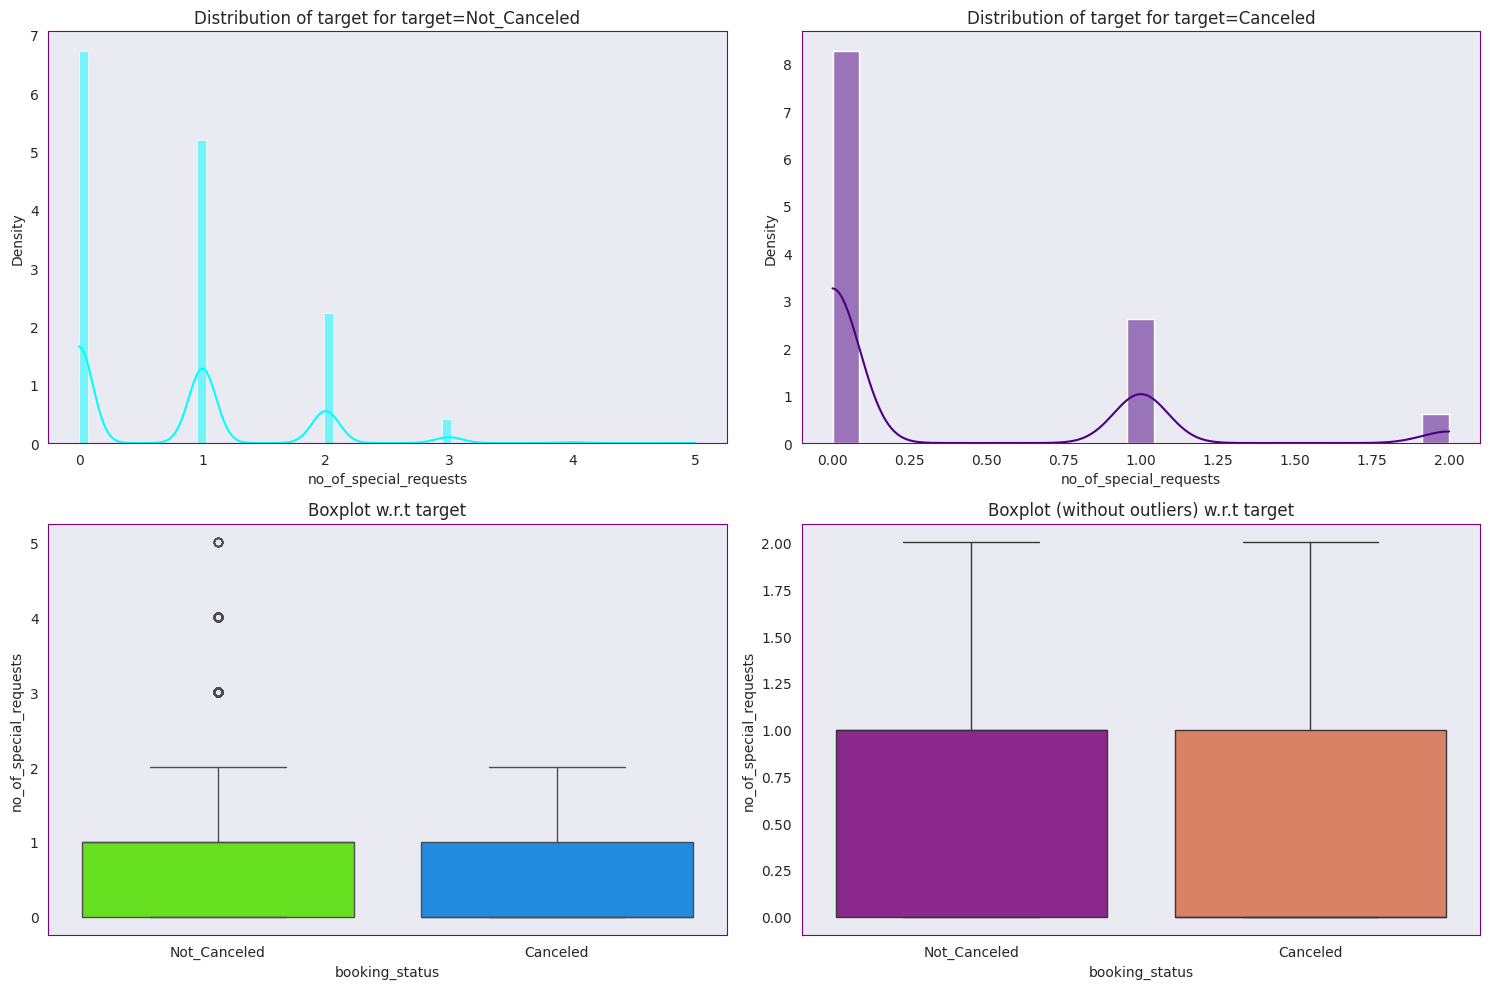

In [55]:
distribution_plot_wrt_target(df2, "no_of_special_requests", "booking_status")

The more the special request the less chance the guest will cancel. <br>
THe guests that had 3 or more special requests did not cancel in bookings.
The guests that had no special requests canceled 43.2% of their bookings.
The guesta that had 1 or 2 special requests canceled 21.2% of their bookings.

**Room Type Reserved compared to Type of Meal Plan Type**

type_of_meal_plan   Meal Plan 1  Meal Plan 2  Meal Plan 3  Not Selected    All
room_type_reserved                                                            
All                       27835         3305            5          5130  36275
Room_Type 7                 152            2            3             1    158
Room_Type 1               20157         2934            1          5038  28130
Room_Type 4                5748          273            1            35   6057
Room_Type 2                 653           16            0            23    692
Room_Type 3                   5            0            0             2      7
Room_Type 5                 242           14            0             9    265
Room_Type 6                 878           66            0            22    966
------------------------------------------------------------------------------------------------------------------------


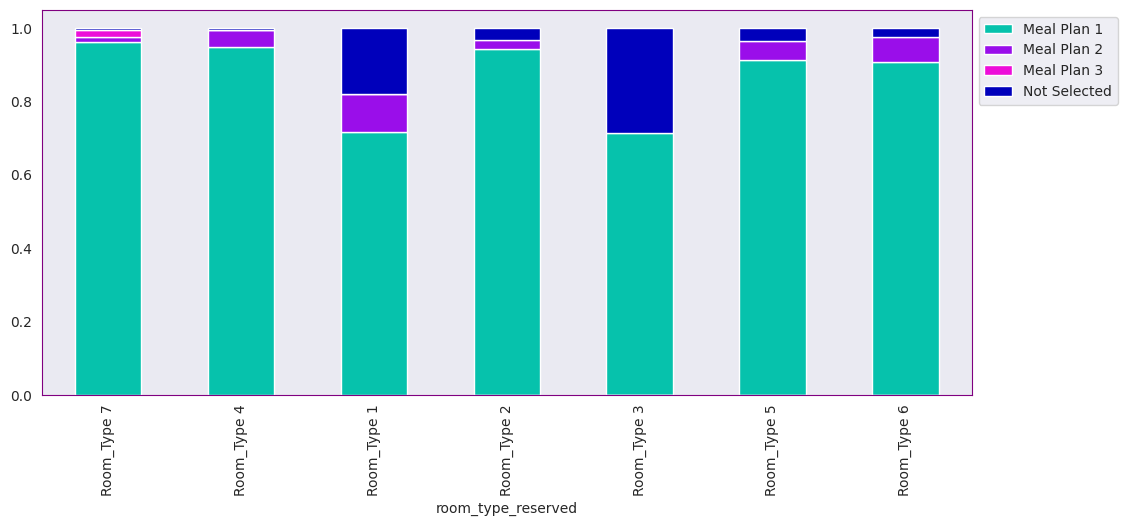

In [56]:
stacked_barplot(df2, "room_type_reserved", "type_of_meal_plan")

Across all room types meal plan 1 is the most popular. <br>
Second most popular is no meal plan (not selected).

**Room Type Reserved compared to Market Segment Type**

market_segment_type  Aviation  Complementary  Corporate  Offline  Online  \
room_type_reserved                                                         
All                       125            391       2017    10528   23214   
Room_Type 4                65             52         99      613    5228   
Room_Type 1                60            247       1833     9747   16243   
Room_Type 2                 0             20          2       57     613   
Room_Type 3                 0              2          1        2       2   
Room_Type 5                 0             17         74       81      93   
Room_Type 6                 0             14          3       23     926   
Room_Type 7                 0             39          5        5     109   

market_segment_type    All  
room_type_reserved          
All                  36275  
Room_Type 4           6057  
Room_Type 1          28130  
Room_Type 2            692  
Room_Type 3              7  
Room_Type 5            265  
Room_Ty

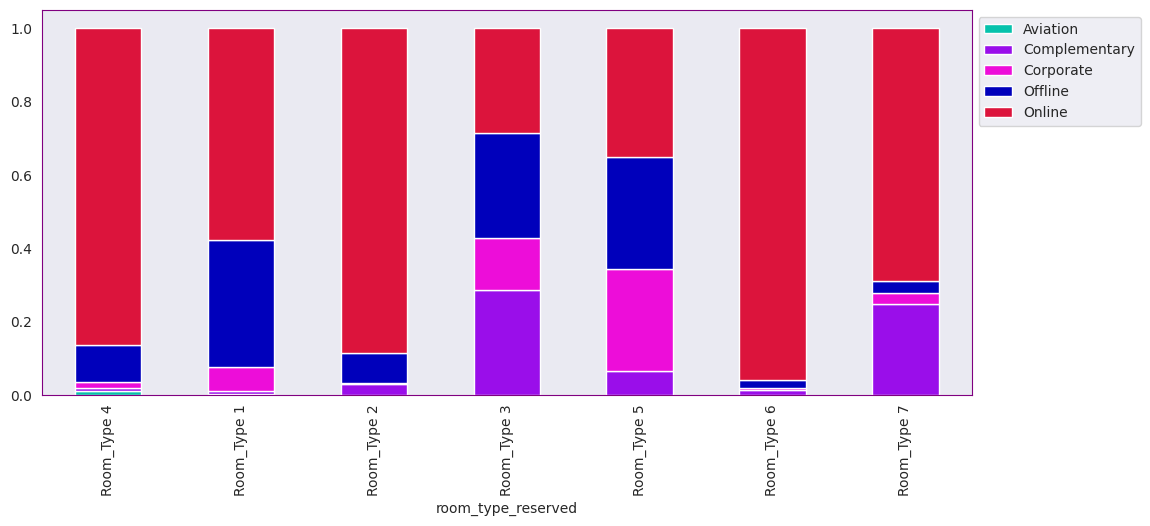

In [57]:
stacked_barplot(df2, "room_type_reserved", "market_segment_type")

Aviation guests always choose room type 4 and room type 1. <br>
All rooms are mostly reserved by Online guests, with room type 4, room type 2 and room type 6 being the most popular for online guests.

Market Segement compared to repeated guest

market_segment_type  Aviation  Complementary  Corporate  Offline  Online  \
repeated_guest                                                             
All                       125            391       2017    10528   23214   
0                         109            265       1415    10438   23118   
1                          16            126        602       90      96   

market_segment_type    All  
repeated_guest              
All                  36275  
0                    35345  
1                      930  
------------------------------------------------------------------------------------------------------------------------


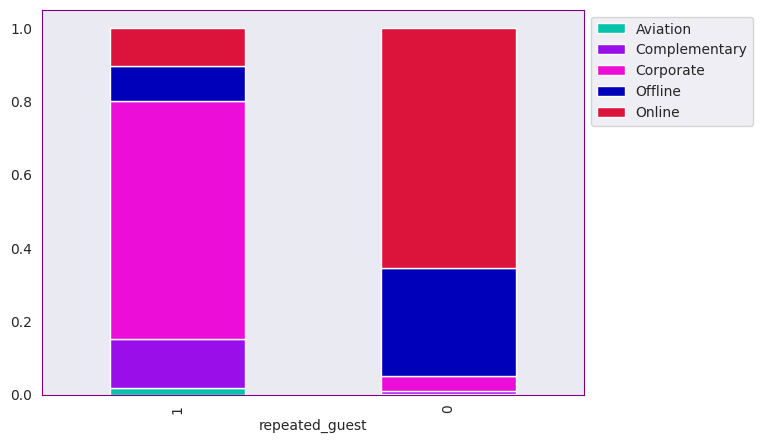

In [226]:
stacked_barplot(df2, "repeated_guest", "market_segment_type")

**Lead Time compared to Booking Status**

booking_status  Canceled  Not_Canceled    All
lead_time                                    
All                11885         24390  36275
188                  142            11    153
166                  122            19    141
245                  111             3    114
1                    110           968   1078
...                  ...           ...    ...
306                    0             2      2
336                    0            15     15
327                    0            15     15
318                    0             1      1
300                    0             1      1

[353 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


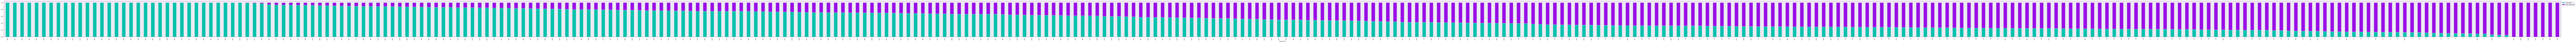

In [58]:
stacked_barplot(df2, "lead_time", "booking_status")

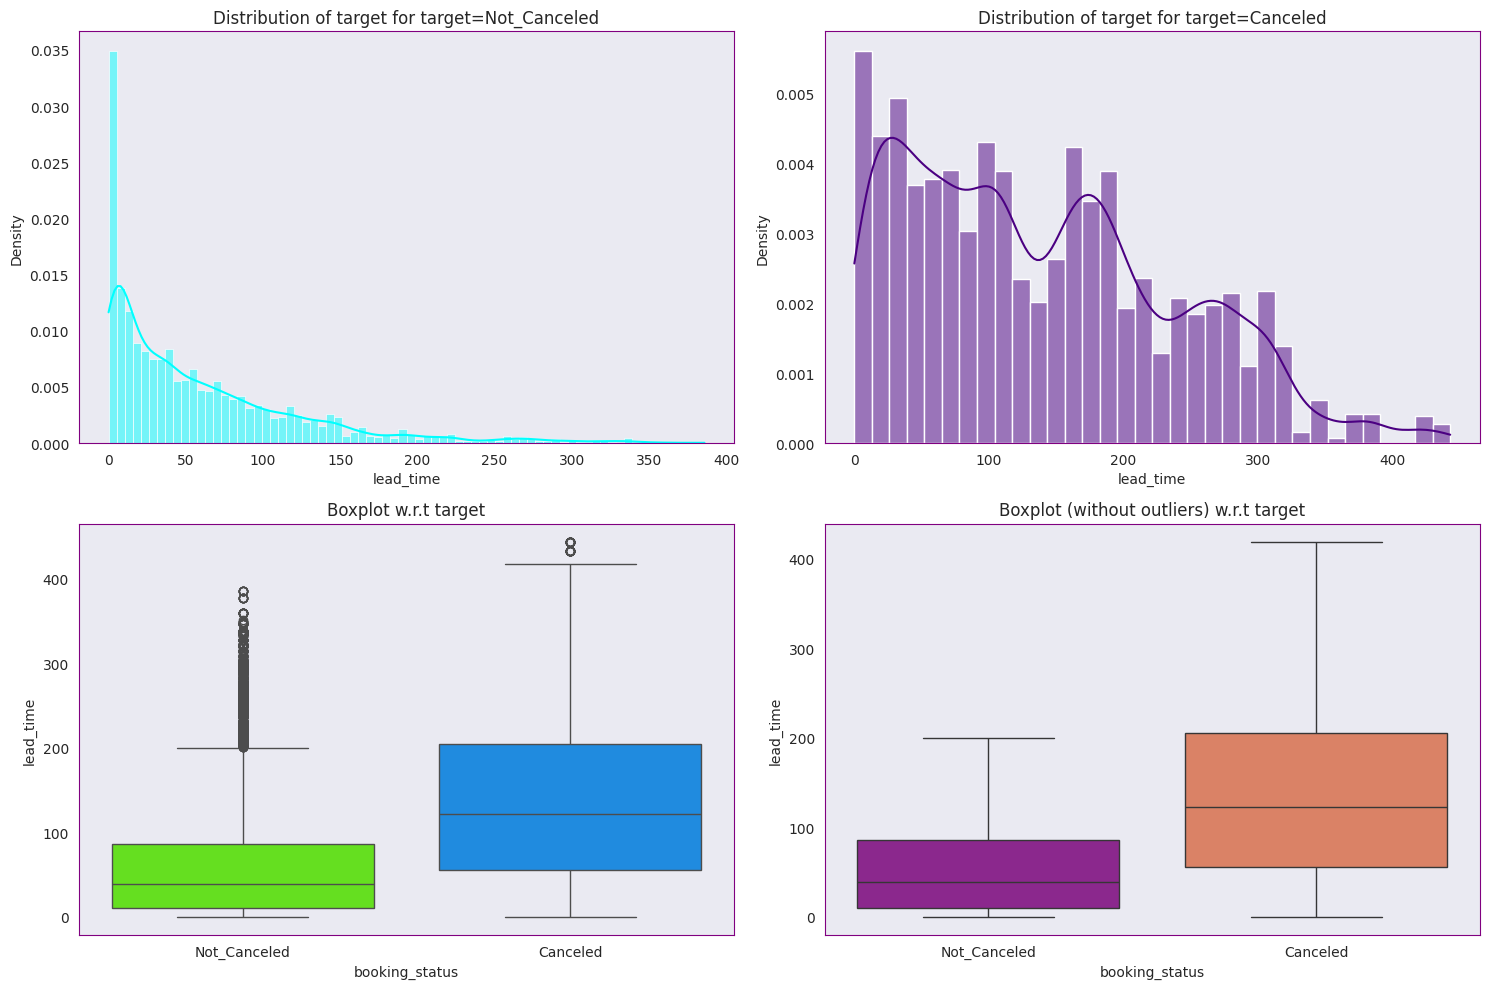

In [59]:
distribution_plot_wrt_target(df2, "lead_time", "booking_status")

The more the lead time the bugger chance of cancellation.<br>
There are fewer bookings with long lead times.

In [60]:
df2.groupby('booking_status').agg({'lead_time':'mean'}).sort_values(by='lead_time',ascending=False).reset_index()

booking_status  lead_time
0       Canceled     139.22
1   Not_Canceled      58.93

Average lead_time for cancellation is 139 days, whereas the average lead time for not_canceled bookings is ~59 days.

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


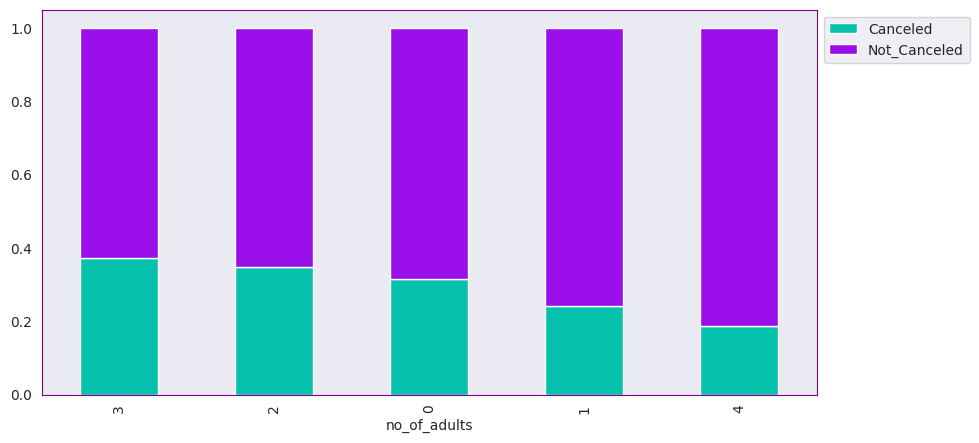

In [61]:
stacked_barplot(df2, "no_of_adults", "booking_status")

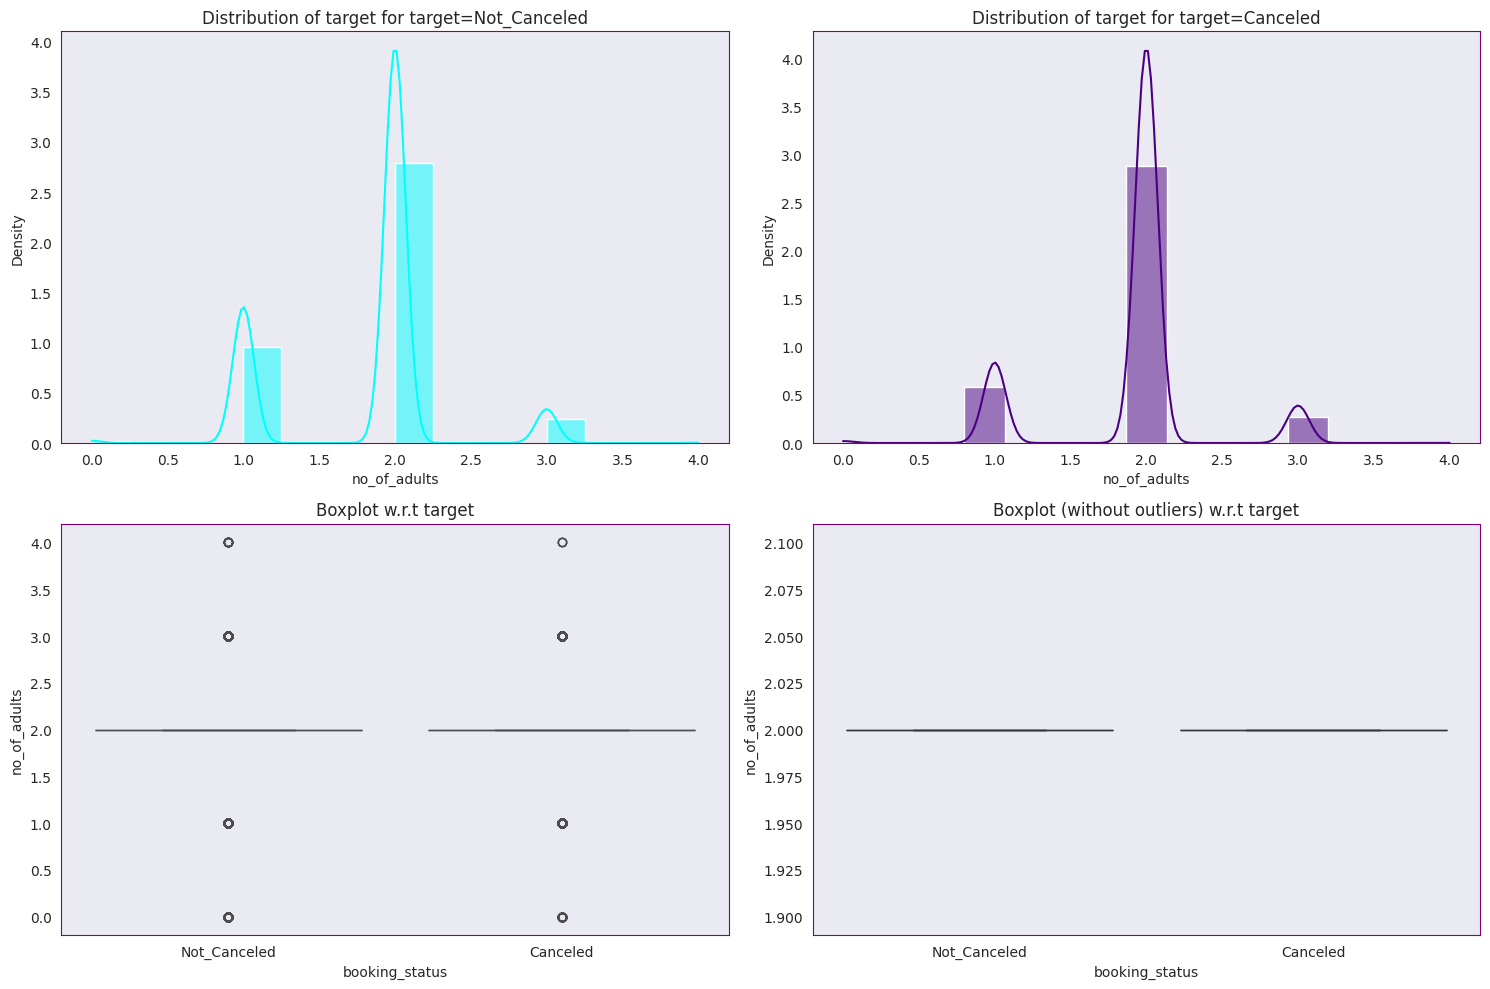

In [62]:
distribution_plot_wrt_target(df2, "no_of_adults", "booking_status")

The amount of adults does not seem to effect whether a guest cancels or not.

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


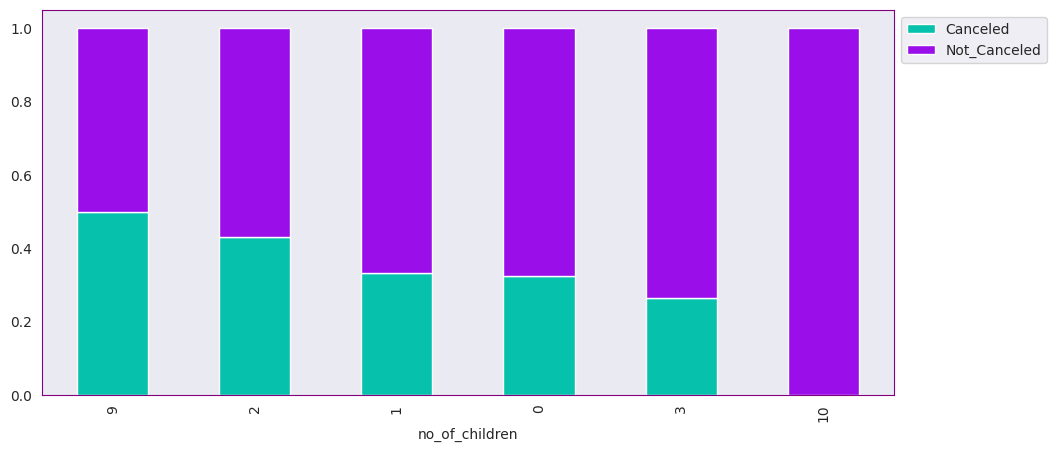

In [63]:
stacked_barplot(df2, "no_of_children", "booking_status")

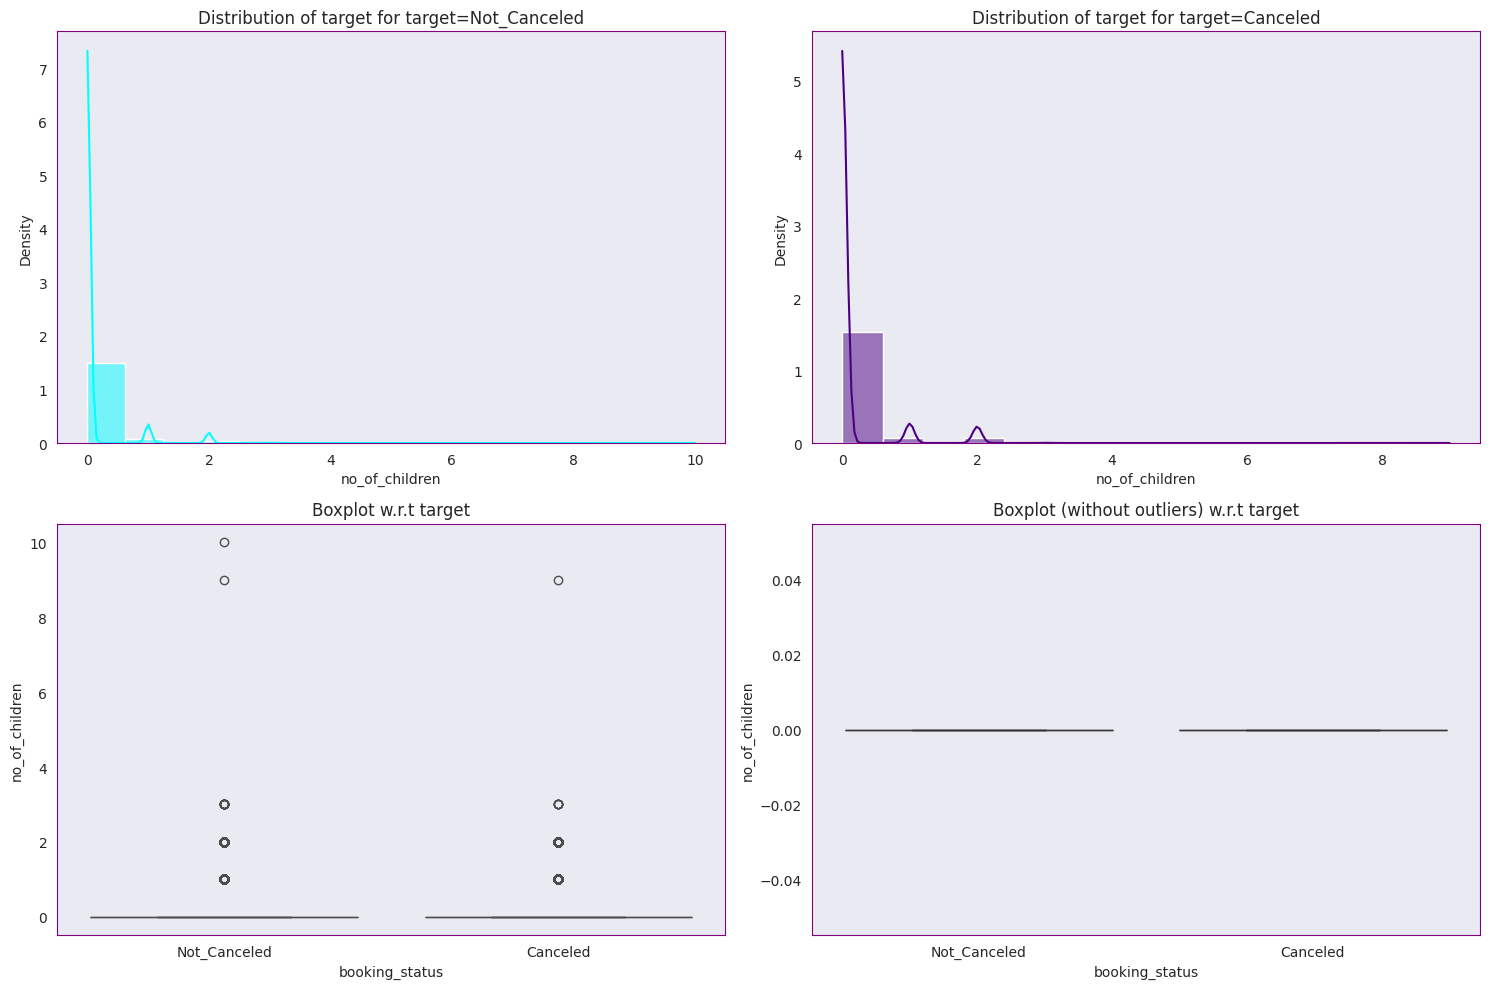

In [64]:
distribution_plot_wrt_target(df2, "no_of_children", "booking_status")

Except for the 10 children, the amount of children only minimally effects whether the guest cancels or not.

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


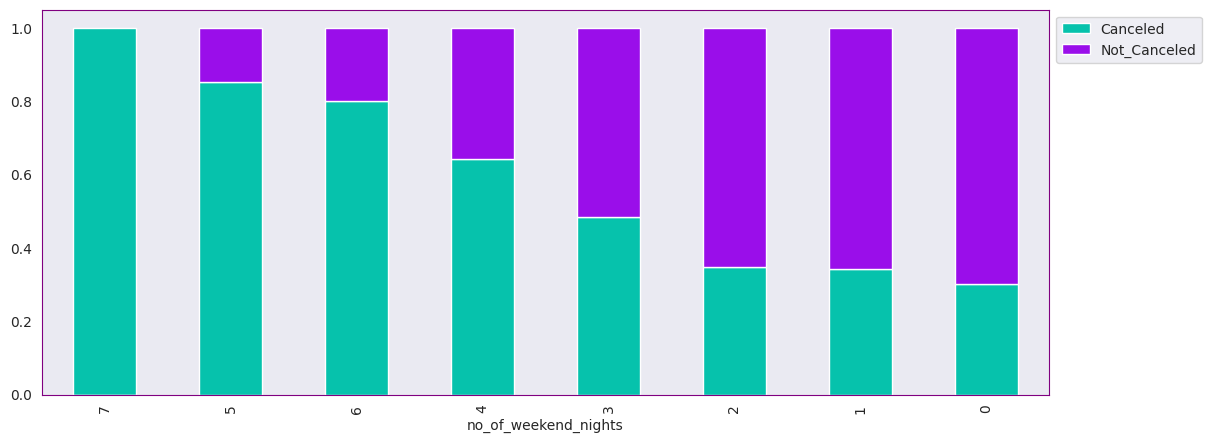

In [65]:
stacked_barplot(df2, "no_of_weekend_nights", "booking_status")

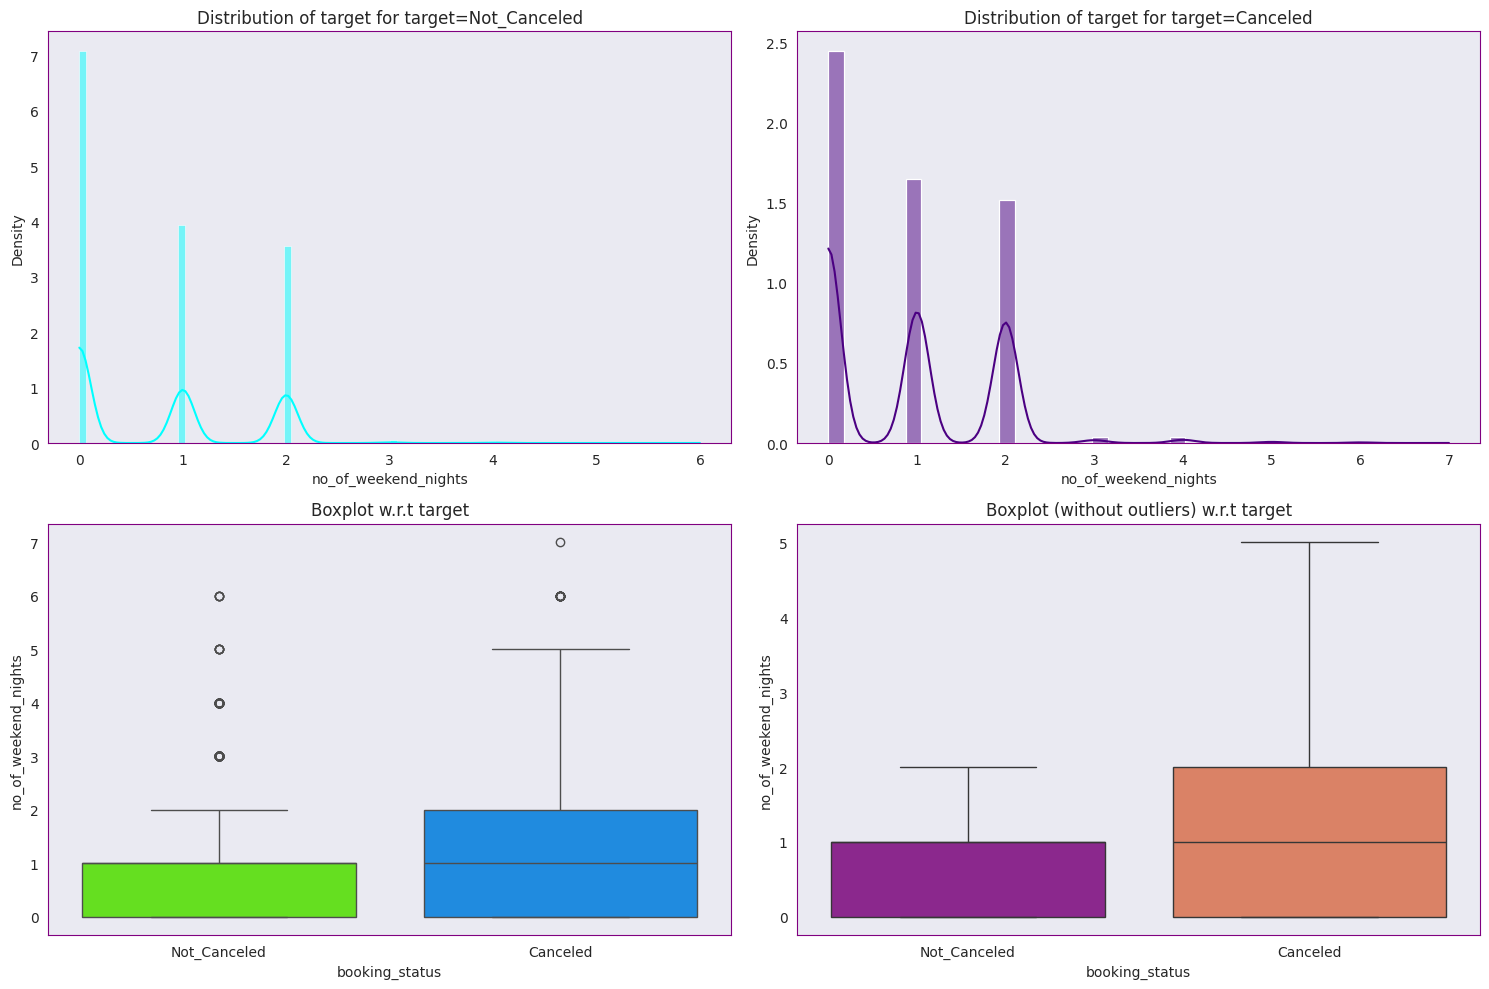

In [66]:
distribution_plot_wrt_target(df2, "no_of_weekend_nights", "booking_status")

7 Weekend nights is completely canceled. <br>
As the amount of weekend nights went down the cancellations went down.

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

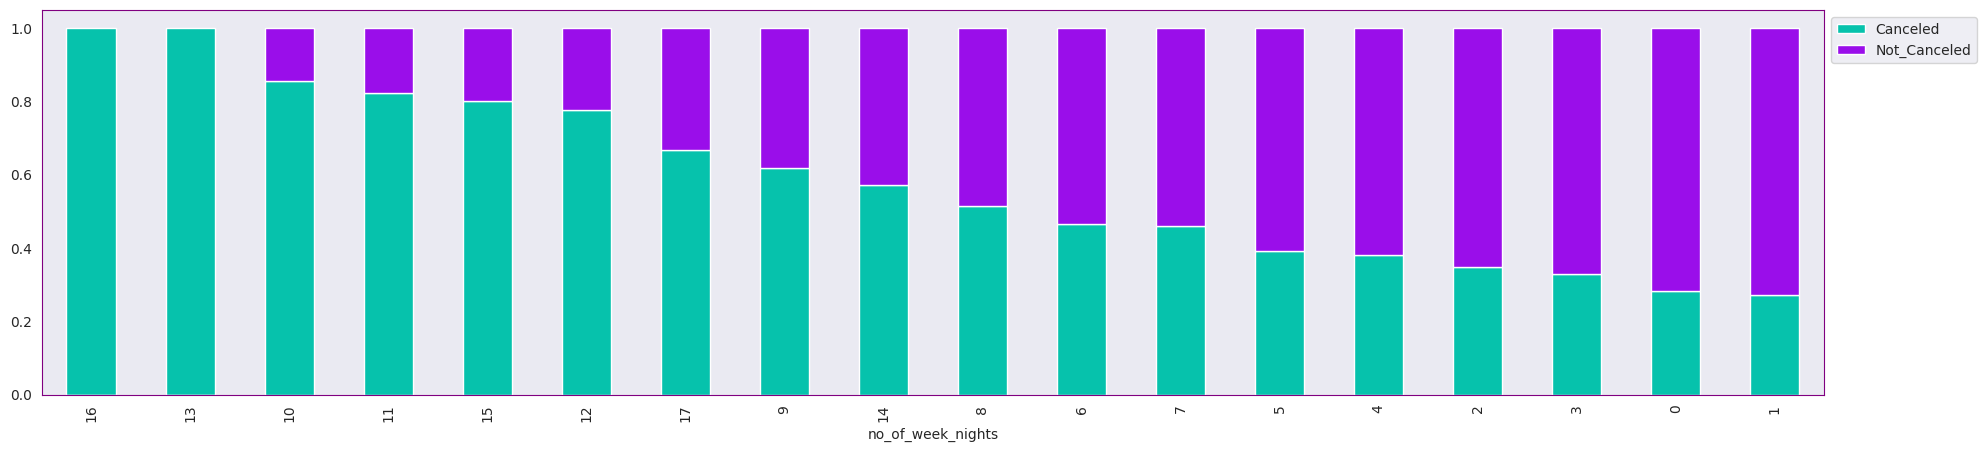

In [67]:
stacked_barplot(df2, "no_of_week_nights", "booking_status")

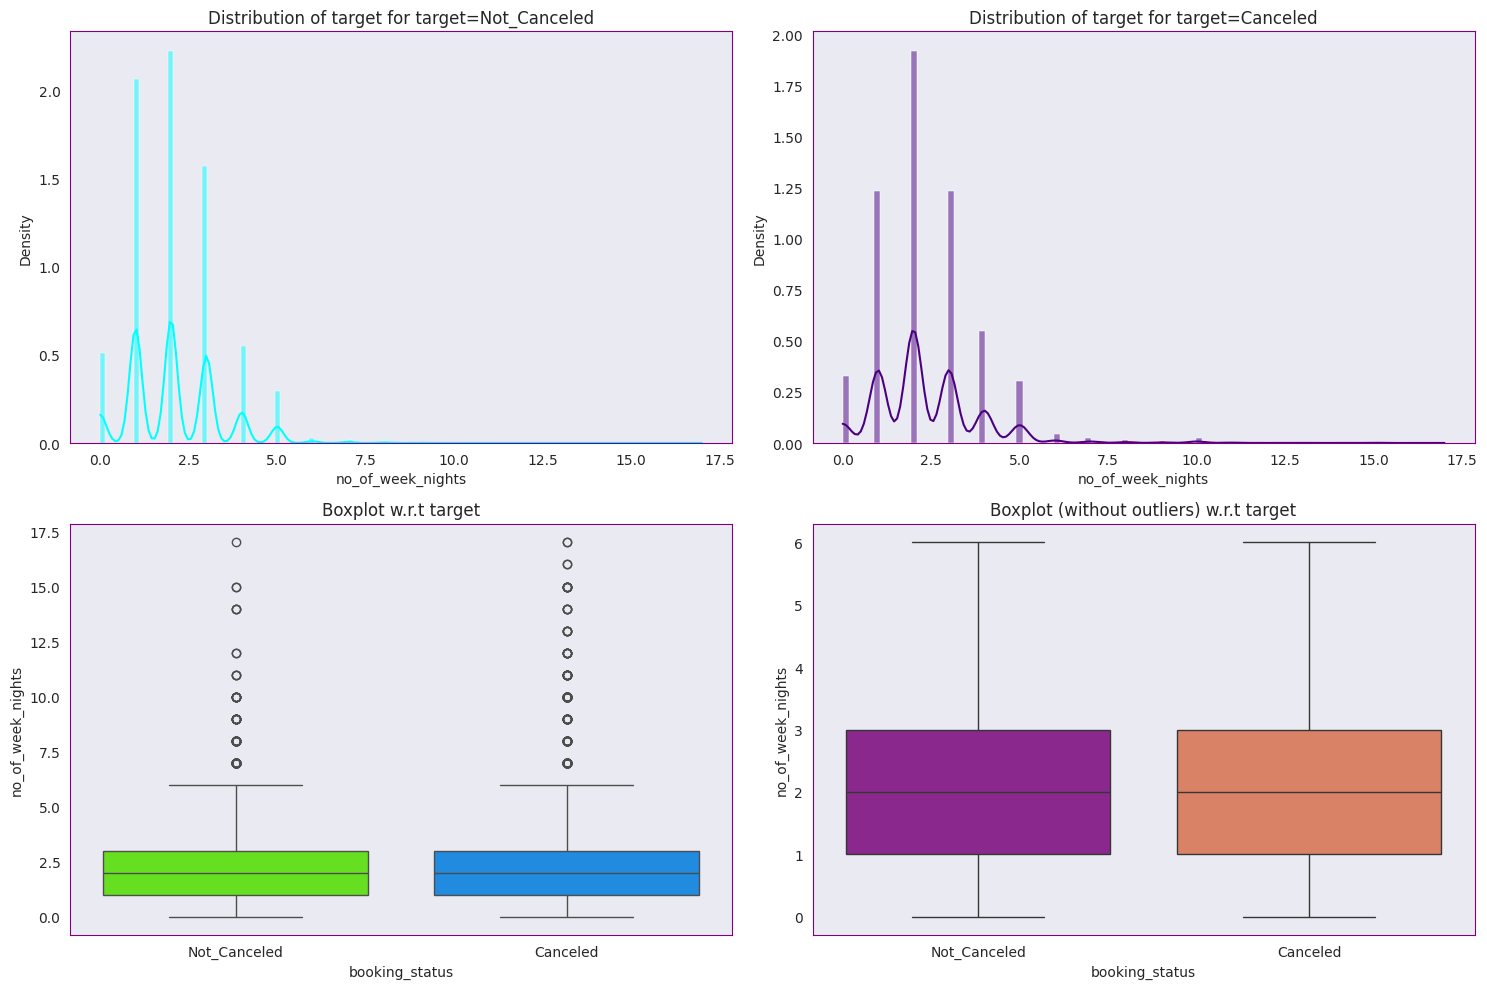

In [68]:
distribution_plot_wrt_target(df2, "no_of_week_nights", "booking_status")

16and 13 Week nights is completely canceled. <br>
As the amount of week nights went down the cancellations went down.

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


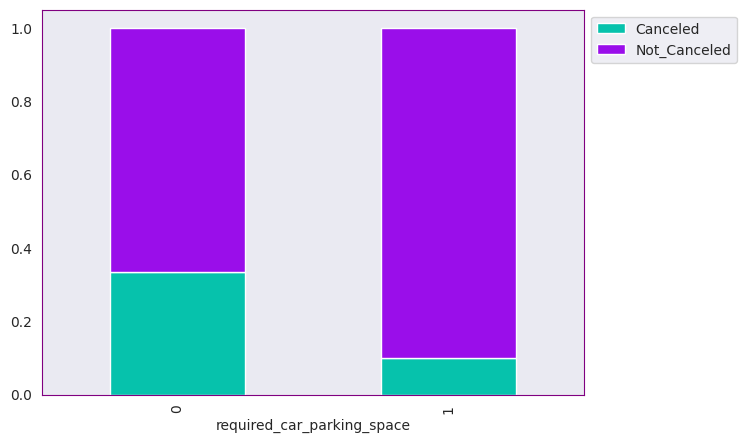

In [69]:
stacked_barplot(df2, "required_car_parking_space", "booking_status")

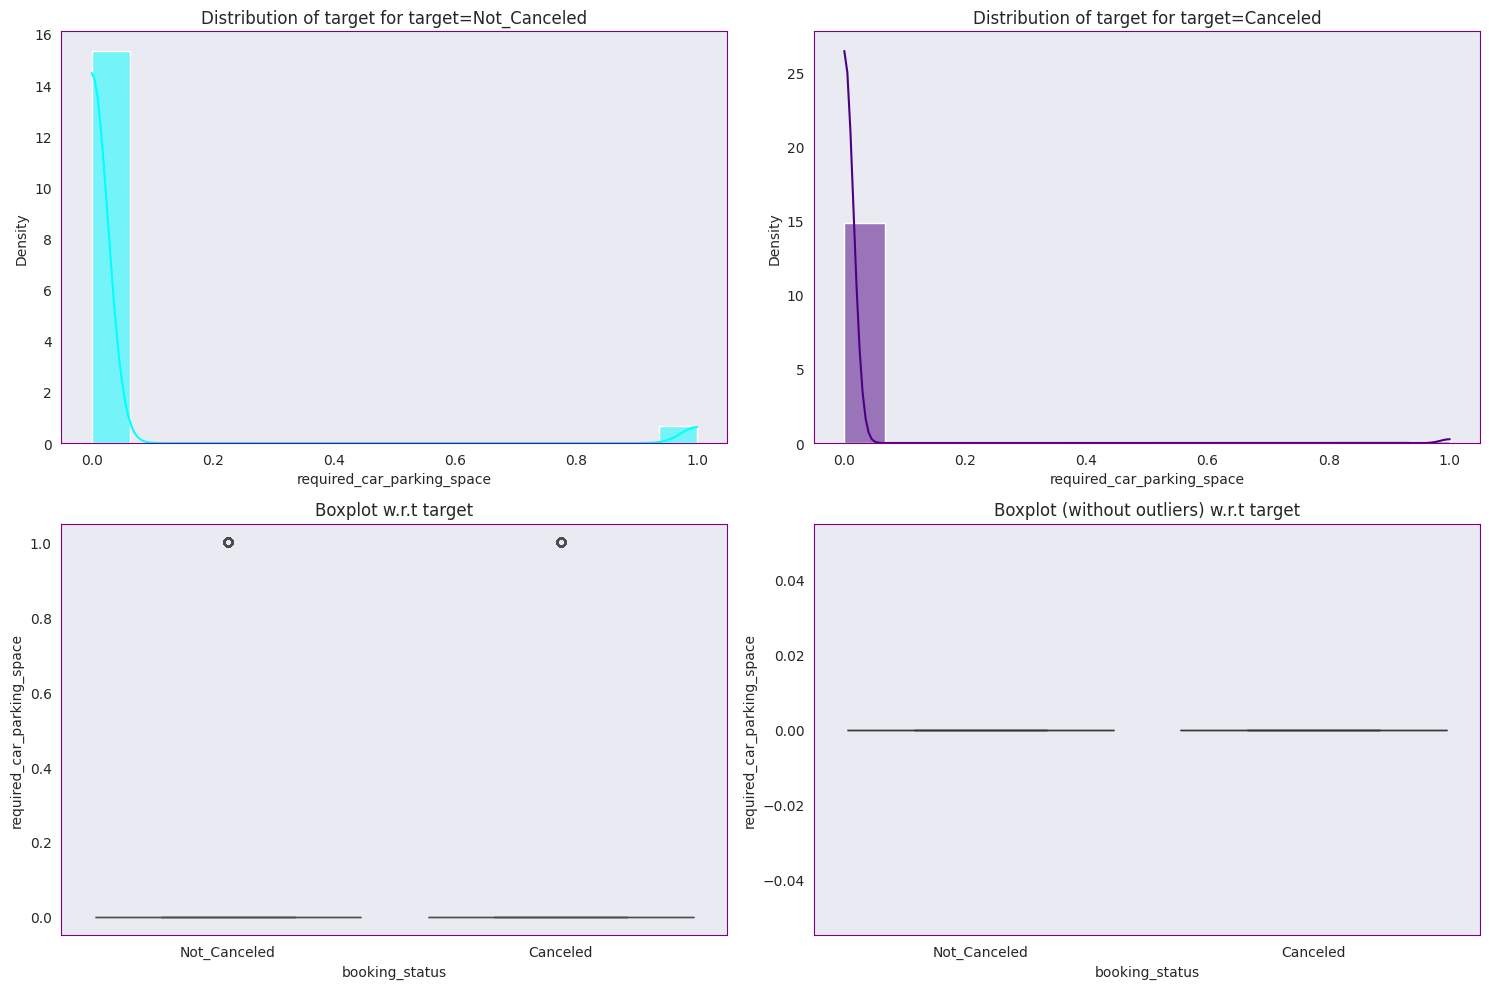

In [70]:
distribution_plot_wrt_target(df2, "required_car_parking_space", "booking_status")

Guests that required a parking space canceled less. <br>
Guests who did not require a parking space canceled 33.5% of the time. <br>
Guests who needed a parking space canceled 10.1% of the time.



booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


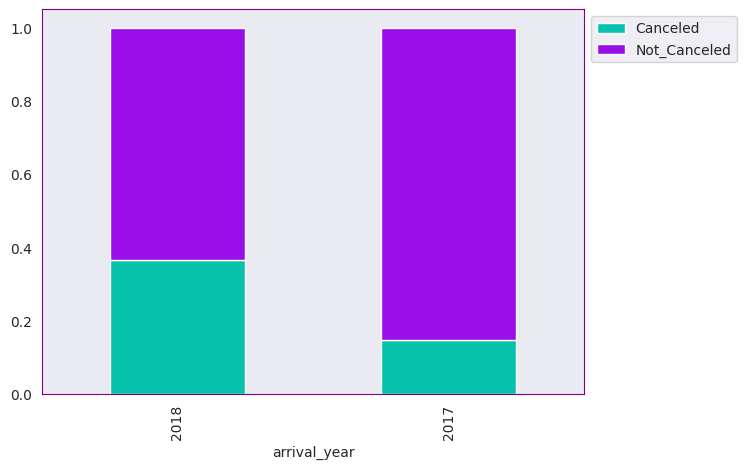

In [71]:
stacked_barplot(df2, "arrival_year", "booking_status")

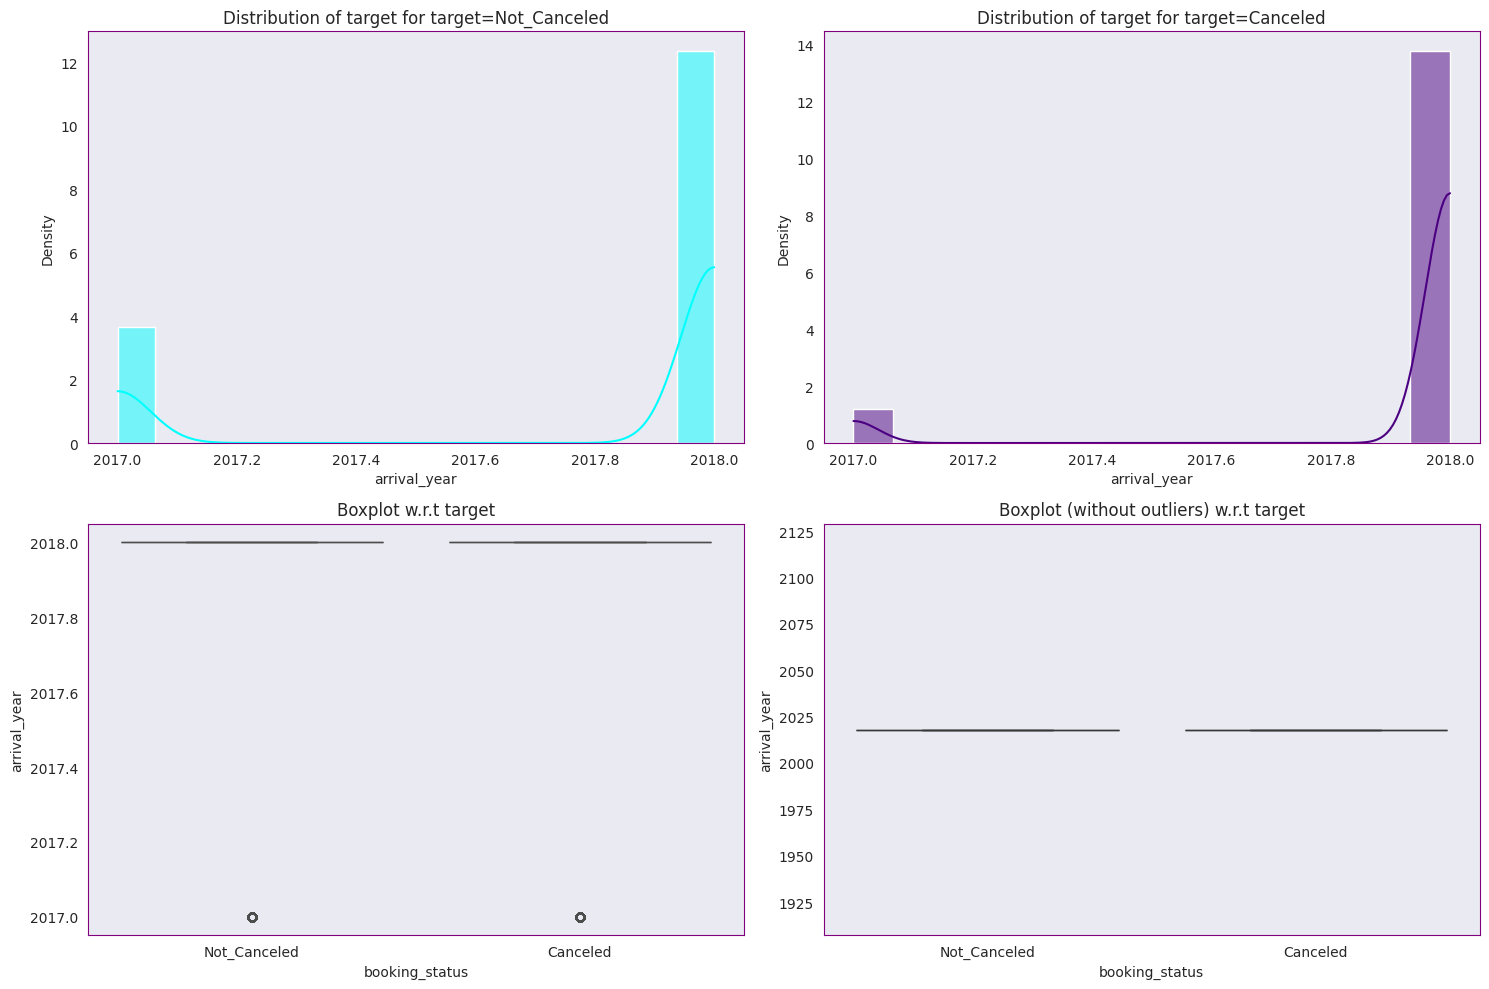

In [72]:
distribution_plot_wrt_target(df2, "arrival_year", "booking_status")

2018 had 36.7% cancel. <br>
2017 had 14.7% cancel.
82% of all guests booked rooms for 2018.

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


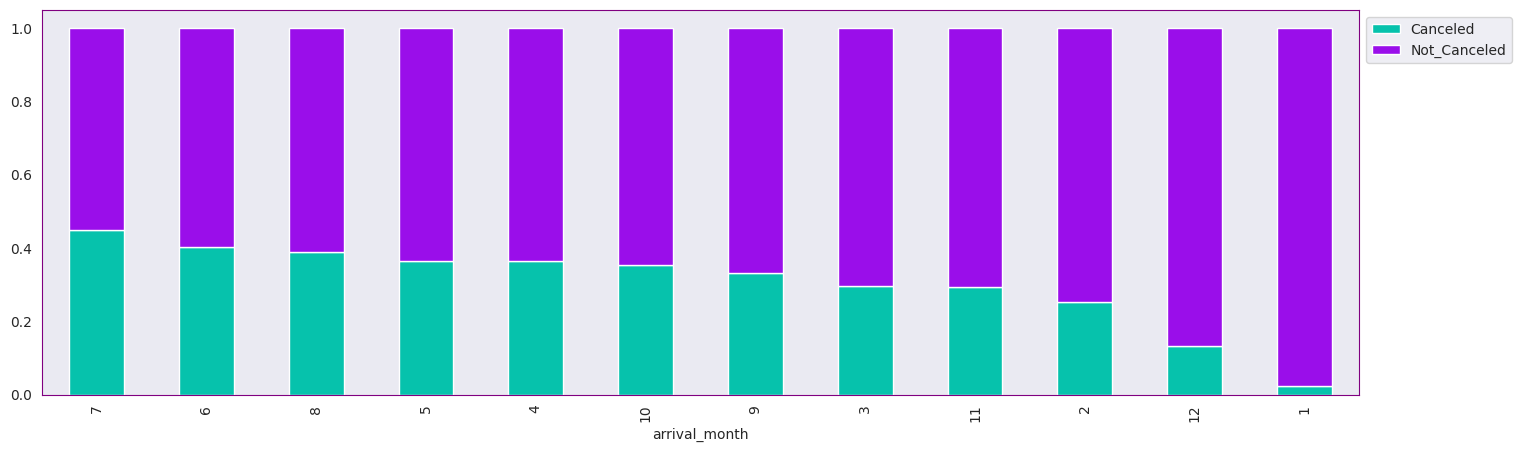

In [73]:
stacked_barplot(df2, "arrival_month", "booking_status")

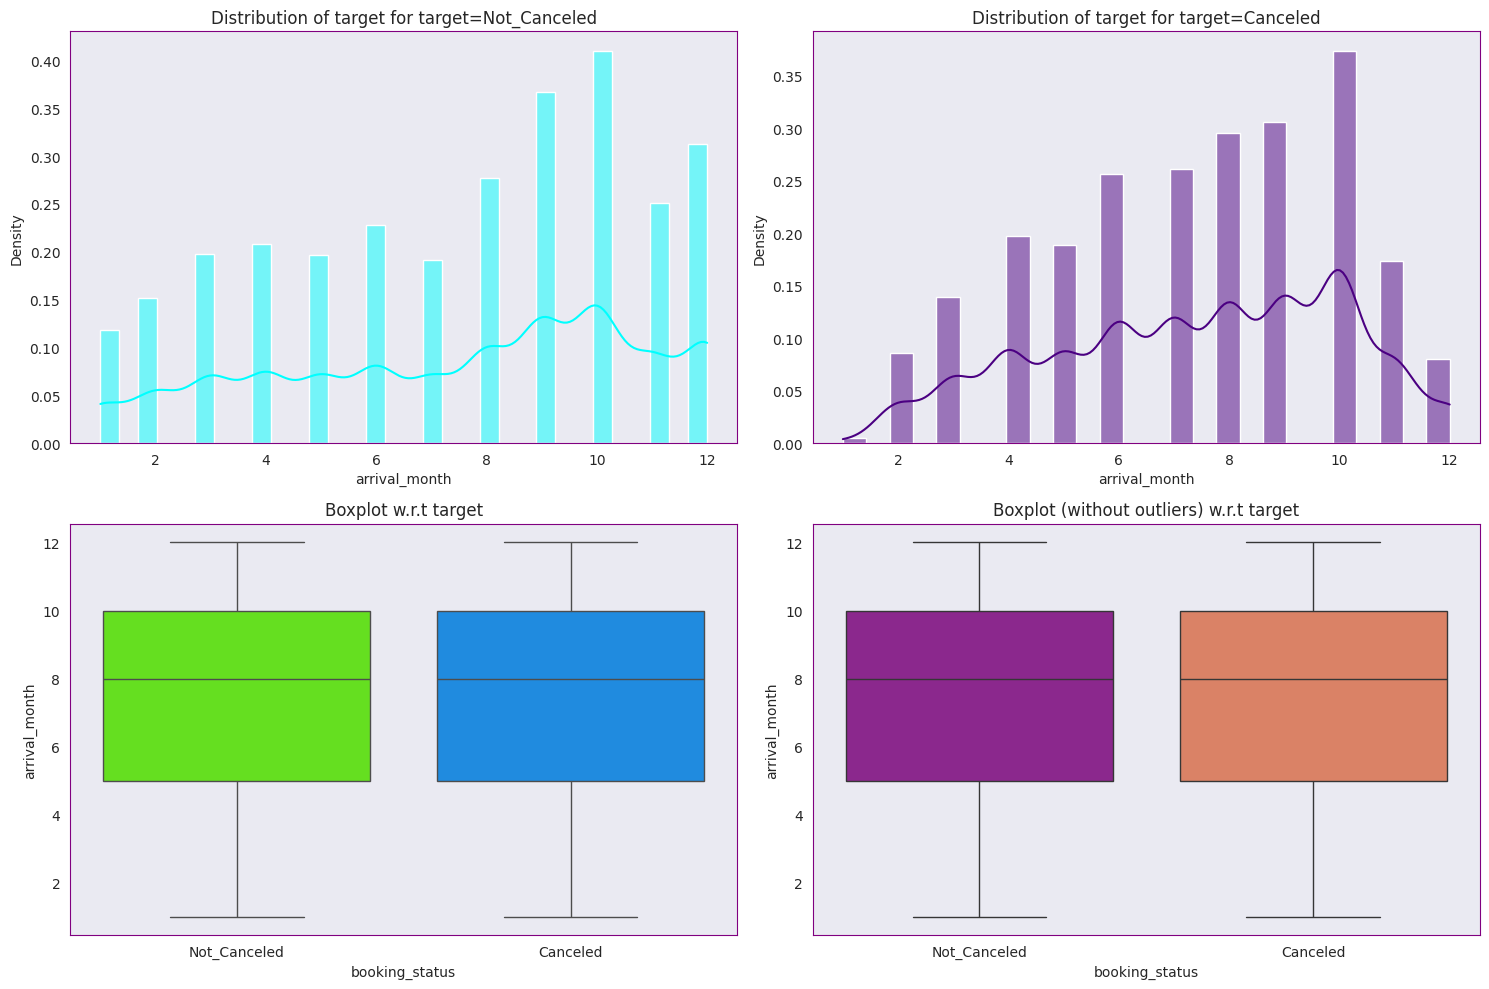

In [74]:
distribution_plot_wrt_target(df2, "arrival_month", "booking_status")

Arrival month 10 - cancellations 35.36% <br>
Arrival month 9 - cancellations 33.36% <br>
Arrival month 8 - cancellations 39.02% <br>
Arrival month 7 - cancellations 45.00% <br>
Arrival month 6 - cancellations 40.31% <br>
Arrival month 4 - cancellations 36.37% <br>
Arrival month 5 - cancellations 36.49% <br>
Arrival month 11 - cancellations 29.36% <br>
Arrival month 3 - cancellations 29.69% <br>
Arrival month 2 - cancellations 25.23% <br>
Arrival month 12 - cancellations 13.31% <br>
Arrival month 1 - cancellations 2.37% <br>



booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

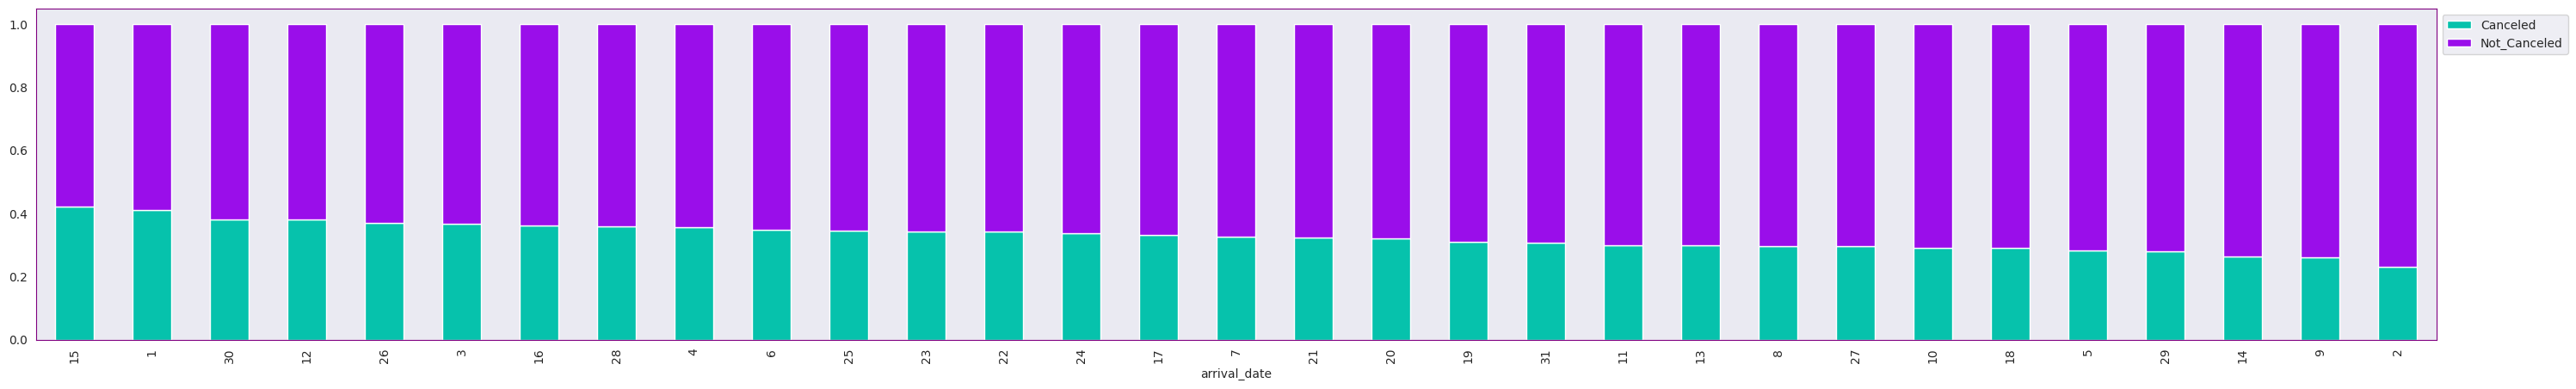

In [75]:
stacked_barplot(df2, "arrival_date", "booking_status")

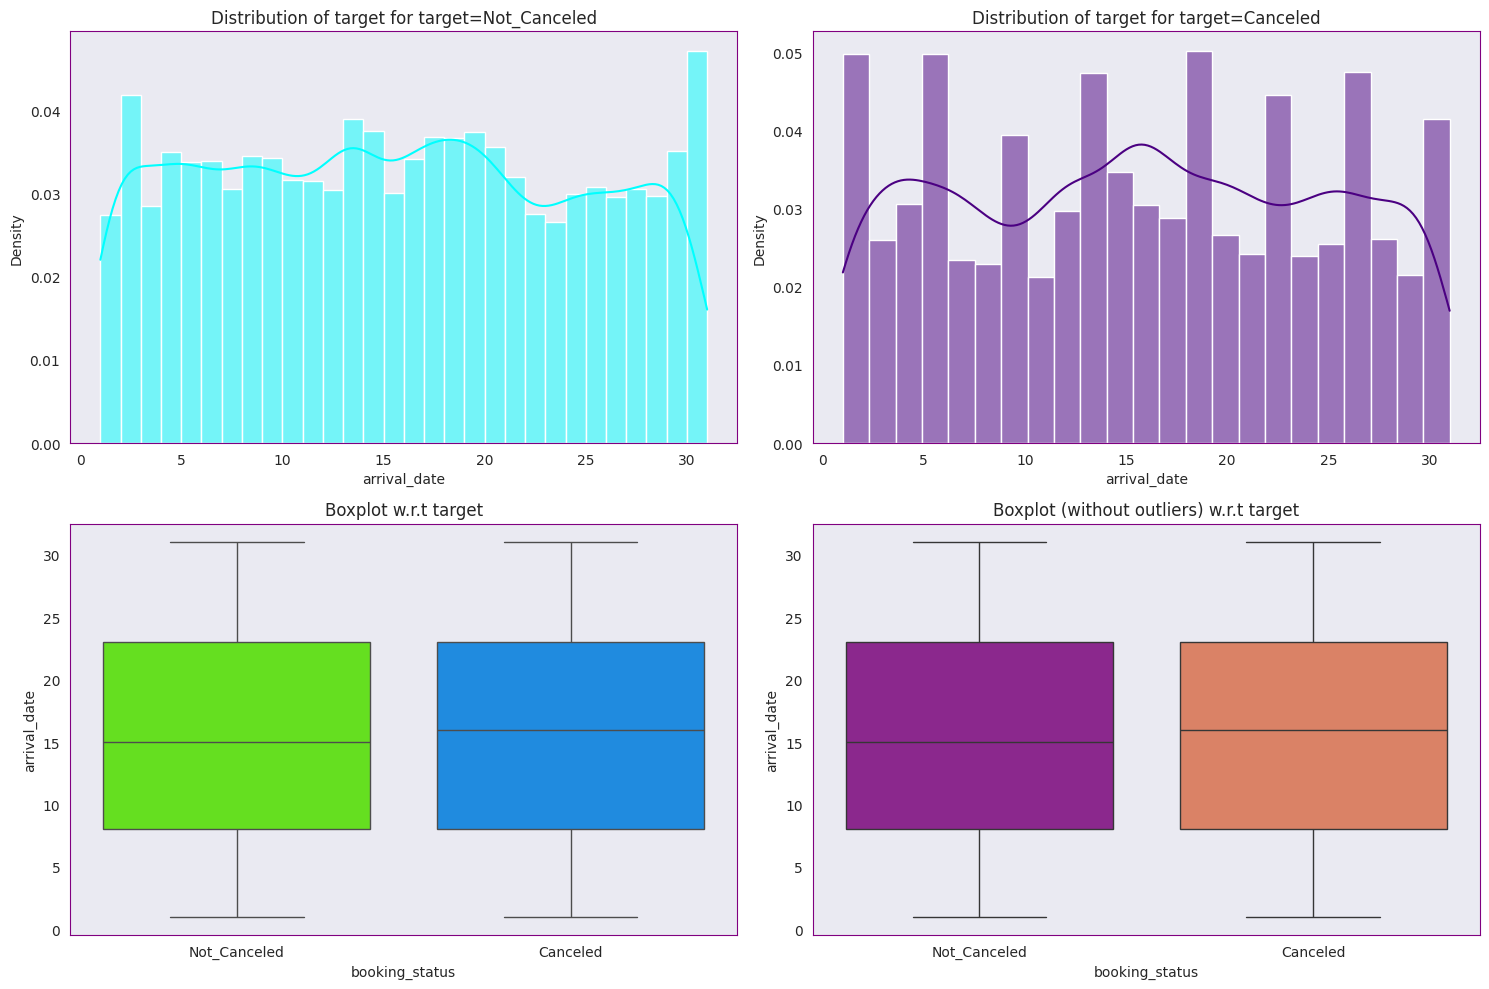

In [76]:
distribution_plot_wrt_target(df2, "arrival_date", "booking_status")

Top 5 cancelation days: <br>
Day 15 - 42.26% <br>
Day 1 - 41.04% <br>
Day 30 - 38.24% <br>
Day 12 - 38.21% <br>
Day 26 - 37.09% <br>

Lowest 5 cancelation days: <br>
Day 2 - 23.14% <br>
Day 9 - 26.02% <br>
Day 14 - 26.33% <br>
Day 29 - 28.07% <br>
Day 5 - 28.42% <br>

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


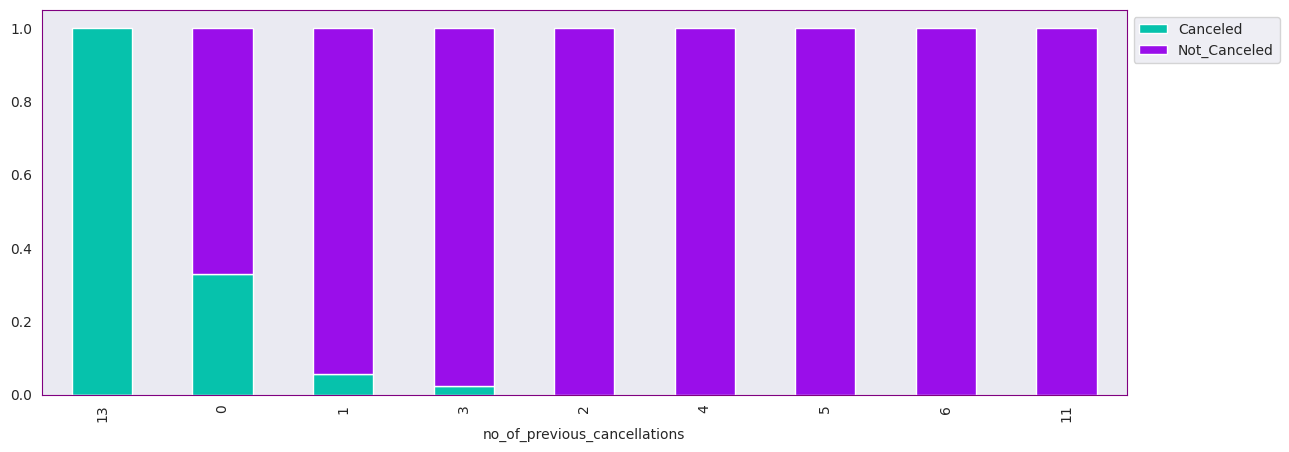

In [77]:
stacked_barplot(df2, "no_of_previous_cancellations", "booking_status")

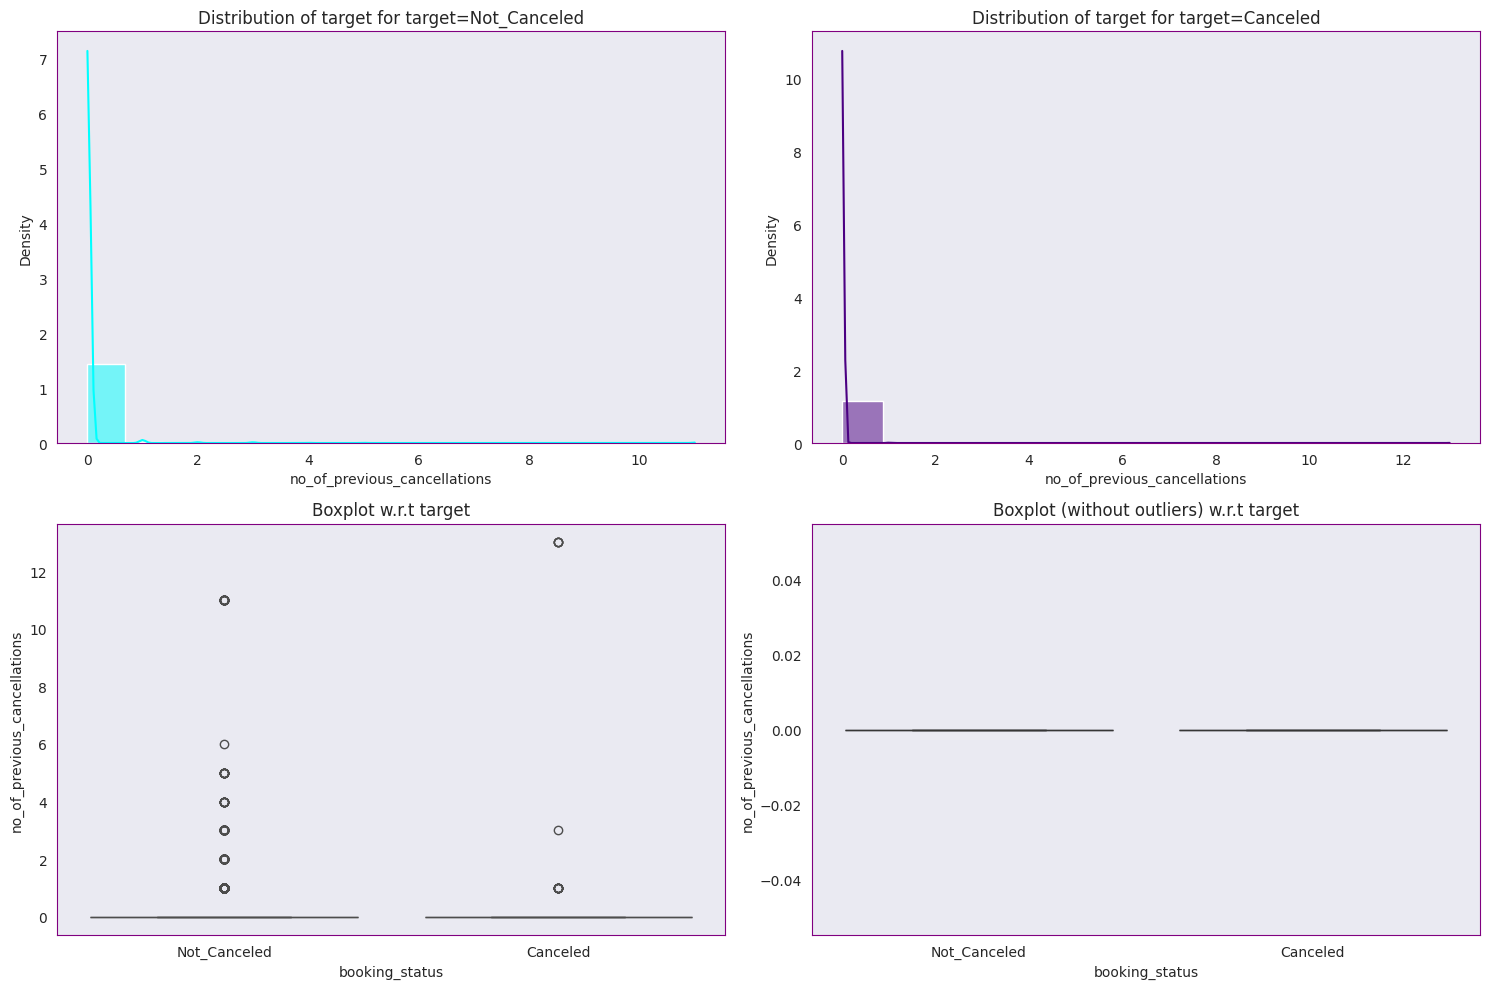

In [78]:
distribution_plot_wrt_target(df2, "no_of_previous_cancellations", "booking_status")

No of previous cancellations 11, 6, 5, 4 and 2 had 0 cancellations. <br>
No of previous cancellations 13 had 100% cancelled. <br>
No of previous cancellations 1 had 5.56% cancelled. <br>
No of previous cancellations 0 had 33.03% cancelled.

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1                                            4           224    228
12                                           1            11     12
4                                            1            64     65
6                                            1            35     36
2                                            0           112    112
44                                           0             2      2
43                                           0             1      1
42                                           0             1      1
41                                           0             1      1
40                                           0             1      1
38                                           0  

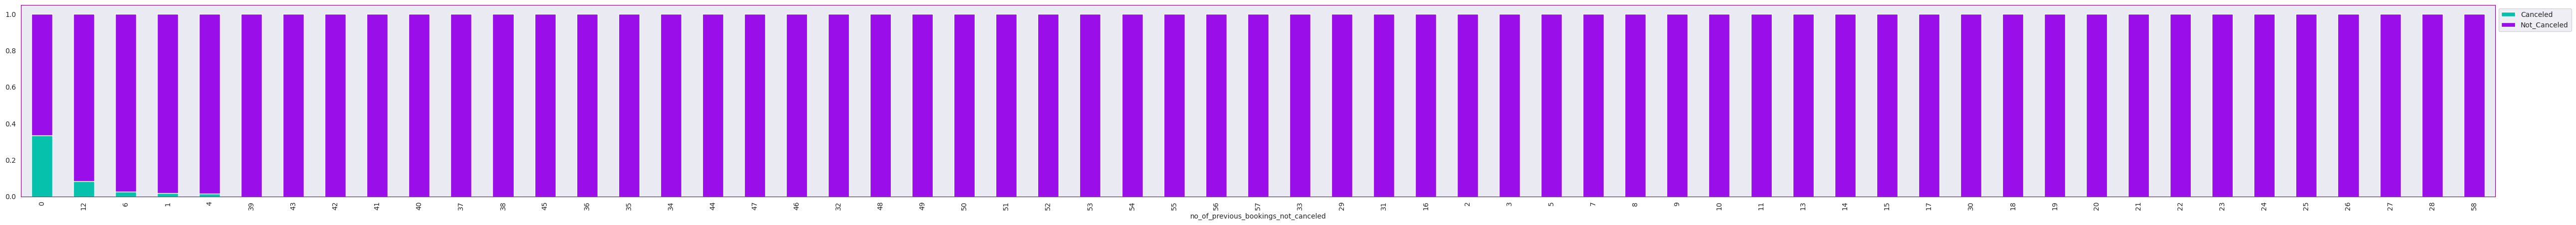

In [79]:
stacked_barplot(df2, "no_of_previous_bookings_not_canceled", "booking_status")

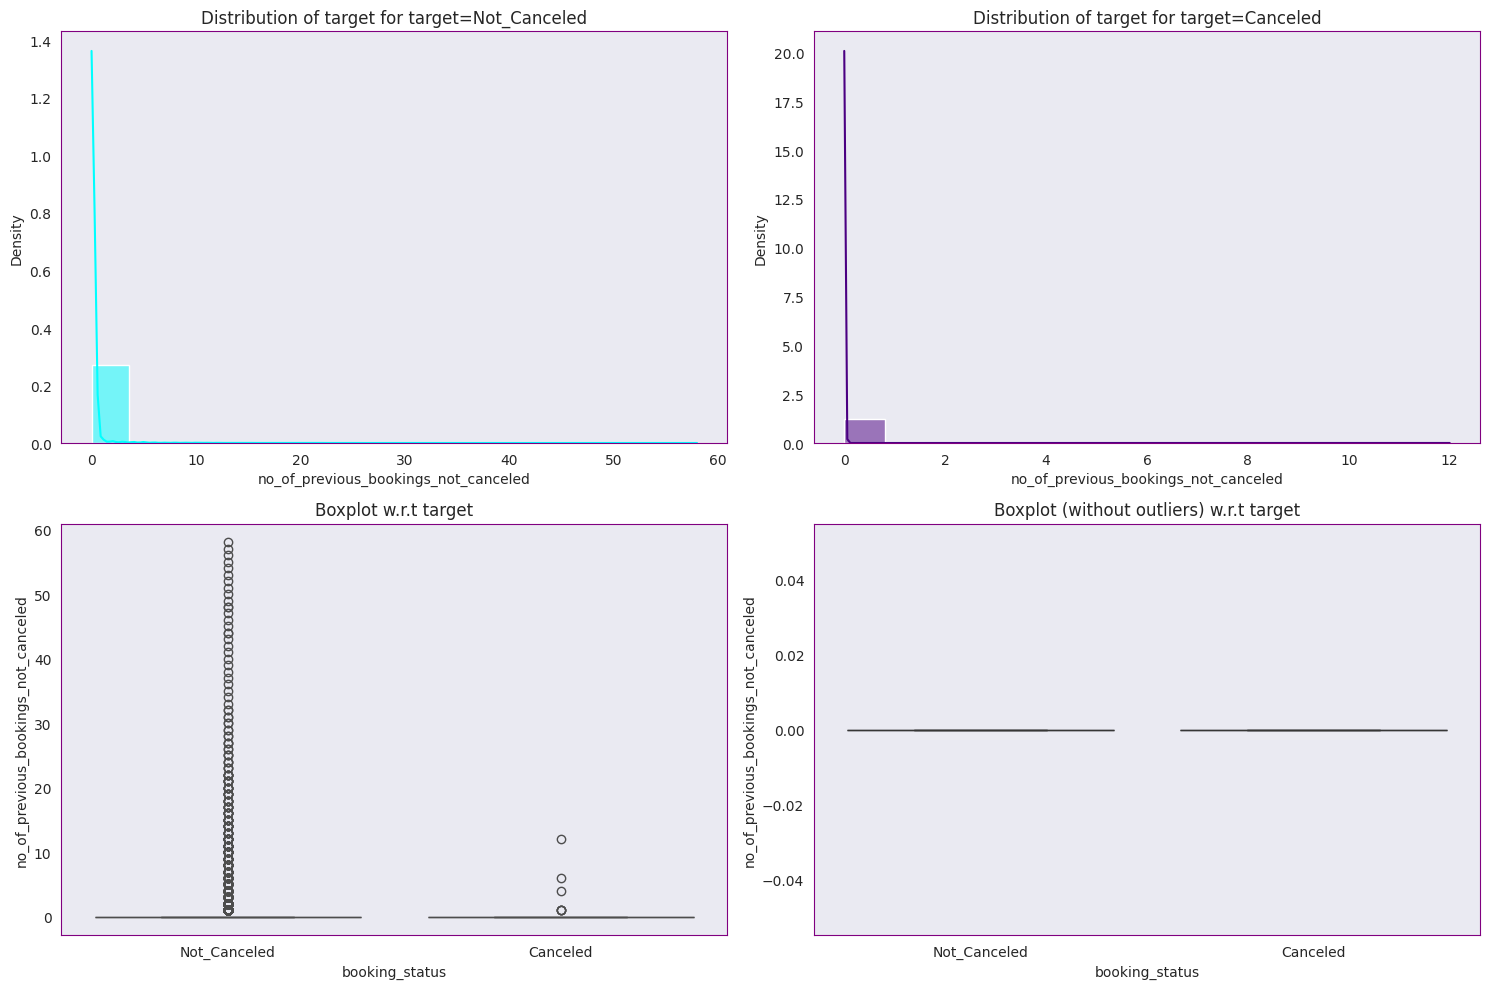

In [80]:
distribution_plot_wrt_target(df2, "no_of_previous_bookings_not_canceled", "booking_status")

All but 0, 1, 12, 4, and 6 had no cancellations. <br>
0 previous bookings not canceled had 33.49% canceled. <br>
1 previous bookings not canceled had 1.75% canceled. <br>
12 previous bookings not canceled had 8.33% canceled. <br>
4 previous bookings not canceled had 1.54% canceled. <br>
6 previous bookings not canceled had 2.78% canceled. <br>


In [81]:
df2.groupby('booking_status').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False).reset_index()

booking_status  avg_price_per_room
0       Canceled              110.59
1   Not_Canceled               99.93

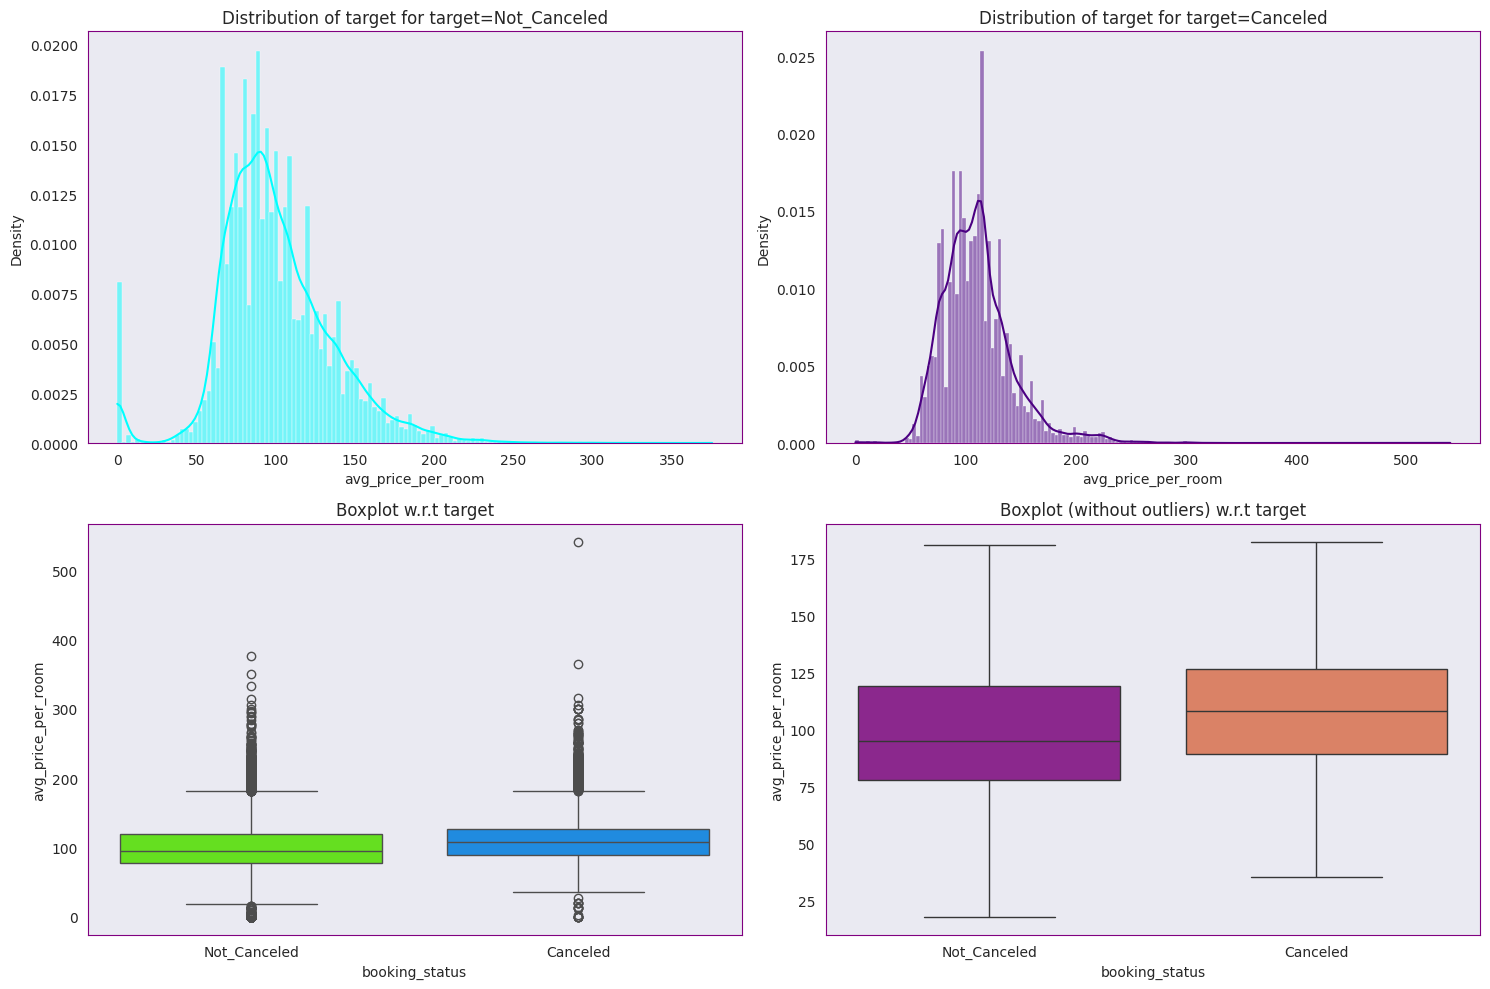

In [82]:
distribution_plot_wrt_target(df2, "avg_price_per_room", "booking_status")

Does not look like there is much correlation between booking status and average price per room. <br>
Difference in average price per room is a difference of ~10.


<Figure size 3000x600 with 0 Axes>

Text(0.5, 0, 'Market Segment')

Text(0, 0.5, 'Guest Count')

Text(0.5, 1.0, 'Cancellation Status by Market Segment')

(0.0, 22000.0)

Segment: Aviation, Status: Not_Canceled, Percentage: 70.4%
Segment: Aviation, Status: Canceled, Percentage: 29.6%
Segment: Complementary, Status: Not_Canceled, Percentage: 100.0%
Segment: Corporate, Status: Not_Canceled, Percentage: 89.1%
Segment: Corporate, Status: Canceled, Percentage: 10.9%
Segment: Offline, Status: Not_Canceled, Percentage: 70.1%
Segment: Offline, Status: Canceled, Percentage: 29.9%
Segment: Online, Status: Not_Canceled, Percentage: 63.5%
Segment: Online, Status: Canceled, Percentage: 36.5%


Text(0, 10, '20.3%')

Text(0, 10, '7375.0')

Text(0, 10, '40.6%')

Text(0, 10, '14739.0')

Text(0, 10, '5.0%')

Text(0, 10, '1797.0')

Text(0, 10, '0.2%')

Text(0, 10, '88.0')

Text(0, 10, '1.1%')

Text(0, 10, '391.0')

Text(0, 10, '8.7%')

Text(0, 10, '3153.0')

Text(0, 10, '23.4%')

Text(0, 10, '8475.0')

Text(0, 10, '0.6%')

Text(0, 10, '220.0')

Text(0, 10, '0.1%')

Text(0, 10, '37.0')

Text(0, 10, '0.0%')

Text(0, 10, '0')

Text(0, 10, '0.0%')

Text(0, 10, '0')

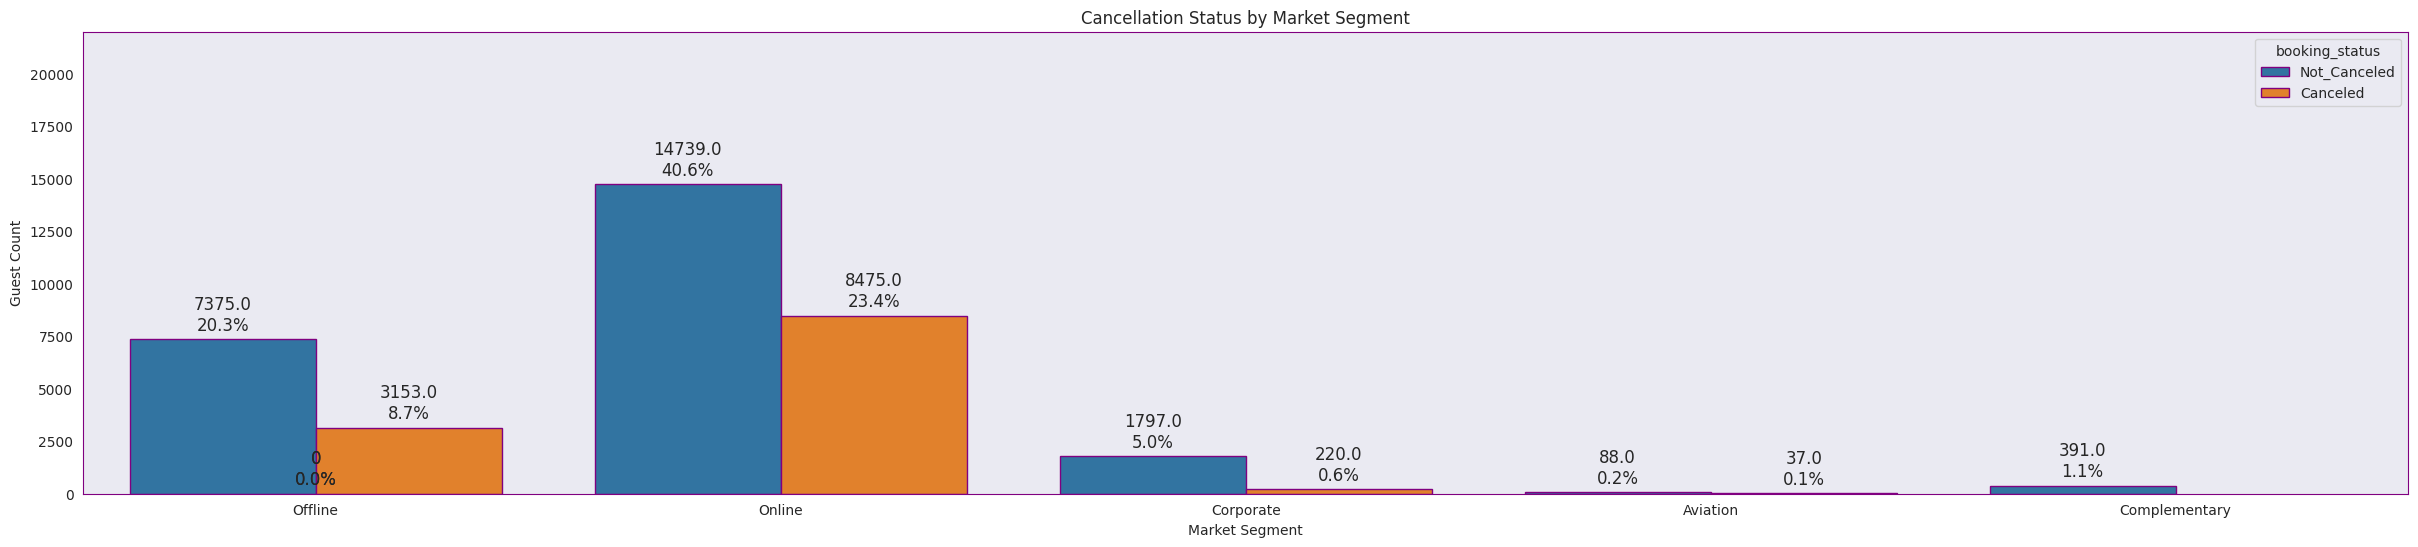

In [83]:
plt.figure(figsize=(30, 6))
ax = sns.countplot(x='market_segment_type', data=df2, hue='booking_status', edgecolor='purple')
plt.xlabel('Market Segment')
plt.ylabel('Guest Count')
plt.title('Cancellation Status by Market Segment')
plt.ylim(0, 22000)

# Group by market segment
grouped_df = df2.groupby('market_segment_type')['booking_status'].value_counts()

# Calculate total bookings per segment
total_counts = df2.groupby('market_segment_type')['booking_status'].count()

# Calculate percentage for each booking status
for segment, status in grouped_df.index:
    count = grouped_df.loc[segment, status]
    total = total_counts.loc[segment]
    percentage = (count / total) * 100
    print(f"Segment: {segment}, Status: {status}, Percentage: {percentage:.1f}%")

# Annotate the bars (count and percentage)
for p in ax.patches:
  cnt = p.get_height()
  prc = "{:.1f}%".format(100.0 * p.get_height() / (df2.shape[0] )) # percentage
  xx = p.get_x() + p.get_width() / 2
  yy = p.get_height()
  ax.annotate(f"{prc}", (xx, yy), ha="center", va="center", size=12, xytext=(0, 10), textcoords="offset points") # annotate percentage
  ax.annotate(cnt, (xx, yy + 1000), ha="center", va="center", size=12, xytext=(0, 10), textcoords="offset points")

# Show the plot
plt.show()


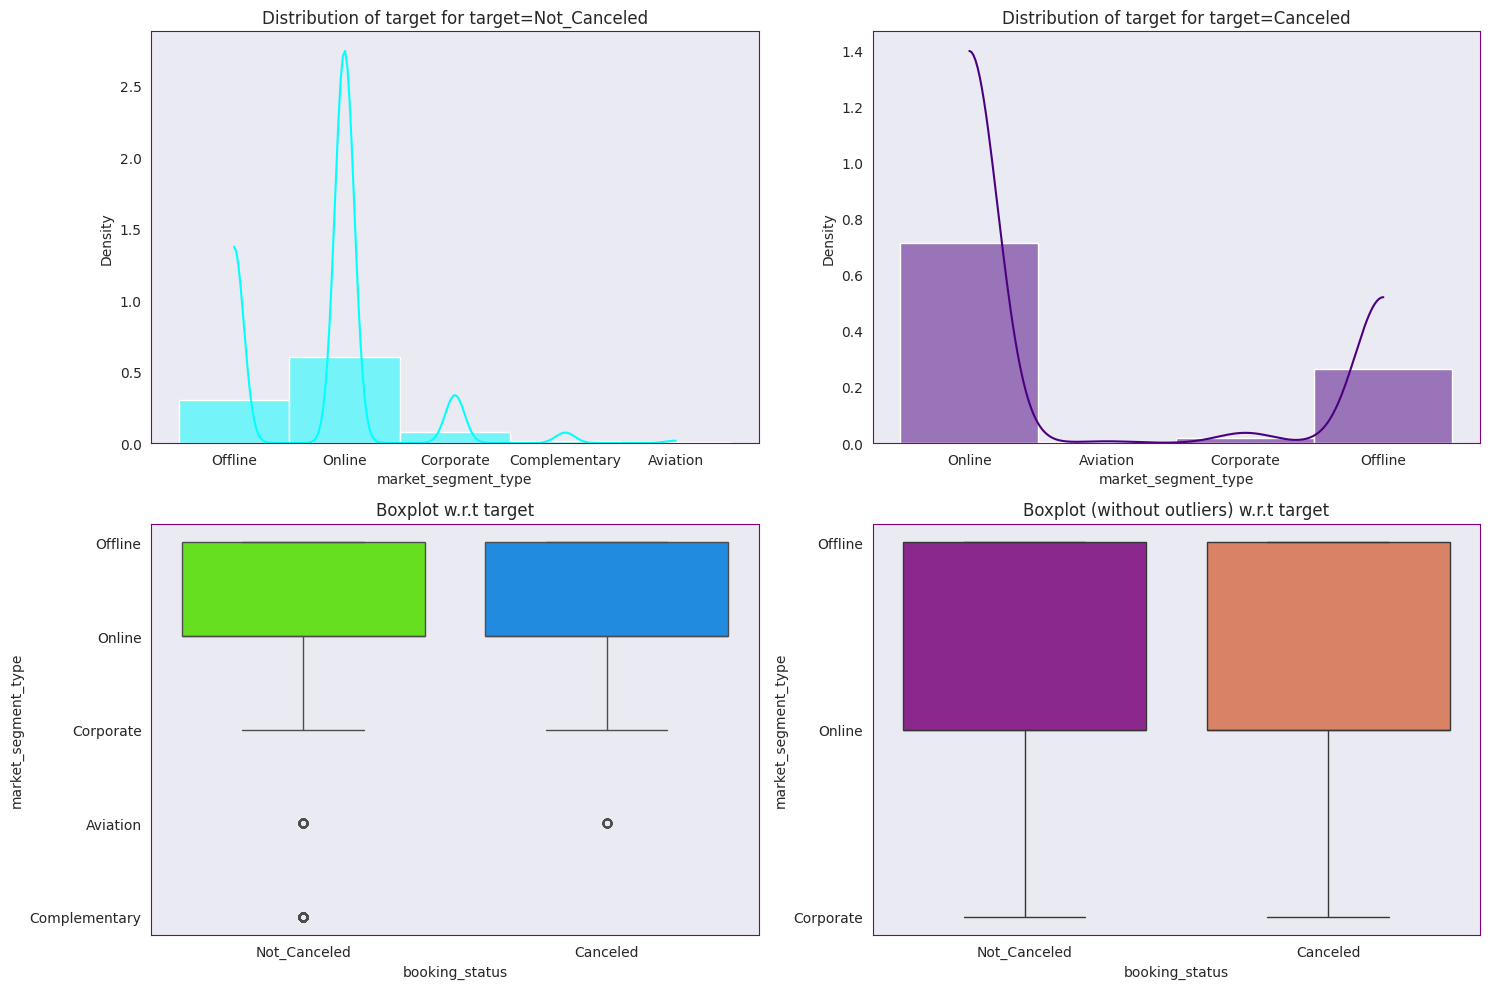

In [84]:
distribution_plot_wrt_target(df2, "market_segment_type", "booking_status")

Online bookings account for 64% of all bookings. Of those 63% of the bookings are not canceled, whereas 37% are canceled.<br>
Offline bookings account for 29% of all bookings. Of those 70% of the bookings are not canceled, whereas 30% are canceled.<br>
Corporate bookings account for 5.6% of all bookings. Of those 89% of the bookings are not canceled, whereas 11% are canceled.<br>
Complementary bookings account for 1.1% of all bookings. Of those 100% of the bookings are not canceled.<br>
Aviation bookings account for 0.3% of all bookings. Of those 70% of the bookings are not canceled, whereas 30% are canceled.<br>

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Does not appear that whether or not it is a weekend or a weekday makes a difference when it comes to cancellations. <br>
As a result converting to total nights and dropping no_of_weekend_nights and no-of week_nights.

In [85]:
# Make a copy in case there is any issues
df3 = df.copy()

In [86]:
df3['total_nights'] = df3['no_of_weekend_nights'] + df3['no_of_week_nights']
df3.drop(labels='no_of_weekend_nights', axis=1, inplace=True)
df3.drop(labels='no_of_week_nights', axis=1, inplace=True)

df3.drop(labels='Booking_ID', axis=1, inplace=True)

In [87]:
df2['total_nights'] = df2['no_of_weekend_nights'] + df2['no_of_week_nights']
df2.drop(labels='no_of_weekend_nights', axis=1, inplace=True)
df2.drop(labels='no_of_week_nights', axis=1, inplace=True)

In [88]:
df2.head()

Booking_ID  no_of_adults  no_of_children type_of_meal_plan  \
0   INN00001             2               0       Meal Plan 1   
1   INN00002             2               0      Not Selected   
2   INN00003             1               0       Meal Plan 1   
3   INN00004             2               0       Meal Plan 1   
4   INN00005             2               0      Not Selected   

   required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                           0        Room_Type 1        224          2017   
1                           0        Room_Type 1          5          2018   
2                           0        Room_Type 1          1          2018   
3                           0        Room_Type 1        211          2018   
4                           0        Room_Type 1         48          2018   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10             2             Offline               0   
1             11             6              Online               0   
2              2            28              Online               0   
3              5            20              Online               0   
4              4            11              Online               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests booking_status  total_nights  
0               65.00                       0   Not_Canceled             3  
1              106.68                       1   Not_Canceled             5  
2               60.00                       0       Canceled             3  
3              100.00                       0       Canceled             2  
4               94.50                       0       Canceled             2

Booking_Id is not needed to do any modeling. Will not help with any comparisons.

In [89]:
#drop the column *Booking_ID* from the dataframe
df2.drop(labels='Booking_ID', axis=1, inplace=True)

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   type_of_meal_plan                     36275 non-null  object 
 3   required_car_parking_space            36275 non-null  int64  
 4   room_type_reserved                    36275 non-null  object 
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   market_segment_type                   36275 non-null  object 
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

## EDA

- It is a good idea to explore the data once again after manipulating it.

booking_status  Canceled  Not_Canceled    All
total_nights                                 
All                11885         24390  36275
3                   3586          6466  10052
2                   2899          5573   8472
4                   1941          3952   5893
1                   1466          5138   6604
5                    823          1766   2589
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
16                     5             1      6
19                     5             1      6
17                     4          

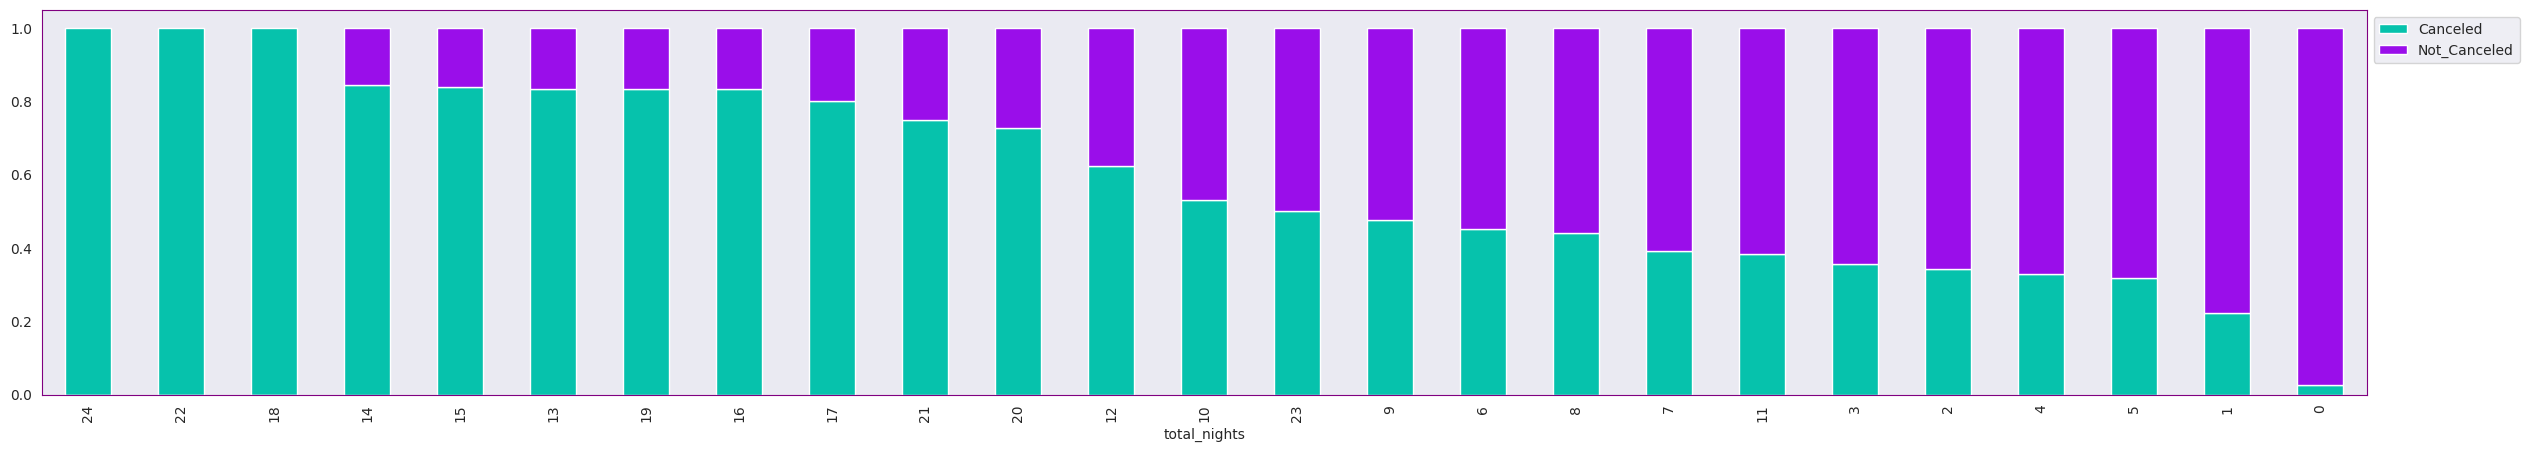

In [91]:
stacked_barplot(df2, "total_nights", "booking_status")

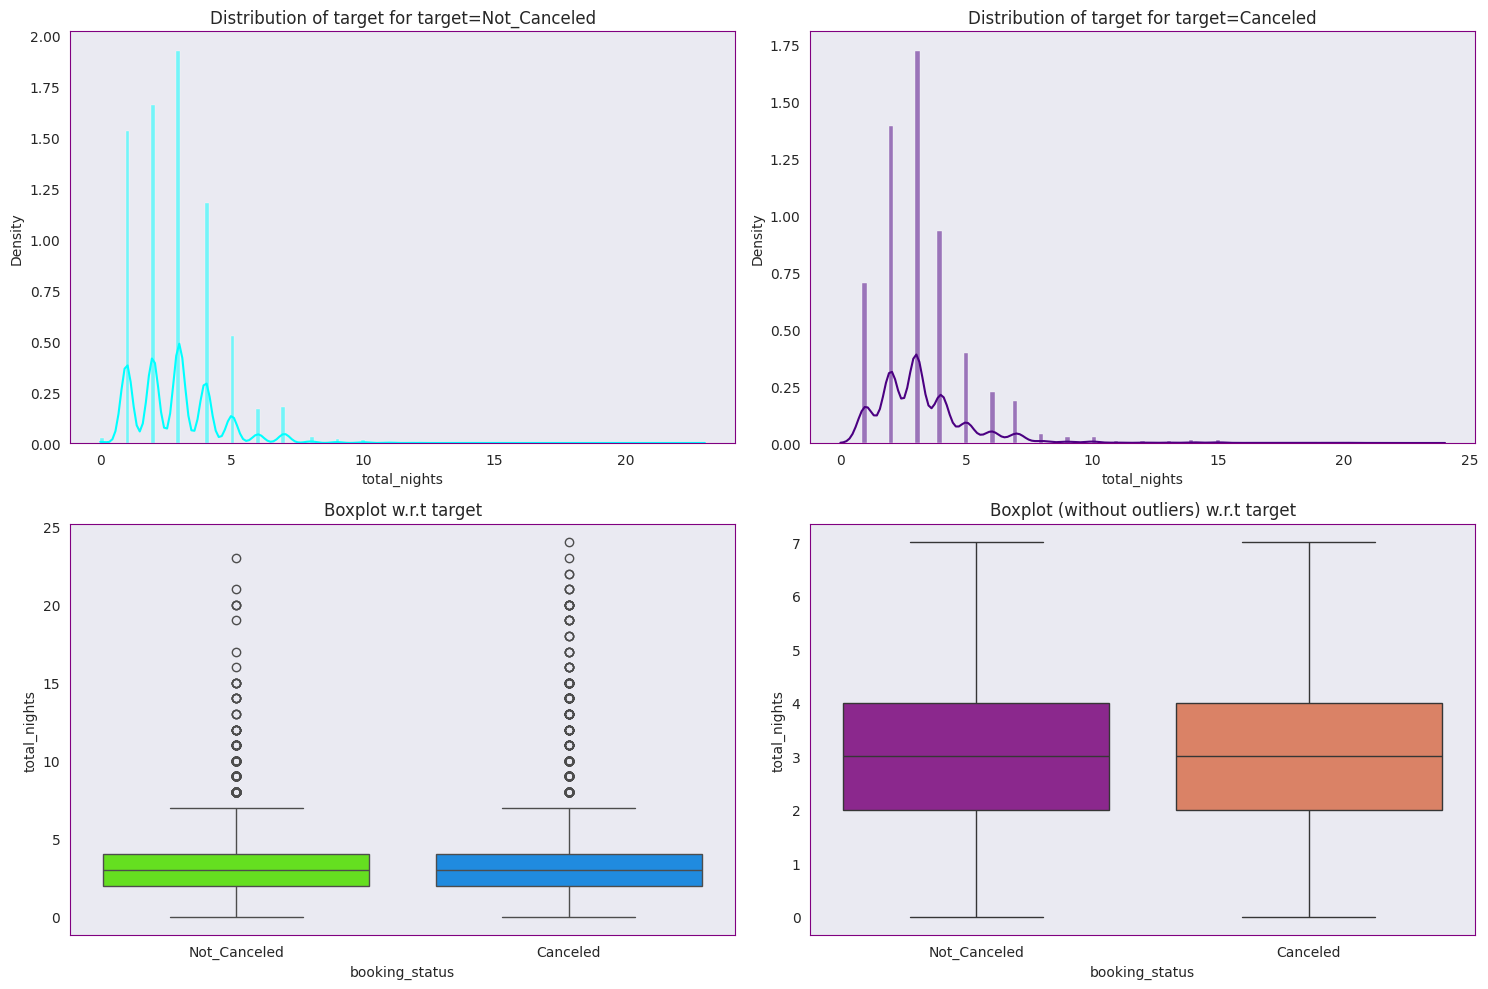

In [92]:
distribution_plot_wrt_target(df2, "total_nights", "booking_status")

As the amount of days increase the cancellation rate decreases.

### Outlier Detection

In [93]:
# functions to treat outliers by flooring and capping


def treat_outliers(df2, col):
    """
    Treats outliers in a variable

    df2: dataframe
    col: dataframe column
    """
    Q1 = df2[col].quantile(0.25)  # 25th quantile
    Q3 = df2[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df2[col] = np.clip(df2[col], Lower_Whisker, Upper_Whisker)

    return df2


def treat_outliers_all(df2, col_list):
    """
    Treat outliers in a list of variables

    df2: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df2 = treat_outliers(df2, c)

    return df2

<Figure size 2000x3000 with 0 Axes>

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf388765570>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf388765cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf388766440>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf388765d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf388766ad0>],
 'means': []}

Text(0.5, 1.0, 'no_of_adults')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf3881699f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf388168be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf38816b190>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf388169780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf38816b490>],
 'means': []}

Text(0.5, 1.0, 'no_of_children')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf38243af20>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf382439cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf382439f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf382439d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf38243aef0>],
 'means': []}

Text(0.5, 1.0, 'required_car_parking_space')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf3814ddcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf3814dfb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf3881bdf90>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf3814de800>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf3814dee60>],
 'means': []}

Text(0.5, 1.0, 'lead_time')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf38887cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf38887c340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf38887c760>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf3822e6350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf3822e72e0>],
 'means': []}

Text(0.5, 1.0, 'arrival_year')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf388a20970>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf388a21f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf3884acca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf388a22c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf388a206a0>],
 'means': []}

Text(0.5, 1.0, 'arrival_month')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf3884249d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf388427f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf388425060>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf388427c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf3884264d0>],
 'means': []}

Text(0.5, 1.0, 'arrival_date')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf382315f30>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf3823168c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf3823168f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf382317640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf3823148e0>],
 'means': []}

Text(0.5, 1.0, 'repeated_guest')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf3813fe8c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf3813ffa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf3813fe6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf3813ffe20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf3813ff550>],
 'means': []}

Text(0.5, 1.0, 'no_of_previous_cancellations')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf38873e350>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf38873d5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf38873f5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf38873e740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf38873c250>],
 'means': []}

Text(0.5, 1.0, 'no_of_previous_bookings_not_canceled')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf381f75c00>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf38218dba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf381f75660>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf38218ca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf38218fc10>],
 'means': []}

Text(0.5, 1.0, 'avg_price_per_room')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf388a71cf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf388a70df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf388a732e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf388a717b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf388a70f70>],
 'means': []}

Text(0.5, 1.0, 'no_of_special_requests')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf388860400>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf388861150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf388860790>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf388862e00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf3818250f0>],
 'means': []}

Text(0.5, 1.0, 'total_nights')

Text(0.5, 1.0, 'Numerical Column Boxplots')

{'whiskers': [<matplotlib.lines.Line2D at 0x7cf3814441f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cf381445450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cf381446470>],
 'medians': [<matplotlib.lines.Line2D at 0x7cf381444910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cf381447ca0>],
 'means': []}

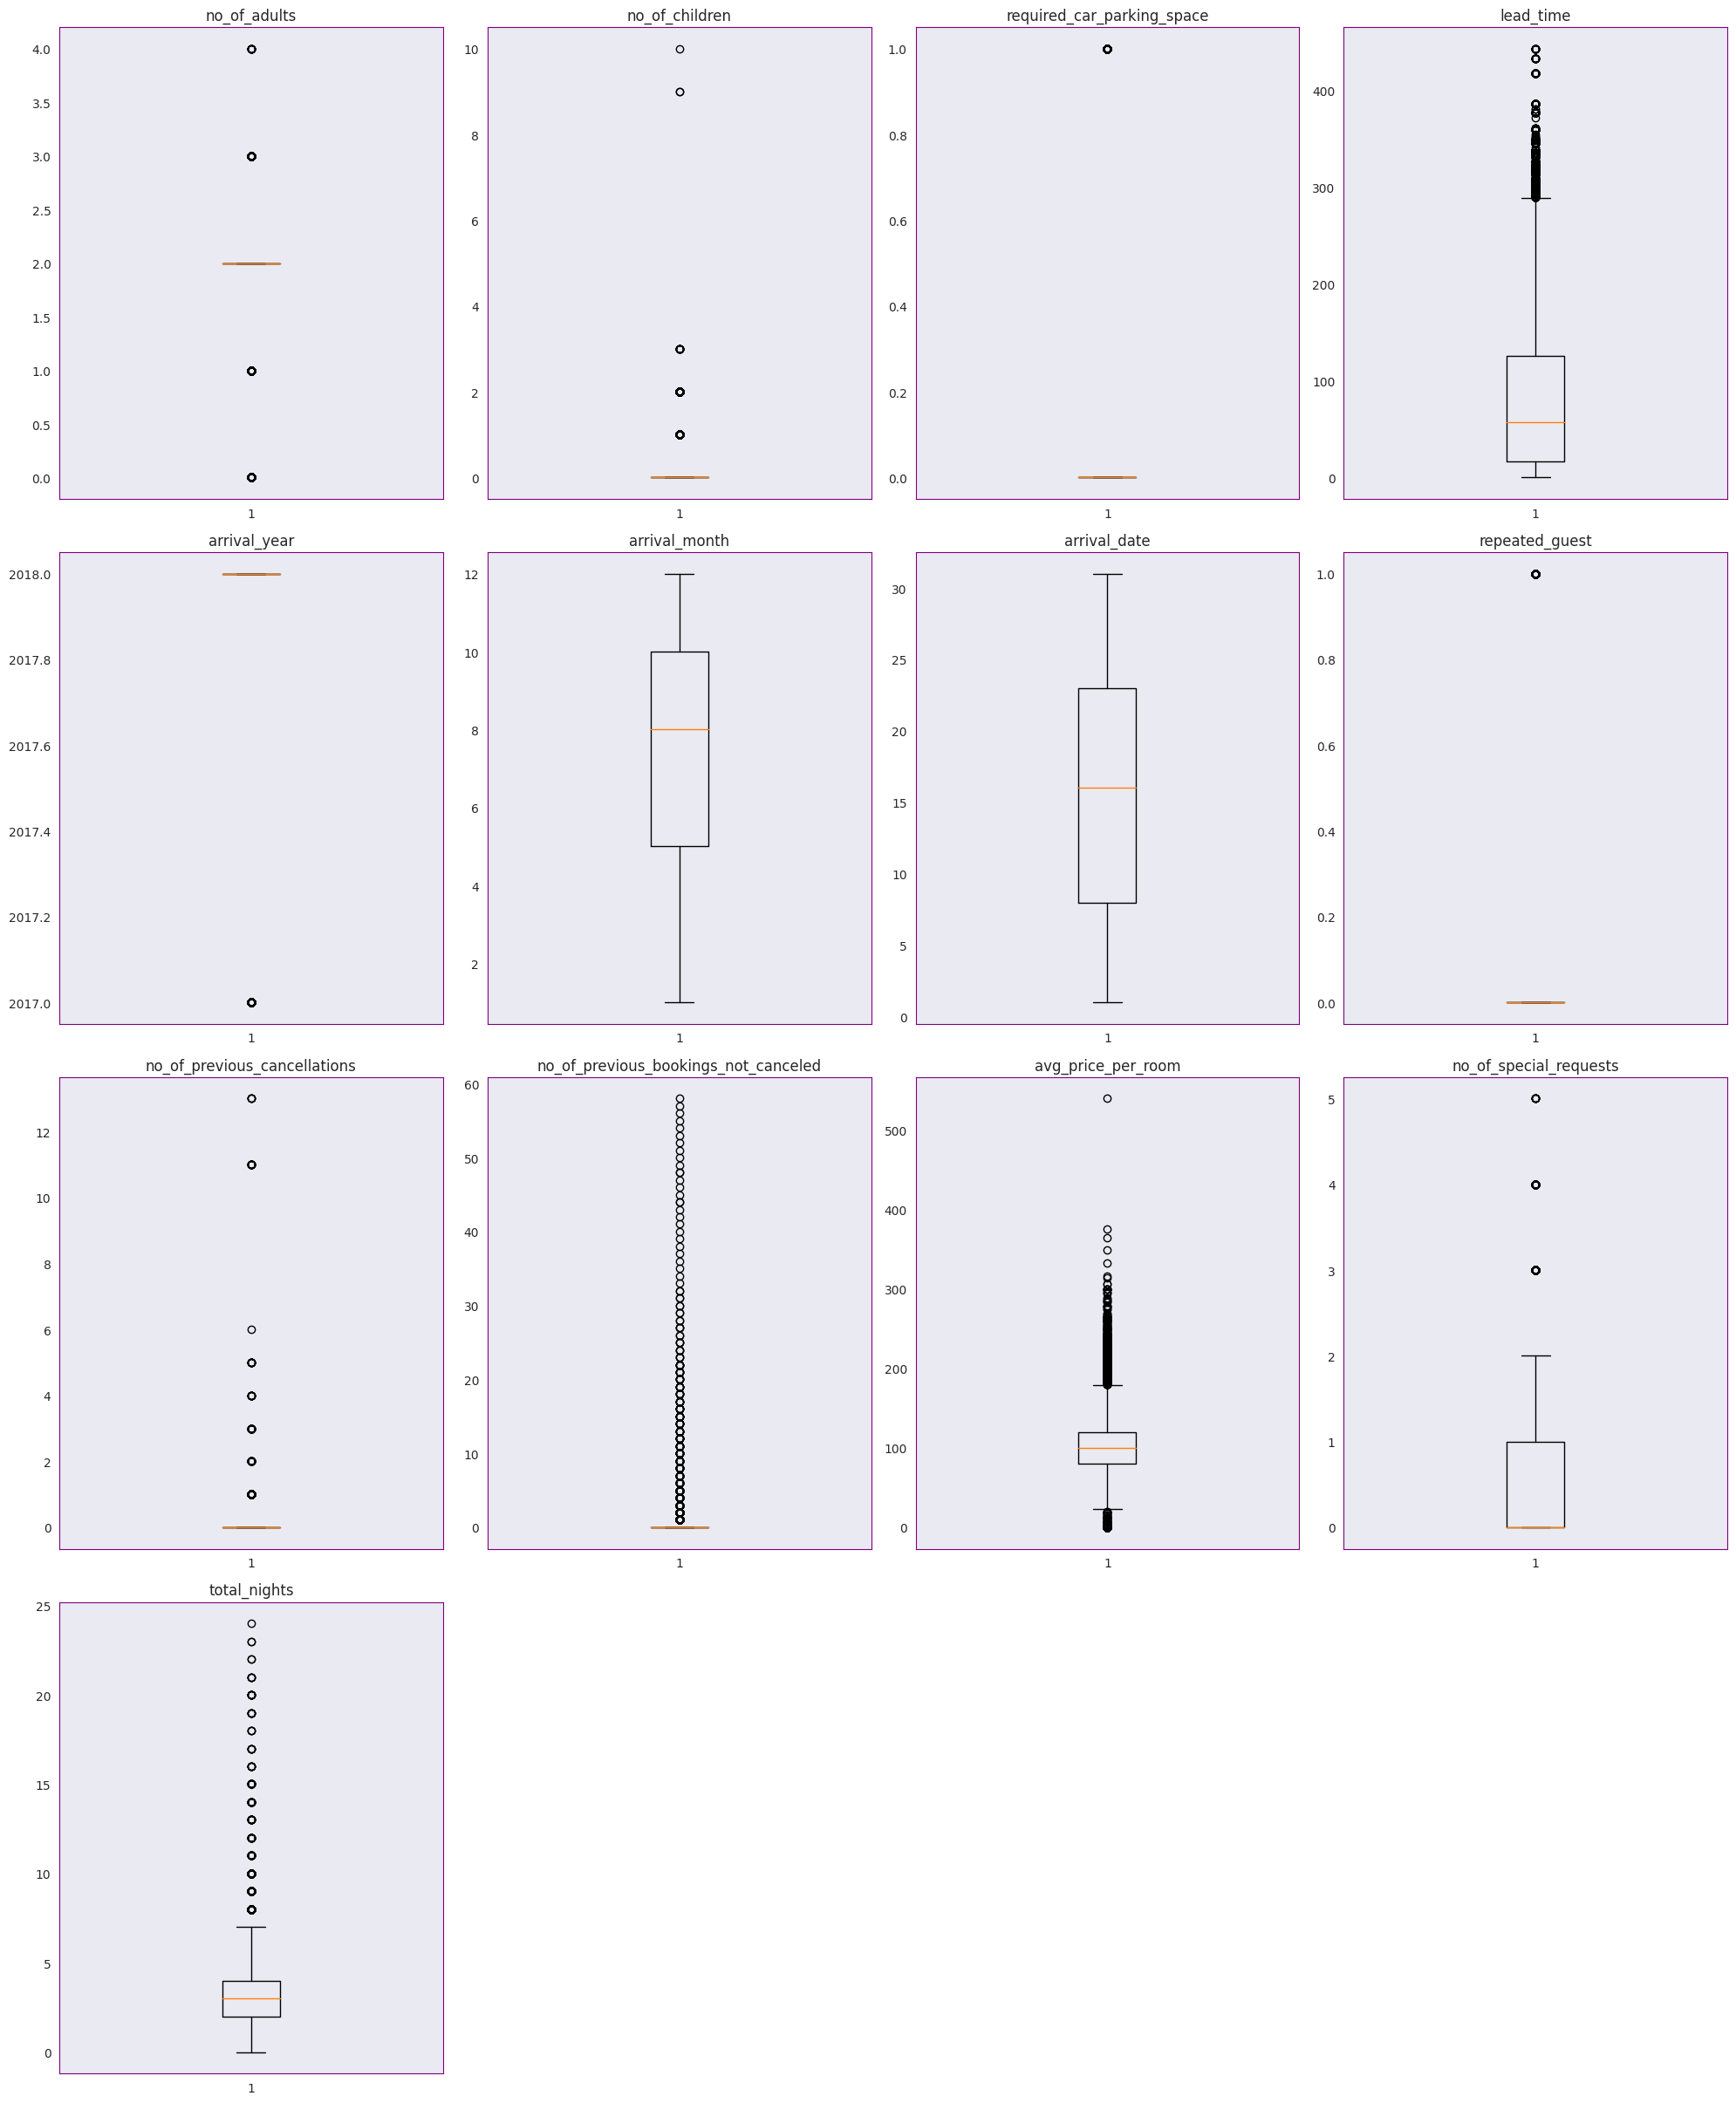

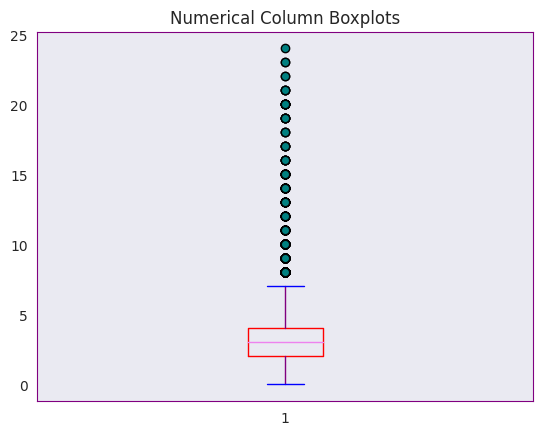

In [94]:
numeric_columns = df2.select_dtypes(include=np.number).columns.to_list()
plt.figure(figsize=(20, 30))
for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

# Update color properties
boxprops = dict(color="red")  # Change the box color to red
capprops = dict(color="blue")  # Change the cap color to blue
whiskerprops = dict(color="purple")  # Change the whisker color to purple
flierprops = dict(markerfacecolor="teal")  # Change the flier marker color to teal
medianprops = dict(color="violet")  # Change the median line color to violet

# Create the final combined graph
fig, ax = plt.subplots()
ax.set_title('Numerical Column Boxplots')
plt.boxplot(df2[variable], whis=1.5, boxprops=boxprops, capprops=capprops,
            whiskerprops=whiskerprops, flierprops=flierprops, medianprops=medianprops)

# Toggle visibility of the entire figure
def toggle_plot(event):
    plt.gcf().set_visible(not plt.gcf().get_visible())
    plt.draw()

cid = plt.gcf().canvas.mpl_connect("key_press_event", toggle_plot)
plt.show()

<Figure size 1500x4500 with 0 Axes>

<Axes: >

(array([1.3900e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.6950e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.6108e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.3170e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6000e+01]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ,
        0.88, 0.96, 1.04, 1.12, 1.2 , 1.28, 1.36, 1.44, 1.52, 1.6 , 1.68,
        1.76, 1.84, 1.92, 2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56,
        2.64, 2.72, 2.8 , 2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44,
        3.52, 3.6 , 3.

Text(0.5, 1.0, 'no_of_adults')

<Axes: >

(array([3.3577e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.6180e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0580e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.9000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9

Text(0.5, 1.0, 'no_of_children')

<Axes: >

(array([35151.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1124.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'required_car_parking_space')

<Axes: >

(array([6.237e+03, 2.989e+03, 2.198e+03, 2.253e+03, 2.126e+03, 1.505e+03,
        1.715e+03, 1.303e+03, 1.427e+03, 1.263e+03, 9.910e+02, 1.240e+03,
        9.040e+02, 9.360e+02, 5.840e+02, 6.470e+02, 6.760e+02, 6.080e+02,
        7.250e+02, 4.240e+02, 5.840e+02, 5.830e+02, 2.970e+02, 4.030e+02,
        3.860e+02, 2.180e+02, 1.730e+02, 2.870e+02, 2.370e+02, 2.940e+02,
        3.050e+02, 3.320e+02, 2.350e+02, 1.560e+02, 2.860e+02, 1.290e+02,
        1.620e+02, 5.700e+01, 2.500e+01, 1.100e+02, 2.200e+01, 1.000e+00,
        6.900e+01, 7.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+01,
        2.000e+01, 2.200e+01]),
 array([  0.  ,   8.86,  17.72,  26.58,  35.44,  44.3 ,  53.16,  62.02,
         70.88,  79.74,  88.6 ,  97.46, 106.32, 115.18, 124.04, 132.9 ,
        141.76, 150.62, 159.48, 168.34, 177.2 , 186.06, 194.92, 203.78,
        212.64, 221.5 , 230.36, 239.22, 248.08, 256.94, 265.8 , 274.66,
        283.52, 292.38, 301.24, 310.1 , 318.96, 327.82, 336.68, 345.54,
        354.4 , 

Text(0.5, 1.0, 'lead_time')

<Axes: >

(array([ 6514.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29761.]),
 array([2017.  , 2017.02, 2017.04, 2017.06, 2017.08, 2017.1 , 2017.12,
        2017.14, 2017.16, 2017.18, 2017.2 , 2017.22, 2017.24, 2017.26,
        2017.28, 2017.3 , 2017.32, 2017.34, 2017.36, 2017.38, 2017.4 ,
        2017.42, 2017.44, 2017.46, 2017.48, 2017.5 , 2017.52, 2017.54,
        2017.56, 2017.58, 2017.6 , 2017.62, 2017.64, 2017.66, 2017.68,
        2017.7 , 2017.72, 2017.74, 2017.76, 2017.78, 2017.8 , 2017.82,
        2017.84, 2017.86, 2017.88, 2017.9 , 2017.92, 2017.94, 2017.96,
        2017.98, 2018.  ]),
 <BarContainer ob

Text(0.5, 1.0, 'arrival_year')

<Axes: >

(array([1014.,    0.,    0.,    0., 1704.,    0.,    0.,    0.,    0.,
        2358.,    0.,    0.,    0., 2736.,    0.,    0.,    0.,    0.,
        2598.,    0.,    0.,    0., 3203.,    0.,    0.,    0.,    0.,
        2920.,    0.,    0.,    0., 3813.,    0.,    0.,    0.,    0.,
        4611.,    0.,    0.,    0., 5317.,    0.,    0.,    0.,    0.,
        2980.,    0.,    0.,    0., 3021.]),
 array([ 1.  ,  1.22,  1.44,  1.66,  1.88,  2.1 ,  2.32,  2.54,  2.76,
         2.98,  3.2 ,  3.42,  3.64,  3.86,  4.08,  4.3 ,  4.52,  4.74,
         4.96,  5.18,  5.4 ,  5.62,  5.84,  6.06,  6.28,  6.5 ,  6.72,
         6.94,  7.16,  7.38,  7.6 ,  7.82,  8.04,  8.26,  8.48,  8.7 ,
         8.92,  9.14,  9.36,  9.58,  9.8 , 10.02, 10.24, 10.46, 10.68,
        10.9 , 11.12, 11.34, 11.56, 11.78, 12.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'arrival_month')

<Axes: >

(array([1133., 1331.,    0., 1098.,    0., 1327., 1154.,    0., 1273.,
           0., 1110., 1198.,    0., 1130.,    0., 1089., 1098.,    0.,
        1204.,    0., 1358., 1242.,    0., 1273.,    0., 1306., 1345.,
           0., 1260.,    0., 1327., 1281.,    0., 1158.,    0., 1023.,
         990.,    0., 1103.,    0., 1146., 1146.,    0., 1059.,    0.,
        1129., 1190.,    0., 1216.,  578.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
         7.6,  8.2,  8.8,  9.4, 10. , 10.6, 11.2, 11.8, 12.4, 13. , 13.6,
        14.2, 14.8, 15.4, 16. , 16.6, 17.2, 17.8, 18.4, 19. , 19.6, 20.2,
        20.8, 21.4, 22. , 22.6, 23.2, 23.8, 24.4, 25. , 25.6, 26.2, 26.8,
        27.4, 28. , 28.6, 29.2, 29.8, 30.4, 31. ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'arrival_date')

<Axes: >

(array([35345.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   930.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'repeated_guest')

<Axes: >

(array([3.5937e+04, 0.0000e+00, 0.0000e+00, 1.9800e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.6000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.5000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

Text(0.5, 1.0, 'no_of_previous_cancellations')

<Axes: >

(array([3.5691e+04, 1.1200e+02, 8.0000e+01, 6.5000e+01, 6.0000e+01,
        3.6000e+01, 4.7000e+01, 1.9000e+01, 1.9000e+01, 1.5000e+01,
        1.2000e+01, 7.0000e+00, 1.7000e+01, 7.0000e+00, 6.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 1.2000e+01, 3.0000e+00,
        3.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.  ,  1.16,  2.32,  3.48,  4.64,  5.8 ,  6.96,  8.12,  9.28,
        10.44, 11.6 , 12.76, 13.92, 15.08, 16.24, 17.4 , 18.56, 19.72,
        20.88, 22.04, 23.2 , 24.36, 25.52, 26.68, 27.84, 29.  , 30.16,
        31.32, 32.48, 33.64, 34.8 , 35.96, 37.12, 38.28, 39.44, 40.6 ,
        41.76, 42.92, 44.08, 45.24

Text(0.5, 1.0, 'no_of_previous_bookings_not_canceled')

<Axes: >

(array([5.980e+02, 2.900e+01, 1.400e+01, 9.700e+01, 3.430e+02, 1.234e+03,
        4.538e+03, 4.626e+03, 5.922e+03, 4.325e+03, 4.538e+03, 2.968e+03,
        2.485e+03, 1.596e+03, 9.830e+02, 6.270e+02, 3.880e+02, 3.070e+02,
        2.270e+02, 1.480e+02, 1.190e+02, 6.600e+01, 2.600e+01, 2.400e+01,
        1.600e+01, 7.000e+00, 6.000e+00, 9.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0. ,  10.8,  21.6,  32.4,  43.2,  54. ,  64.8,  75.6,  86.4,
         97.2, 108. , 118.8, 129.6, 140.4, 151.2, 162. , 172.8, 183.6,
        194.4, 205.2, 216. , 226.8, 237.6, 248.4, 259.2, 270. , 280.8,
        291.6, 302.4, 313.2, 324. , 334.8, 345.6, 356.4, 367.2, 378. ,
        388.8, 399.6, 410.4, 421.2, 432. , 442.8, 453.6, 464.4, 475.2,
        486. , 496.8,

Text(0.5, 1.0, 'avg_price_per_room')

<Axes: >

(array([1.9777e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1373e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.3640e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.7500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <BarContainer object of 50 a

Text(0.5, 1.0, 'no_of_special_requests')

<Axes: >

(array([7.8000e+01, 0.0000e+00, 6.6040e+03, 0.0000e+00, 8.4720e+03,
        0.0000e+00, 1.0052e+04, 0.0000e+00, 5.8930e+03, 0.0000e+00,
        2.5890e+03, 0.0000e+00, 1.0310e+03, 0.0000e+00, 9.7300e+02,
        0.0000e+00, 1.7900e+02, 0.0000e+00, 1.1100e+02, 0.0000e+00,
        1.0900e+02, 0.0000e+00, 3.9000e+01, 0.0000e+00, 0.0000e+00,
        2.4000e+01, 0.0000e+00, 1.8000e+01, 0.0000e+00, 3.2000e+01,
        0.0000e+00, 3.1000e+01, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 6.0000e+00,
        0.0000e+00, 1.1000e+01, 0.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  0.48,  0.96,  1.44,  1.92,  2.4 ,  2.88,  3.36,  3.84,
         4.32,  4.8 ,  5.28,  5.76,  6.24,  6.72,  7.2 ,  7.68,  8.16,
         8.64,  9.12,  9.6 , 10.08, 10.56, 11.04, 11.52, 12.  , 12.48,
        12.96, 13.44, 13.92, 14.4 , 14.88, 15.36, 15.84, 16.32, 16.8 ,
        17.28, 17.76, 18.24, 18.72

Text(0.5, 1.0, 'total_nights')

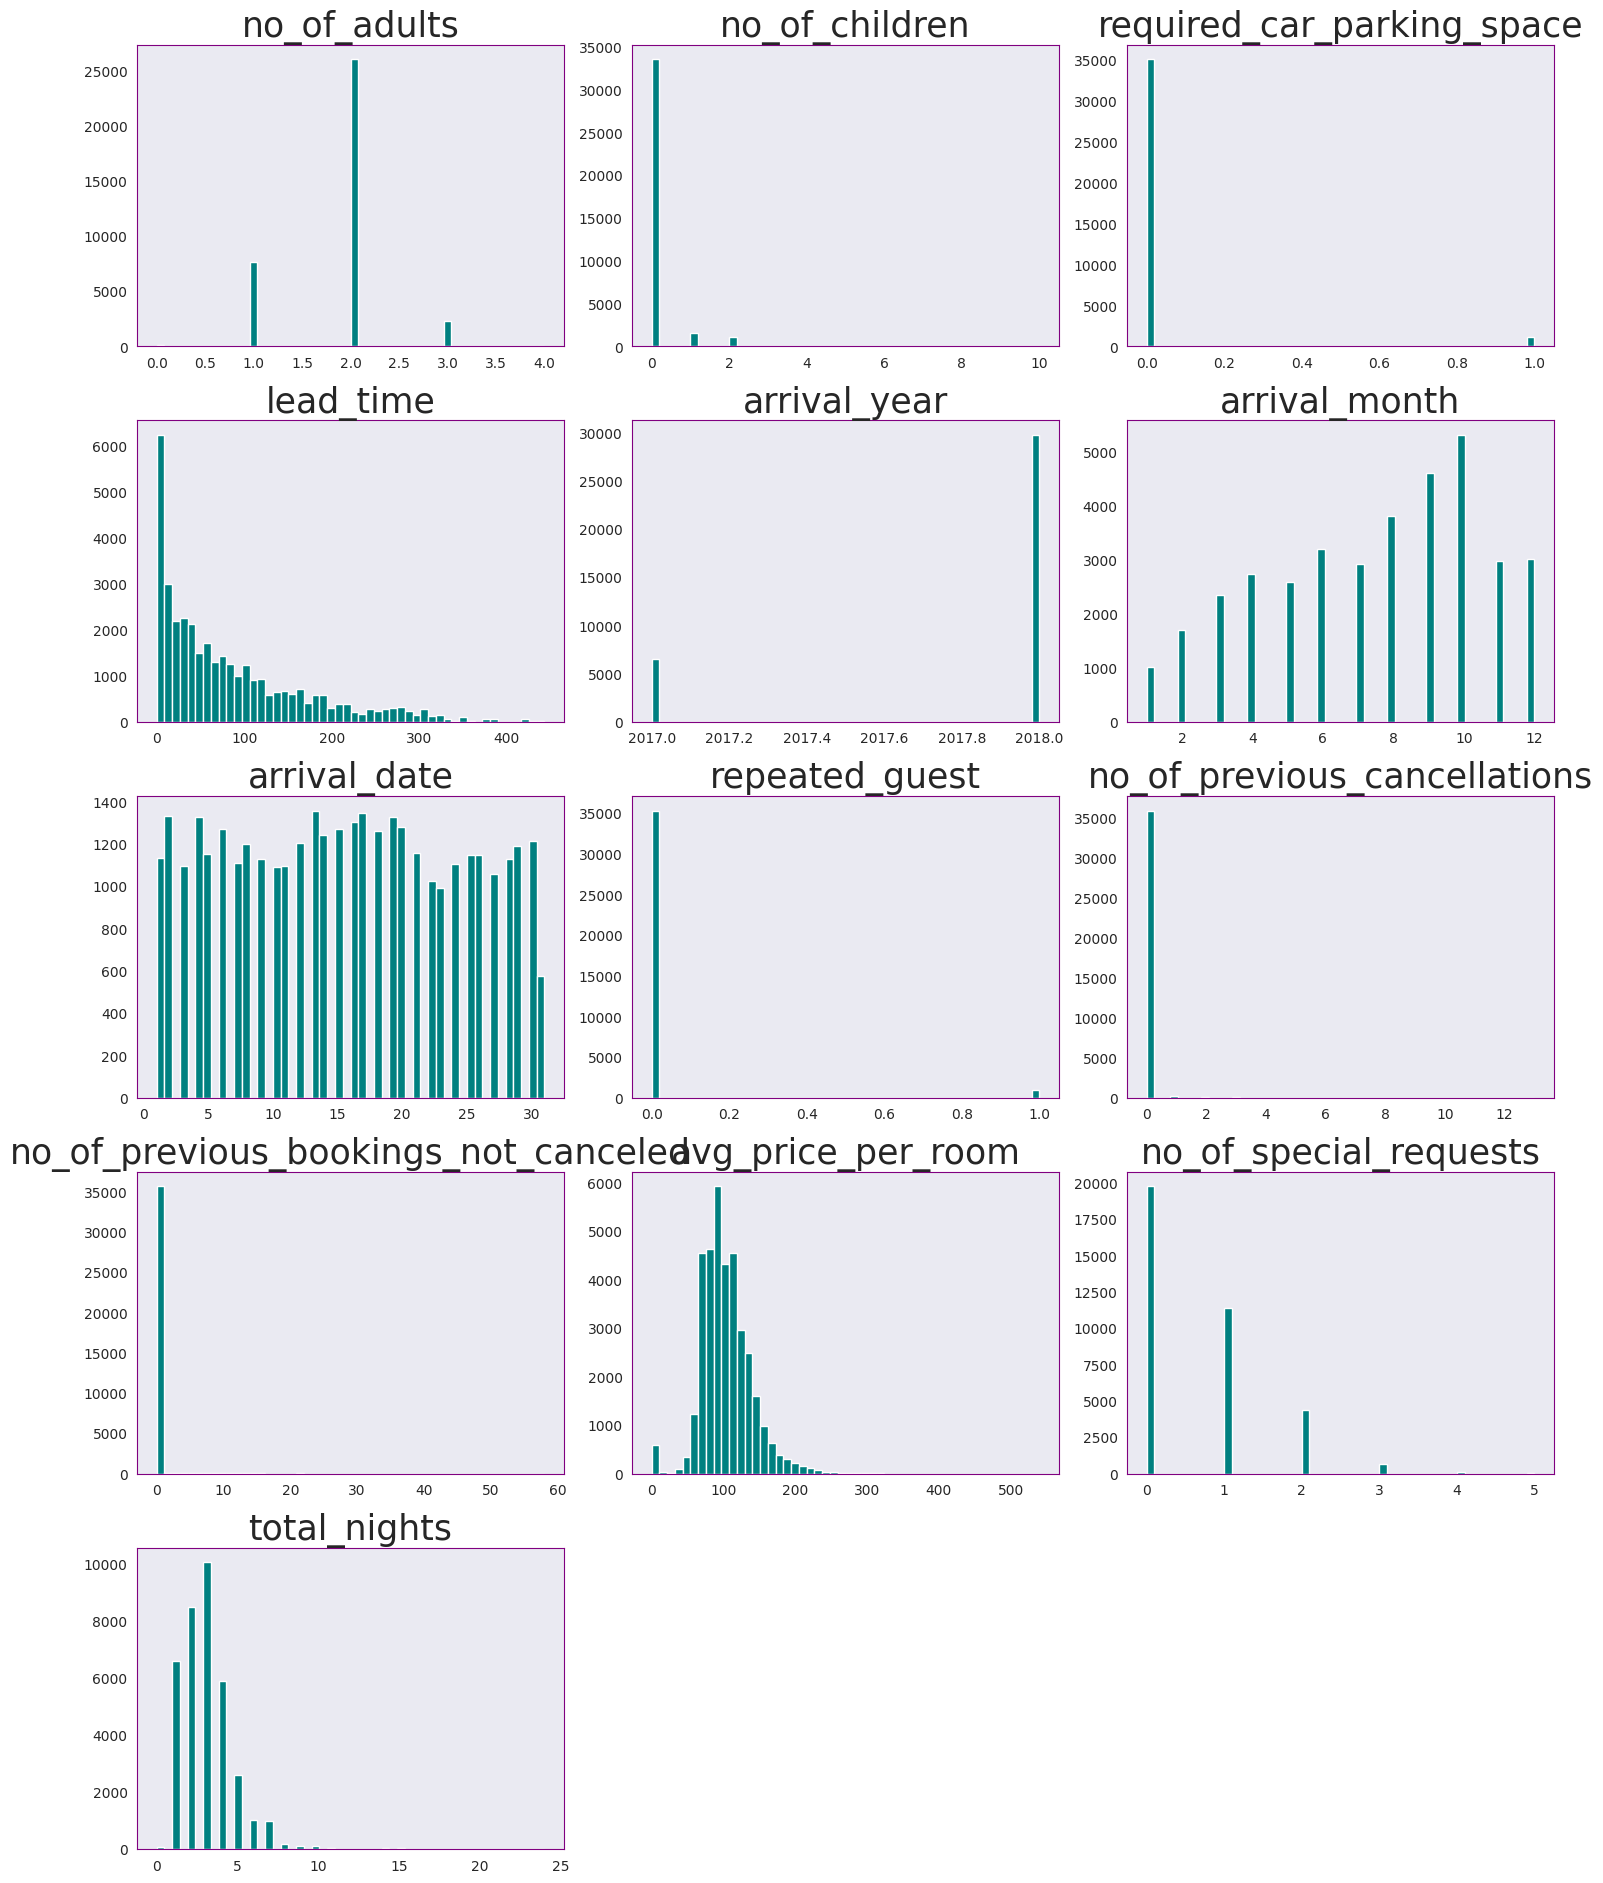

(None,)

In [95]:
# Checking the distrinbution of all numeric columns using histplot.

plt.figure(figsize=(15, 45))

for i in range(len(numeric_columns)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[numeric_columns[i]], bins=50,color = "teal")
    plt.tight_layout()
    plt.title(numeric_columns[i], fontsize=25)

plt.show(),

In [96]:
#calculate interquartile range for average room price, 120 (75%), 80.30 (25%)
IQR = (120-80.30)

In [97]:
#create dataframes of rooms sold for no price (free), rooms sold for a low outlier average room price, and rooms sold for a high outlier average room price
df2_0 = df2[df2.avg_price_per_room == 0]
df2_low = df2[df2.avg_price_per_room < 99.45-1.5*IQR]
df2_high = df2[df2.avg_price_per_room > 99.45+1.5*IQR]

In [98]:
#shows the room price of zero
for colname in df2_0.dtypes[df2.dtypes == 'category'].index:
    print(df2_0[colname].value_counts(dropna=False))
    print(" ")

In [99]:
#shows the room price that is a low outlier
for colname in df2_low.dtypes[df2.dtypes == 'category'].index:
    print(df2_low[colname].value_counts(dropna=False))
    print(" ")

In [100]:
#shows the room price that is a low outlier
for colname in df2_high.dtypes[df2.dtypes == 'category'].index:
    print(df2_high[colname].value_counts(dropna=False))
    print(" ")

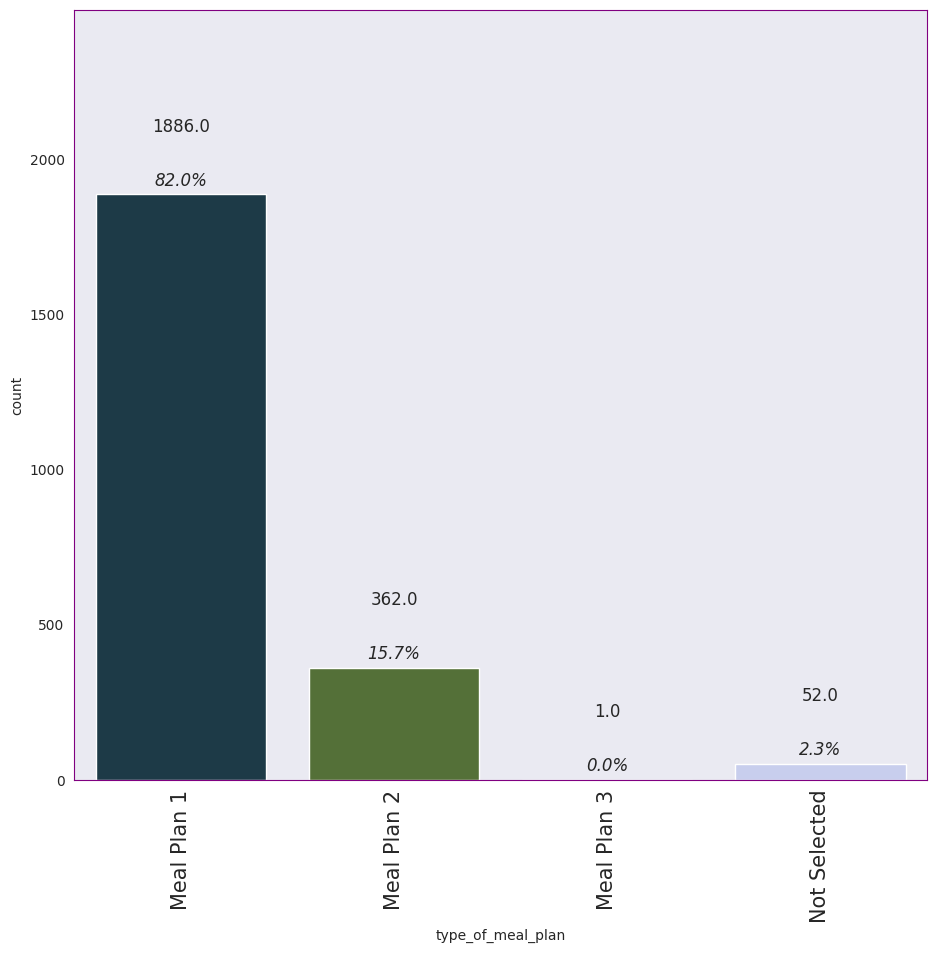

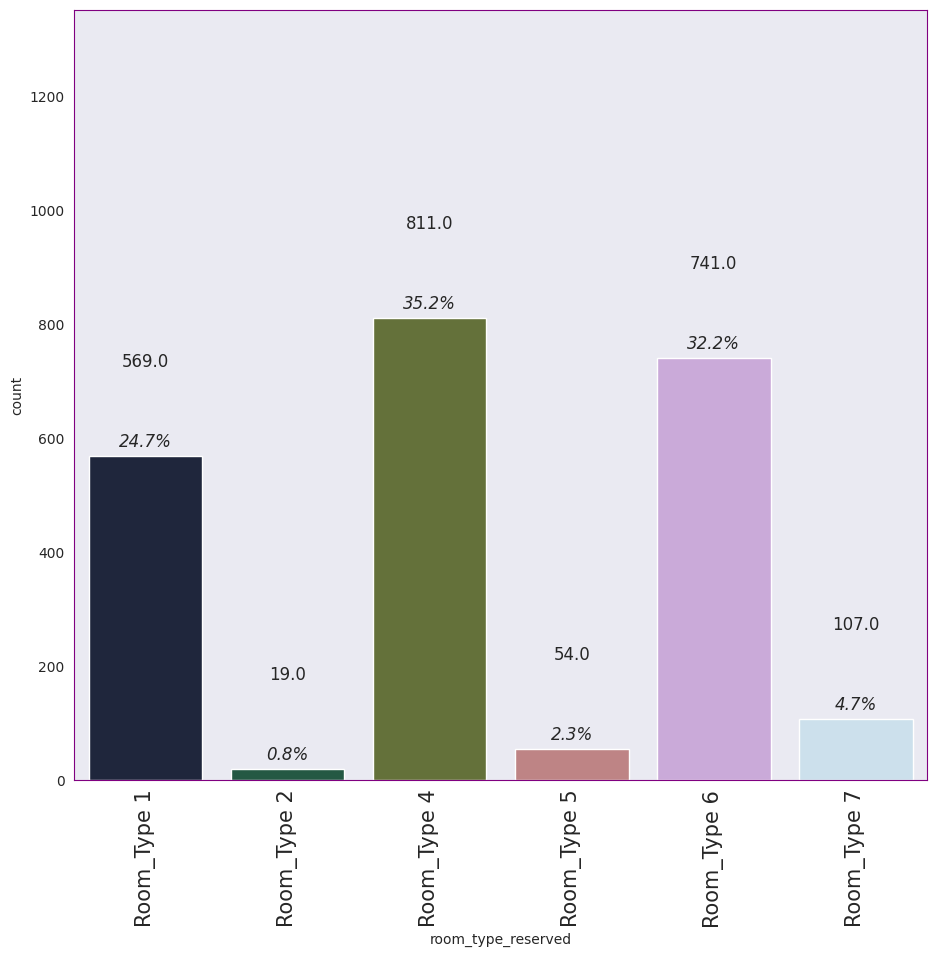

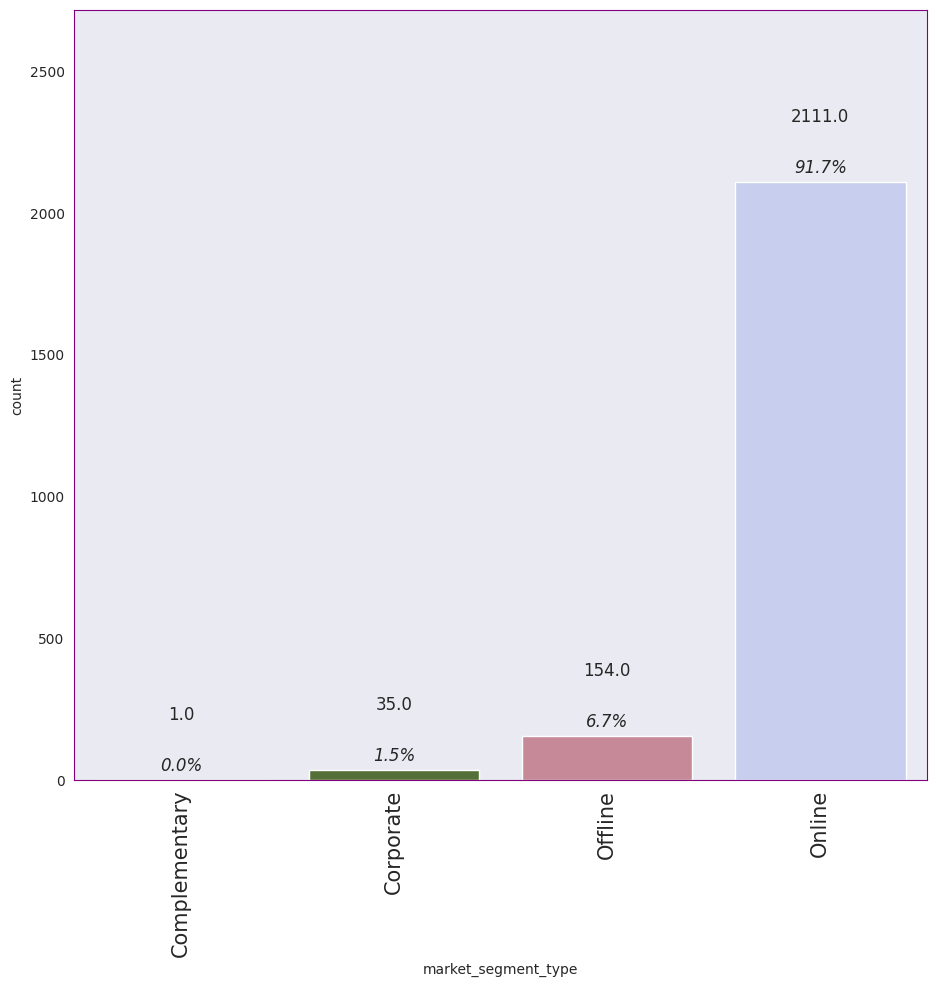

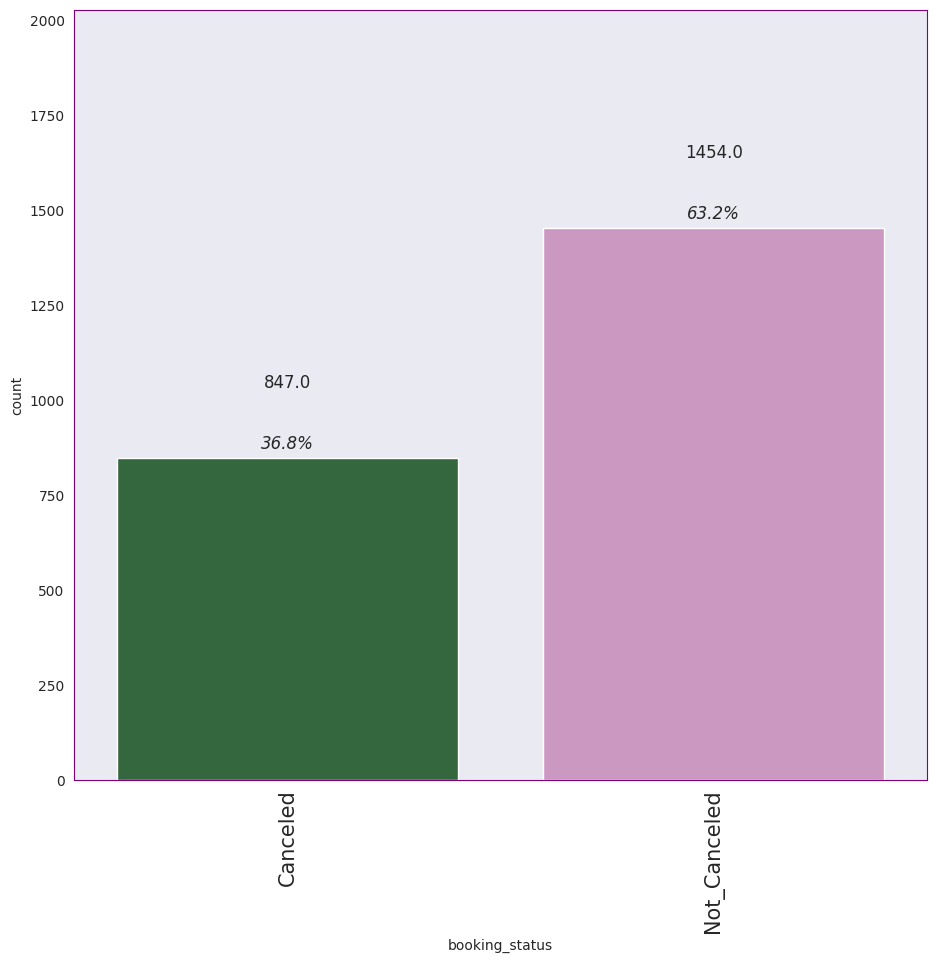

In [101]:
# Labeled barplot for type of meal plan
labeled_barplot(df2_high, "type_of_meal_plan", perc=True, n=10)
print()
labeled_barplot(df2_high, "room_type_reserved", perc=True, n=10)
print()
labeled_barplot(df2_high, "market_segment_type", perc=True, n=10)
print()
labeled_barplot(df2_high, "booking_status", perc=True, n=10)

There are 2301 high outliers. <br>
82% of the high outliers chose meal plan 1. <br>
35.2% of high outliers chose room type 4.  <br>
Most popular room types are room type 4, room type 6 and room type 1.
91.7% of the high outliers reserved online. <br>
63.2% of the high outliers were not canceled, which means 36.8% of the bookings were canceled. <br>
545 rooms were sold at no cost to the guests. Only 1% of those bookings were canceled. <br>
686 rooms were sold at a low outlier amount to the guests. Only 3% of those bookings were canceled.


In [102]:
# compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# compute multiple metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
              },
        index=[0],
    )

    return df_perf

##Linear Regression models

**Encoding Not Canceled as 0 and Canceled as 1, The hotel wants to be able to predict customers that might cancel their booking**

In [103]:
df2["booking_status"] = df2["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [104]:
df2["booking_status"].value_counts()

booking_status
0    24390
1    11885
Name: count, dtype: int64

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   type_of_meal_plan                     36275 non-null  object 
 3   required_car_parking_space            36275 non-null  int64  
 4   room_type_reserved                    36275 non-null  object 
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   market_segment_type                   36275 non-null  object 
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

**Convert Categorical to Numerical Values**

In [106]:
for colname in df2.dtypes[df2.dtypes == 'category'].index:
    print(df2[colname].value_counts(dropna=False))
    print(" ")

**Spliting the Data**

In [107]:
X = df2.drop('booking_status',axis=1)     # Predictor feature columns (8 X m)
Y = df2['booking_status']   # Predicted class (1=True, 0=False) (1 X m)

In [108]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36275 entries, 0 to 36274
Series name: booking_status
Non-Null Count  Dtype
--------------  -----
36275 non-null  int64
dtypes: int64(1)
memory usage: 283.5 KB


In [109]:
# Identify object-type columns
object_cols = X.select_dtypes(include=['object','category']).columns

# Convert object-type columns to dummy variables
X = pd.get_dummies(X, columns=object_cols, dtype=int, drop_first=True)  # Drop the first category to avoid multicollinearity
# Ensure te output is integer (numeric 0 and 1) instead of Boolean


In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   required_car_parking_space            36275 non-null  int64  
 3   lead_time                             36275 non-null  int64  
 4   arrival_year                          36275 non-null  int64  
 5   arrival_month                         36275 non-null  int64  
 6   arrival_date                          36275 non-null  int64  
 7   repeated_guest                        36275 non-null  int64  
 8   no_of_previous_cancellations          36275 non-null  int64  
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 10  avg_price_per_room                    36275 non-null  float64
 11  no_of_special_r

In [111]:
X.head()

no_of_adults  no_of_children  required_car_parking_space  lead_time  \
0             2               0                           0        224   
1             2               0                           0          5   
2             1               0                           0          1   
3             2               0                           0        211   
4             2               0                           0         48   

   arrival_year  arrival_month  arrival_date  repeated_guest  \
0          2017             10             2               0   
1          2018             11             6               0   
2          2018              2            28               0   
3          2018              5            20               0   
4          2018              4            11               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  total_nights  \
0               65.00                       0             3   
1              106.68                       1             5   
2               60.00                       0             3   
3              100.00                       0             2   
4               94.50                       0             2   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               0                               0   
4                               1                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                              0                            1   
1                              0                            0   
2                              0                            0   
3             

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)


In [113]:
# Display the first few rows of X_train
print(X_train.head())

       no_of_adults  no_of_children  required_car_parking_space  lead_time  \
6870              2               0                           0          5   
531               2               1                           0         86   
3394              1               0                           0        105   
23540             1               0                           0         85   
15302             2               0                           0        309   

       arrival_year  arrival_month  arrival_date  repeated_guest  \
6870           2018             12            30               0   
531            2018             12             8               0   
3394           2018              5             5               0   
23540          2018             12             3               0   
15302          2018              5            13               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
6870                              0          

In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   required_car_parking_space            36275 non-null  int64  
 3   lead_time                             36275 non-null  int64  
 4   arrival_year                          36275 non-null  int64  
 5   arrival_month                         36275 non-null  int64  
 6   arrival_date                          36275 non-null  int64  
 7   repeated_guest                        36275 non-null  int64  
 8   no_of_previous_cancellations          36275 non-null  int64  
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 10  avg_price_per_room                    36275 non-null  float64
 11  no_of_special_r

In [115]:
y_train.value_counts()

booking_status
0    17073
1     8319
Name: count, dtype: int64

In [116]:
# checking the shape of the the train and test data
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [117]:
# adding constant to the train data
X_train1 = sm.add_constant(X_train)
# adding constant to the test data
X_test1 = sm.add_constant(X_test)

In [118]:
print("{0:0.2f}% data is in training set".format((len(X_train1)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test1)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [119]:
print("Shape of Training set : ", X_train1.shape)
print()
print("Shape of test set : ", X_test1.shape)
print()
print("Percentage of classes in training set:")
print()
print(y_train.value_counts(normalize=True))
print()
print("Percentage of classes in test set:")
print()
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)

Shape of test set :  (10883, 27)

Percentage of classes in training set:

booking_status
0   0.67
1   0.33
Name: proportion, dtype: float64

Percentage of classes in test set:

booking_status
0   0.67
1   0.33
Name: proportion, dtype: float64


We had seen that around 67.2% of observations belongs to class 0 (Not Canceled) and 32.87% observations belongs to class 1 (Cancellation), and this is preserved in the train and test sets

## Building a Logistic Regression model

In [120]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [121]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=labels, fmt="", cmap='nipy_spectral')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [122]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap='viridis')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [123]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm, annot=labels,fmt='',cmap='viridis')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [124]:
##  Function to calculate f1 score
def get_f1_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return f1_score(target, prediction)

## Model performance evaluation

**A Model can make a wrong predictions as:**<br>
1. Predicting a person booking a room will not cancel, but they do.<br>
2. Predicting a person booking a room will cancel, but they do not.<br>

**Which case is more important?**<br>
 *   Both are important:<br>
  
    *   If we anticipate a guest’s cancellation but they don’t cancel, we’ll reassign their room to another guest. Unfortunately, this means we won’t have a room available for them upon arrival, resulting in significant costs for the hotel (due to offering a complimentary upgraded room). Additionally, we risk losing repeat customers and receiving negative reviews.” <br>

    *   If we anticipate that a person won’t cancel their reservation, but they end up doing so, we not only miss out on the revenue from their booking but also incur costs for remarketing the room. Additionally, we’ll likely need to rebook the room at a discounted rate."

**How to can you reduce these costs i.e maximize True Positives?** <br>
  Maximimize your F1 score <br>
  *   The greater the f1_score the higher the chances of identifying both the classes correctly. <br>
  *   We need to reduce both the False Negatives and False Positives
  *  fi_score is computed as
$$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$
<br>

  * The model_performance_classification_statsmodels function will be used to check the model performance of models. <br>
  * The confusion_matrix_statsmodels function will be used to plot confusion matrix.


### Classification Model Evaluation Metrics Summary:

Summary:
- True Positive (TP): Correctly identifying positive cases: A true positive would be when the test correctly identifies a booking as not being canceled and it is not canceled.
- True Negative (TN): Correctly identifying negative cases: A true negative would be when the test correctly identifies booking as being canceled and it is canceled.
- False Positive (FP): Incorrectly identifying negative cases as positive: a false positive would be when the test incorrectly identifies a booking being not canceled and it is canceled.
- False Negative (FN): Incorrectly identifying positive cases as negative: A false negative would be when the test incorrectly identifies a booking as being not canceled and it is canceled.

1. **Accuracy**: tells us how often the model makes correct predictions out of all predictions. It's like checking how many answers you got right on a test out of all the questions.

2. **Precision**: tells us how many of the predicted positive cases were actually positive. It's like asking, "When the model says something is true, how often is it right?" (TP/TP + FP)

3. **Recall**: tells us how many of the actual positive cases were predicted correctly by the model. It's like asking, "Out of all the true positive cases, how many did the model find?" (TP/TP+FN)

4. **F1 Score**: is a balance between precision and recall. It's useful when you care about both false positives and false negatives. It's like trying to find a sweet spot between "When the model says something is true, how often is it right?" and "Out of all the true positive cases, how many did the model find?"


**Building the Logistic Regression model (with Sklearn library)**

In [125]:
lg = LogisticRegression(solver="liblinear", random_state=1)
model = lg.fit(X_train1, y_train)

**Model performance on training set**

In [126]:
# predicting on training set
y_pred_train = lg.predict(X_train1)

In [127]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Test set performance:
Accuracy: 0.8064744801512287
Precision: 0.7431795457791744
Recall: 0.6254357494891213
F1: 0.679242819843342


**Performance on test set**

In [128]:
# predicting on the test set
y_pred_test = lg.predict(X_test1)

In [129]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.8014334282826426
Precision: 0.733932733932734
Recall: 0.6180594503645541
F1: 0.671030598264576


The training and testing precision rates are very close. Training is 74.3% and testing is 73.4%.<br>
The f1_score on the train and test sets are comparable, 67.9% compared to 67.1%, which indicates that the model is showing generalized results.

**Building the Logistic Regression model (with statsmodels library)**

In [130]:
X_train1 = X_train1.astype(float)  # Convert all columns to float
X_train1.dtypes

const                                   float64
no_of_adults                            float64
no_of_children                          float64
required_car_parking_space              float64
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
total_nights                            float64
type_of_meal_plan_Meal Plan 2           float64
type_of_meal_plan_Meal Plan 3           float64
type_of_meal_plan_Not Selected          float64
room_type_reserved_Room_Type 2          float64
room_type_reserved_Room_Type 3          float64
room_type_reserved_Room_Type 4          float64
room_type_reserved_Room_Type 5          

In [131]:
y_train1 = y_train.astype(float)  # Convert all columns to float
y_train1.dtypes

dtype('float64')

In [132]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# fitting logistic regression model
logit = sm.Logit(y_train, X_train1.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.3316
Time:                        23:59:04   Log-Likelihood:                -10734.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -893.4670    121.193     -7.372      0.000   -1131.002    -655.932
no_of_adults                             0.0383      

There are 25392 observations. <br>
There are 5 P>|z| greater than 0.05. These could be considered significant. <br>
Market Segment complementarty has a -18.9188 coeefficient and type_of_meal_plan_3 os 12.90.

##Model Performance Testing

In [133]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision   F1
0      0.81    0.63       0.74 0.68

## Checking Multicollinearity

*   In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in
the data.

*  **VIF standards:**
        *   If VIF is between 1 and 5, then there is low multicollinearity.
        *   If VIF is between 5 and 10, we say there is moderate multicollinearity.
        *   If VIF is exceeding 10, it shows signs of high multicollinearity.




In [134]:
# defining a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [135]:
checking_vif(X_train1).sort_values(by='VIF', ascending=False)

feature         VIF
0                                  const 39547263.42
26            market_segment_type_Online       69.47
25           market_segment_type_Offline       62.51
24         market_segment_type_Corporate       16.63
23     market_segment_type_Complementary        4.35
11                    avg_price_per_room        2.03
2                         no_of_children        2.01
21        room_type_reserved_Room_Type 6        1.99
8                         repeated_guest        1.75
10  no_of_previous_bookings_not_canceled        1.57
5                           arrival_year        1.43
4                              lead_time        1.40
19        room_type_reserved_Room_Type 4        1.36
1                           no_of_adults        1.34
9           no_of_previous_cancellations        1.32
16        type_of_meal_plan_Not Selected        1.28
6                          arrival_month        1.28
14         type_of_meal_plan_Meal Plan 2        1.26
12                no_of_special_requests        1.25
17        room_type_reserved_Room_Type 2        1.09
13                          total_nights        1.09
22        room_type_reserved_Room_Type 7        1.09
3             required_car_parking_space        1.03
20        room_type_reserved_Room_Type 5        1.03
15         type_of_meal_plan_Meal Plan 3        1.01
7                           arrival_date        1.01
18        room_type_reserved_Room_Type 3        1.00

**Observations:**

Some of the market segment dummy variables are showing higher than 5 the rest of the variables are all below 5. <br>
Appears there is no multicollinearity so our assumption is satisfied. <br>
Need to check p-values of predictor variables to check for significance.
Need to check if dropping any variables cause the p-value to change

In [136]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'total_nights', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [137]:
X_train2 = X_train1[selected_features]

In [138]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Fri, 31 May 2024   Pseudo R-squ.:                  0.3306
Time:                        23:59:07   Log-Likelihood:                -10751.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -875.3634    120.780     -7.248      0.000   -1112.088    -638.639
required_car_parking_space        -1.6098      0.137    -11.762      0.

No p-value is greater than 0.05. <br>

**Coefficients**

Positive - lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, total_nights, type_of_meal_plan_Not Selected,type_of_meal_plan_Meal Plan 2 <br>

Negative - required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, room_type_reserved_Room Type 2, room_type_reserved_Room Type 4, room_type_reserved_Room Type 5, room_type_reserved_Room Type 6, room_type_reserved_Room Type 7, market_segment_type_Corporate,market_segment_type_Offline <br>

Positive - means an increase in the variable will lead to an increase in the chance of a booking being canceled. <br>

Negative - means a decrease in the variable will lead to an decrease in the chance of a booking being canceled. <br>

**Coefficients needs to be converted to odds** <br>

In logistic regression, the coefficients represent the logarithm of the odds. To obtain the actual odds, we need to take the exponential of these coefficients. <br>

**odds = exp(b)**<br>

Percent change in odds is **odds=(exp(b)-1)*100** <br>

## Final Model Summary

Since all variables in lg2 have a p-value less than 0.05 we can consider that our final model.

In [139]:
# The purpose of converting the coefficients into a probability (unlike linear regression), it's because the logistic regression model estimates log(odds) as a linear function of the predictor variables.
#Since the coefficients in the logistic regression model represent the change in log(odds), we need to exponentiate them to interpret them in terms of odds.

# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odds": perc_change_odds}, index=X_train2.columns).sort_values(by='Change_odds')

Odds  Change_odds
const                           0.00      -100.00
repeated_guest                  0.05       -95.36
market_segment_type_Offline     0.17       -83.14
required_car_parking_space      0.20       -80.01
no_of_special_requests          0.23       -77.31
room_type_reserved_Room_Type 7  0.27       -73.20
market_segment_type_Corporate   0.41       -59.16
room_type_reserved_Room_Type 6  0.48       -52.18
room_type_reserved_Room_Type 5  0.51       -49.30
room_type_reserved_Room_Type 2  0.69       -31.34
room_type_reserved_Room_Type 4  0.76       -23.78
arrival_month                   0.95        -4.82
lead_time                       1.02         1.59
avg_price_per_room              1.02         1.91
total_nights                    1.07         7.39
type_of_meal_plan_Meal Plan 2   1.19        19.12
type_of_meal_plan_Not Selected  1.23        23.08
no_of_previous_cancellations    1.34        33.62
arrival_year                    1.54        54.11

**Top 5 Coefficients that will cause a negative change:**<br>

1. When all other factors remain constant, being a repeated guest reduces the odds of a booking being canceled by 95.36%.<br>
2. When all other factors remain constant, being a guest that books a room offline reduces the odds of a booking being canceled by 83.14%. <br>
3. When all other factors remain constant, being a guest that requires a car parking space reduces the odds of a booking being canceled by 80.01%. <br>
4. When all other factors remain constant, being a guest that has a special request reduces the odds of a booking being canceled by 77.31%. <br>
5. When all other factors remain constant, being a guest that reserves room type 7 reduces the odds of a booking being canceled by 73.20%. <br>

**Top 5 Coefficients that will cause a positive change:** <br>
1. When all other factors remain constant, the arrival year increases the odds of a booking being canceled by 54.11%.<br>
2. When all other factors remain constant, the number of previous cancellations increases the odds of a booking being canceled by 33.62%. <br>
3. When all other factors remain constant, not selecting a meal plan increases the odds of a booking being canceled by 23.08%. <br>
4. When all other factors remain constant, selecting meal plan 2 increases the odds of a booking being canceled by 19.12%. <br>
5. When all other factors remain constant, the total nights booked increases the odds of a booking being canceled by 7.39%.


##Logistic Regression model performance evaluation

**Model Performance on final training set**

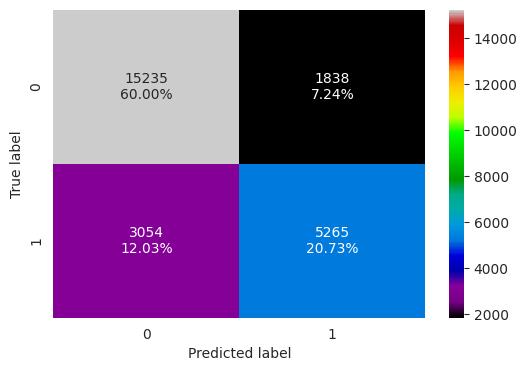

In [140]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

True Positive - 15235 <br>
True Negative - 5265  <br>
False Positive - 1838 <br>
False Negative - 1838 <br>

In [141]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train2, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0      0.81    0.63       0.74 0.68

This is showing a F1 score of 0.68. <br>

In [142]:
X_test2 = X_test1[list(X_train2.columns)]

In [143]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                            39098190.79
required_car_parking_space              1.03
lead_time                               1.36
arrival_year                            1.42
arrival_month                           1.26
repeated_guest                          1.49
no_of_previous_cancellations            1.18
avg_price_per_room                      1.62
no_of_special_requests                  1.22
total_nights                            1.08
type_of_meal_plan_Meal Plan 2           1.25
type_of_meal_plan_Not Selected          1.24
room_type_reserved_Room_Type 2          1.03
room_type_reserved_Room_Type 4          1.27
room_type_reserved_Room_Type 5          1.02
room_type_reserved_Room_Type 6          1.25
room_type_reserved_Room_Type 7          1.03
market_segment_type_Corporate           1.41
market_segment_type_Offline             1.56
dtype: float64



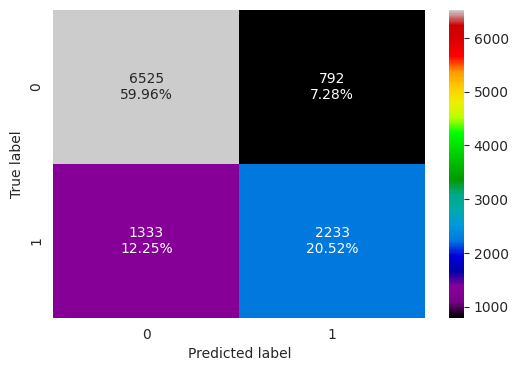

In [144]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [145]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision   F1
0      0.80    0.63       0.74 0.68

- The training is showing and F1 score of 0.68 and the testing is showing an F1 score of 0.68 <br>
- As the train and test performances are comparable, the model is not overfitting. <br>
- Moving forward we will try to improve the performance of the model since 0.68 is not very high.

##Model Performance Improvement



*   Will try to improve the F1 score by changing the model threshold
*   Check the ROC curve, compute the area under the ROC curve (ROC-AUC). This will help find the optimal threshold needed.
*   Will analyze the Precision-Recall curve to strike the right balance between precision and recall, given that the F1 score serves as a <br>
    harmonic balance between these two metrics



### ROC Curve and ROC-AUC

**ROC Curve:**
- What It Is: The ROC curve is a graphical representation that shows the performance of a binary classification model across different threshold settings.

- Simple Explanation: Imagine you have a model that predicts whether an email is spam or not. The ROC curve tells you how well your model can distinguish between spam and non-spam emails as you adjust the threshold for classifying an email as spam.

- X-axis: False Positive Rate (FPR) - It represents the ratio of false positive predictions (predicting spam when it's not) to all actual negative instances.

- Y-axis: True Positive Rate (TPR) - It represents the ratio of true positive predictions (correctly predicting spam) to all actual positive instances.

- Plotting Points: The ROC curve is generated by plotting TPR against FPR for various threshold settings.

- Interpretation: ROC-AUC ranges from 0 to 1, where 1 represents a perfect model (all true positives, no false positives), and 0.5 represents a random model (no discrimination between classes).

- Comparing Models: You can use ROC-AUC to compare different models. The model with a higher ROC-AUC value is generally considered to be better at distinguishing between the classes.

**ROC-AUC (Training(**

<Figure size 700x500 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

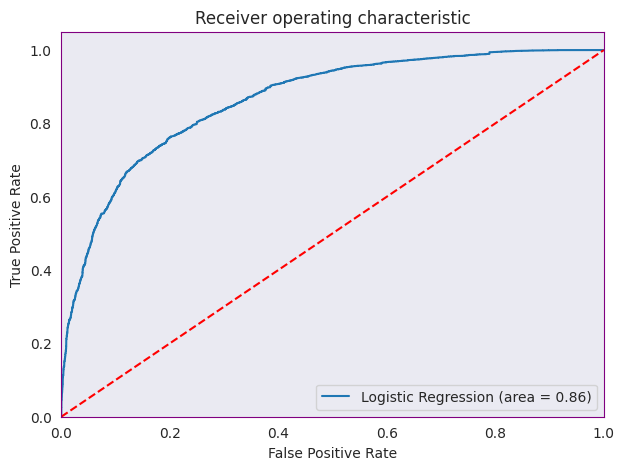

In [146]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Based on the logistic regression area of 0.86 it appears the model is performing well.

### Optimal threshold using AUC-ROC curve

In [147]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.34049961761164615


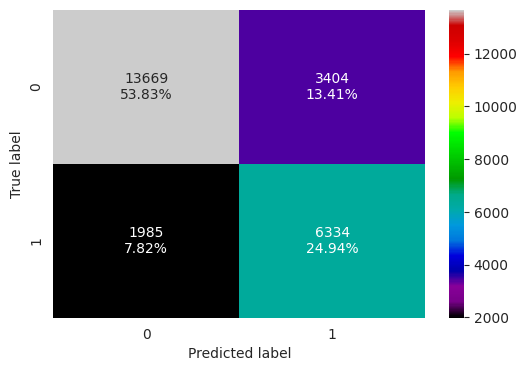

In [148]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [149]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision   F1
0      0.79    0.76       0.65 0.70

Accuracy - decreased by 0.01 <br>
Recall -   increased by 0.13 <br>
Precision - decreased by 0.09 <br>
F1 score - increased by .02 <br>

Since the recall and F1 score increased this model with this threshold is more useful for INN Hotel's intended use case.



**Model performance on test set**

<Figure size 700x500 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

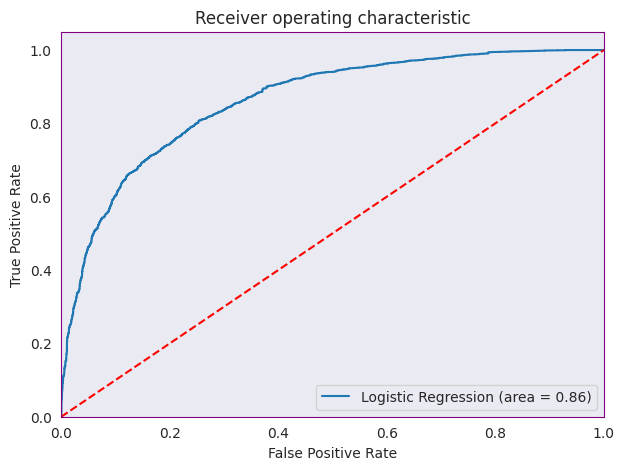

In [150]:
logit_roc_auc_test = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

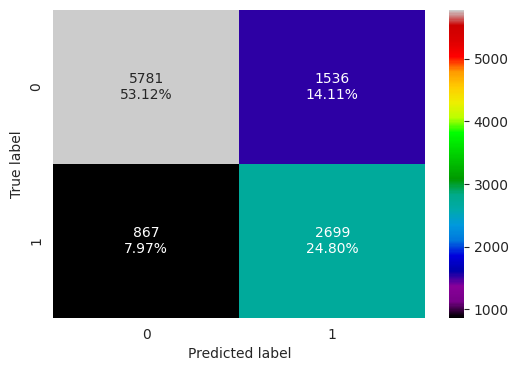

In [151]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [152]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision   F1
0      0.78    0.76       0.64 0.69

The test performs almost the same as the training. <br>
Accuracy - same <br>
Recall - same <br>
Precision - decrease 0.01 <br>
F1 score - decrease of 0.01

**Optimal threshold using the Precision-Recall curve**

<Figure size 1000x700 with 0 Axes>

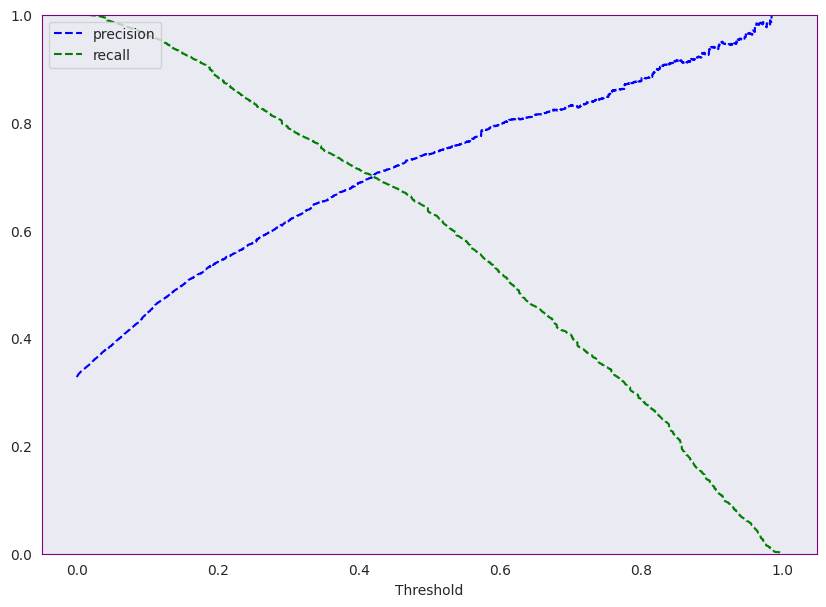

In [153]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of ~ 0.42, we get balanced recall and precision.

In [154]:
print(tre)

[4.36283975e-07 1.76602177e-06 3.18008213e-06 ... 9.95935711e-01
 9.97452510e-01 9.98159837e-01]


In [155]:
# setting the threshold
optimal_threshold_curve = 0.42

**Model Performance on Training Set**

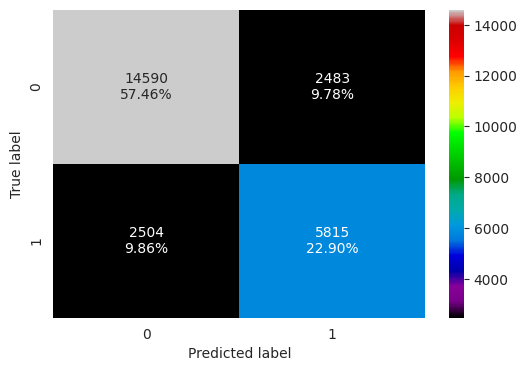

In [156]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [157]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision   F1
0      0.80    0.70       0.70 0.70

Model is performing well on the training set. <br>

Threshold went from 0.34 to 0.42. <br>

Accuracy - increased by 0.01 <br>
Recall - decreased by 0.06 <br>
Precision - increased by 0.05 <br>
F1 Score - stayed the same.

Although accuracy and precision increased, recall decreased and F1 score stayed the same. <br>
Original threshold is better on recall.


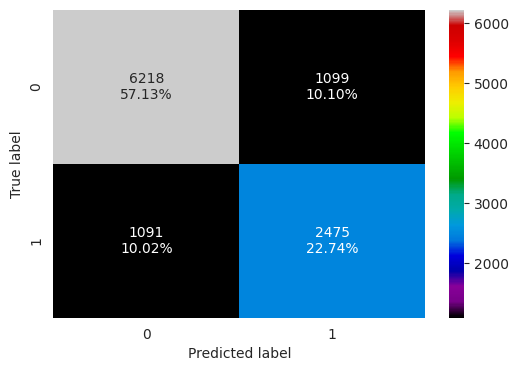

In [158]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [159]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision   F1
0      0.80    0.69       0.69 0.69

Model is performing well on the testing set. <br>

Threshold went from 0.34 to 0.42. <br>

Accuracy - increased by 0.02 <br>
Recall - decreased by 0.07 <br>
Precision - increased by 0.05 <br>
F1 Score - stayed the same.

Although accuracy and precision increased, recall decreased and F1 score stayed the same. <br>
Original threshold is better on recall.
Match almost perfectly to the training model.

**Logistic Regression model summary**

In [160]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-sklearn",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-sklearn  Logistic Regression-0.34 Threshold  \
Accuracy                          0.81                                0.79   
Recall                            0.63                                0.76   
Precision                         0.74                                0.65   
F1                                0.68                                0.70   

           Logistic Regression-0.42 Threshold  
Accuracy                                 0.80  
Recall                                   0.70  
Precision                                0.70  
F1                                       0.70

In [161]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-sklearn",
    "Logistic Regression-0.34 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-sklearn  Logistic Regression-0.34 Threshold  \
Accuracy                          0.80                                0.78   
Recall                            0.63                                0.76   
Precision                         0.74                                0.64   
F1                                0.68                                0.69   

           Logistic Regression-0.42 Threshold  
Accuracy                                 0.80  
Recall                                   0.69  
Precision                                0.69  
F1                                       0.69

**Conclusions**

- Almost all the three models are performing well on both training and test data without the problem of overfitting. <br>
- Similiar results are being achieved on the training and testing set.
- The model with a  threshold (0.34) and (0.42) both are showing the same F1 score. However the (0.34) threshold has a higher Recall. Therefore it can be selected as the final model. <br>
- INN Hotels can utilize this model to forecast booking cancellations, achieving an F1 score of 0.70 on the training set and 0.69 on the test set. <br>

**Top 5 Coefficients that will cause a negative change:**<br>

1. When all other factors remain constant, being a repeated guest reduces the odds of a booking being canceled by 95.36%.<br>
2. When all other factors remain constant, being a guest that books a room offline reduces the odds of a booking being canceled by 83.14%. <br>
3. When all other factors remain constant, being a guest that requires a car parking space reduces the odds of a booking being canceled by 80.01%. <br>
4. When all other factors remain constant, being a guest that has a special request reduces the odds of a booking being canceled by 77.31%. <br>
5. When all other factors remain constant, being a guest that reserves room type 7 reduces the odds of a booking being canceled by 73.20%. <br>

**Top 5 Coefficients that will cause a positive change:** <br>
1. When all other factors remain constant, the arrival year increases the odds of a booking being canceled by 54.11%.<br>
2. When all other factors remain constant, the number of previous cancellations increases the odds of a booking being canceled by 33.62%. <br>
3. When all other factors remain constant, not selecting a meal plan increases the odds of a booking being canceled by 23.08%. <br>
4. When all other factors remain constant, selecting meal plan 2 increases the odds of a booking being canceled by 19.12%. <br>
5. When all other factors remain constant, the total nights booked increases the odds of a booking being canceled by 7.39%.


## Building a Decision Tree model

### **Decision Tree (default)**

#### Hyperparameter:
- A value that is set before the learning process begins and is used to control the behavior of the learning algorithm.
- This of it like putting specific settings in the washing machine before you clean your clothes (data).
- Settings can be: water temp, spin speed, soil level, Detergent Dispenser, etc..

criterion: The function to measure the quality of a split ("gini" or "entropy").

Entropy, based on the concept from information theory, measures the amount of disorder or unpredictability in the data at a node. Entropy ranges from 0 (pure node) to 1 (maximally mixed node with equal distribution of classes).

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
Range: The Gini impurity ranges from 0 (pure node) to 0.5 (evenly mixed classes in the node).

Preference: Gini impurity is typically preferred for its computational efficiency, but entropy is sometimes chosen for its stronger theoretical foundation from information theory.

splitter: The strategy used to choose the split at each node ("best" or "random").

max_depth: The maximum depth of the tree (None for no limit).

min_samples_split: The minimum number of samples required to split an internal node (int or float).

min_samples_leaf: The minimum number of samples required to be at a leaf node (int or float).

min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights required to be at a leaf node.

max_features: The number of features to consider when looking for the best split (int, float, string, or None).

random_state: Controls the randomness of the estimator (int, RandomState instance, or None).

max_leaf_nodes: Grow a tree with the maximum number of leaf nodes (None for unlimited).

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

class_weight: Weights associated with classes (dict, list of dicts, "balanced", or None).

ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning (non-negative float).


In [162]:
# Create a DecisionTreeClassifier with all parameters specified
clf_example = DecisionTreeClassifier(
    criterion='entropy',             # Measure quality of split using 'entropy' 'Gini' (Measure of randomness or disorder in a set of data)
    splitter='random',               # Use random best split
    max_depth=3,                     # Maximum depth of the tree is 5
    min_samples_split=4,             # Minimum 4 samples required to split an internal node
    min_samples_leaf=3,              # Minimum 2 samples required to be at a leaf node
    min_weight_fraction_leaf=0.01,   # Minimum weighted fraction of sum total of weights required at a leaf node
    max_features='sqrt',             # Number of features to consider when looking for the best split is the square root of total features
    random_state=44,                 # Control randomness of the estimator
    max_leaf_nodes=15,               # Maximum number of leaf nodes is 10
    min_impurity_decrease=0.01,      # A node will be split if this split induces a decrease in impurity greater than or equal to this value
    class_weight='balanced',         # Adjust weights inversely proportional to class frequencies in the input data
    ccp_alpha=0.01                   # Complexity parameter used for Minimal Cost-Complexity Pruning
)

In [163]:
df3["booking_status"].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [164]:
df3["booking_status"] = df3["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [165]:
#resplit data for the decision tree model
X = df3.drop(["booking_status",], axis=1)
Y = df3["booking_status"]

# Identify object-type columns
object_cols = X.select_dtypes(include=['object','category']).columns

# Convert object-type columns to dummy variables
X = pd.get_dummies(X, columns=object_cols, dtype=int, drop_first=True)  # Drop the first category to avoid multicollinearity
# Ensure te output is integer (numeric 0 and 1) instead of Boolean

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [166]:
Y.unique()

array([0, 1])

In [167]:
X_train.head()

no_of_adults  no_of_children  required_car_parking_space  lead_time  \
13662             1               0                           0        163   
26641             2               0                           0        113   
17835             2               0                           0        359   
21485             2               0                           0        136   
5670              2               0                           0         21   

       arrival_year  arrival_month  arrival_date  repeated_guest  \
13662          2018             10            15               0   
26641          2018              3            31               0   
17835          2018             10            14               0   
21485          2018              6            29               0   
5670           2018              8            15               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   

       avg_price_per_room  no_of_special_requests  total_nights  \
13662              115.00                       0             1   
26641               78.15                       1             3   
17835               78.00                       1             5   
21485               85.50                       0             3   
5670               151.00                       0             3   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
13662                              0                              0   
26641                              0                              0   
17835                              0                              0   
21485                              0                              0   
5670                               0                              0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
13662                               0                               0   
26641                               0                               1   
17835                               0                               0   
21485                               1                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
13662                               0                                  0   
26641                               0                                  0   
17835                               0                                  0   
21485                               0                                  0   
5670                                0                                  0   

       market_segment_type_Corporate  market_segment_type_Offl

We will construct our model using the DecisionTreeClassifier function. By default, it employs the ‘gini’ criterion to determine how to split the data at each node. Alternatively, you can choose the ‘entropy’ criterion for splitting

In [168]:
X_train = X_train.astype(float)  # Convert all columns to float
X_train.dtypes

no_of_adults                            float64
no_of_children                          float64
required_car_parking_space              float64
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
total_nights                            float64
type_of_meal_plan_Meal Plan 2           float64
type_of_meal_plan_Meal Plan 3           float64
type_of_meal_plan_Not Selected          float64
room_type_reserved_Room_Type 2          float64
room_type_reserved_Room_Type 3          float64
room_type_reserved_Room_Type 4          float64
room_type_reserved_Room_Type 5          float64
room_type_reserved_Room_Type 6          

In [169]:
# checking the shape of the the train and test data
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


adding constant not needed for decisiontrees  <br>
 sm.add_constant


In [170]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [171]:
#confirm percentage of each class in both training and test datasets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
booking_status
0   0.67
1   0.33
Name: proportion, dtype: float64
 
Percentage of classes in test set:
booking_status
0   0.68
1   0.32
Name: proportion, dtype: float64


In [172]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

##Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not be canceled  but in reality, the booking is canceled (FN)
- Predicting a machine will be canceled but in reality, the booking is not canceled (FP)

**Which case is more important?**

- If we predict that a booking will not be canceled but in reality, the booking is canceled, then the company will have to bear the cost of a room being empty
- If we predict that a booking will be canceled but in reality, the booking is not canceled, then the company will have overbooked the room. This could lead to a loss revenue for current booking, bad reputation for canceling a guests booking, future loss revenue as guest will book somewhere else.
- Typically the loss in revenue would be less if the guest cancels and the company is expecting them not to cancel.

**How to reduce the losses?**

The company would want the recall to be maximized, the greater the recall score the higher the chances of minimizing the False Negatives.

In [173]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

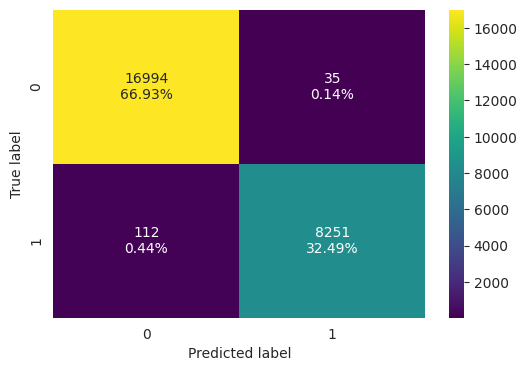

In [174]:
confusion_matrix_sklearn(model, X_train, y_train)

In [175]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision   F1
0      0.99    0.99       1.00 0.99

Model is showing an F1 score of 99. It is only misclassifying 147 bookings. However there is probably significant overfitting in the training data.

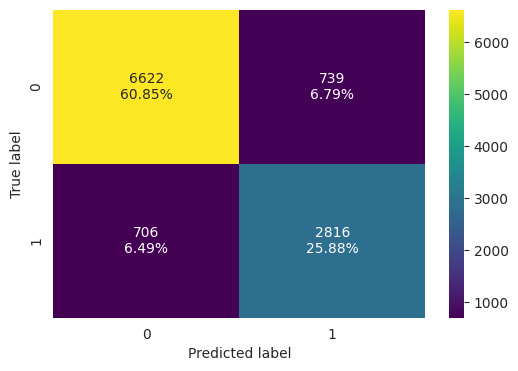

In [176]:
confusion_matrix_sklearn(model, X_test, y_test)

In [177]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision   F1
0      0.87    0.80       0.79 0.80

There is a huge difference between the training set and test set. That means there is overfitting.

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

DecisionTreeClassifier(class_weight='balanced', random_state=1)

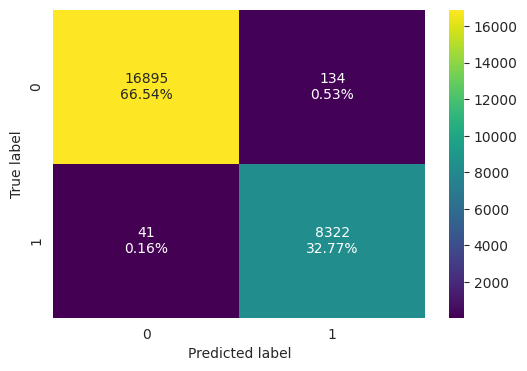

In [178]:
#build the decision tree model
decisiontree = DecisionTreeClassifier(random_state=1, class_weight="balanced")
#fit the model to the training set
decisiontree.fit(X_train, y_train)
#create a confusion matrix
confusion_matrix_sklearn(decisiontree, X_train, y_train)

In [179]:
decision_tree_perf_train = model_performance_classification_sklearn(
    decisiontree, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0      0.99    1.00       0.98 0.99

Model is only misclassifying 156 bookings. But there is most likely overfitting in the training data.

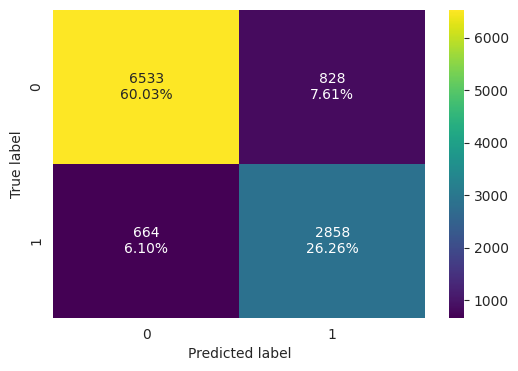

In [180]:
#create a confusion matrix for the test set
confusion_matrix_sklearn(decisiontree, X_test, y_test)

In [181]:
decision_tree_perf_test = model_performance_classification_sklearn(
    decisiontree, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision   F1
0      0.86    0.81       0.78 0.79

There is a huge difference in the performance of the model on the training set and the test set, this means the model is overfitting.

##Visualizing the Decision Tree

## Do we need to prune the tree?

In [182]:
## creating a list of column names
feature_names = X_train.columns.to_list()
feature_names

['no_of_adults',
 'no_of_children',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'total_nights',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Meal Plan 3',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 3',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

In [183]:
# Text report showing the rules of a decision tree -

print(tree.export_text(decisiontree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- total_nights <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- arrival_month <= 5.50
|   |   |   |   |   |   |   |   |--- arrival_date <= 27.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 59.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |--- lead_time >  59.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_date <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [19.38, 0.00] class: 0
|   |  

<Figure size 2000x3000 with 0 Axes>

[Text(0.7131192802725084, 0.9861111111111112, 'node #0\nlead_time <= 151.5\ngini = 0.5\nsamples = 25392\nvalue = [12696.0, 12696.0]\nclass = y[0]'),
 Text(0.45287949672850264, 0.9583333333333334, 'node #1\nno_of_special_requests <= 0.5\ngini = 0.472\nsamples = 20410\nvalue = [11676.085, 7209.531]\nclass = y[0]'),
 Text(0.1735591734789969, 0.9305555555555556, 'node #2\nmarket_segment_type_Online <= 0.5\ngini = 0.5\nsamples = 10667\nvalue = [5306.837, 5387.792]\nclass = y[1]'),
 Text(0.10714157535355012, 0.9027777777777778, 'node #3\nlead_time <= 90.5\ngini = 0.381\nsamples = 5395\nvalue = [3439.976, 1185.648]\nclass = y[0]'),
 Text(0.08374171917497142, 0.875, 'node #4\ntotal_nights <= 5.5\ngini = 0.27\nsamples = 4149\nvalue = [2827.132, 541.967]\nclass = y[0]'),
 Text(0.0721436700303304, 0.8472222222222222, 'node #5\navg_price_per_room <= 201.5\ngini = 0.24\nsamples = 3970\nvalue = [2741.394, 444.808]\nclass = y[0]'),
 Text(0.05984772156590466, 0.8194444444444444, 'node #6\nlead_time <=

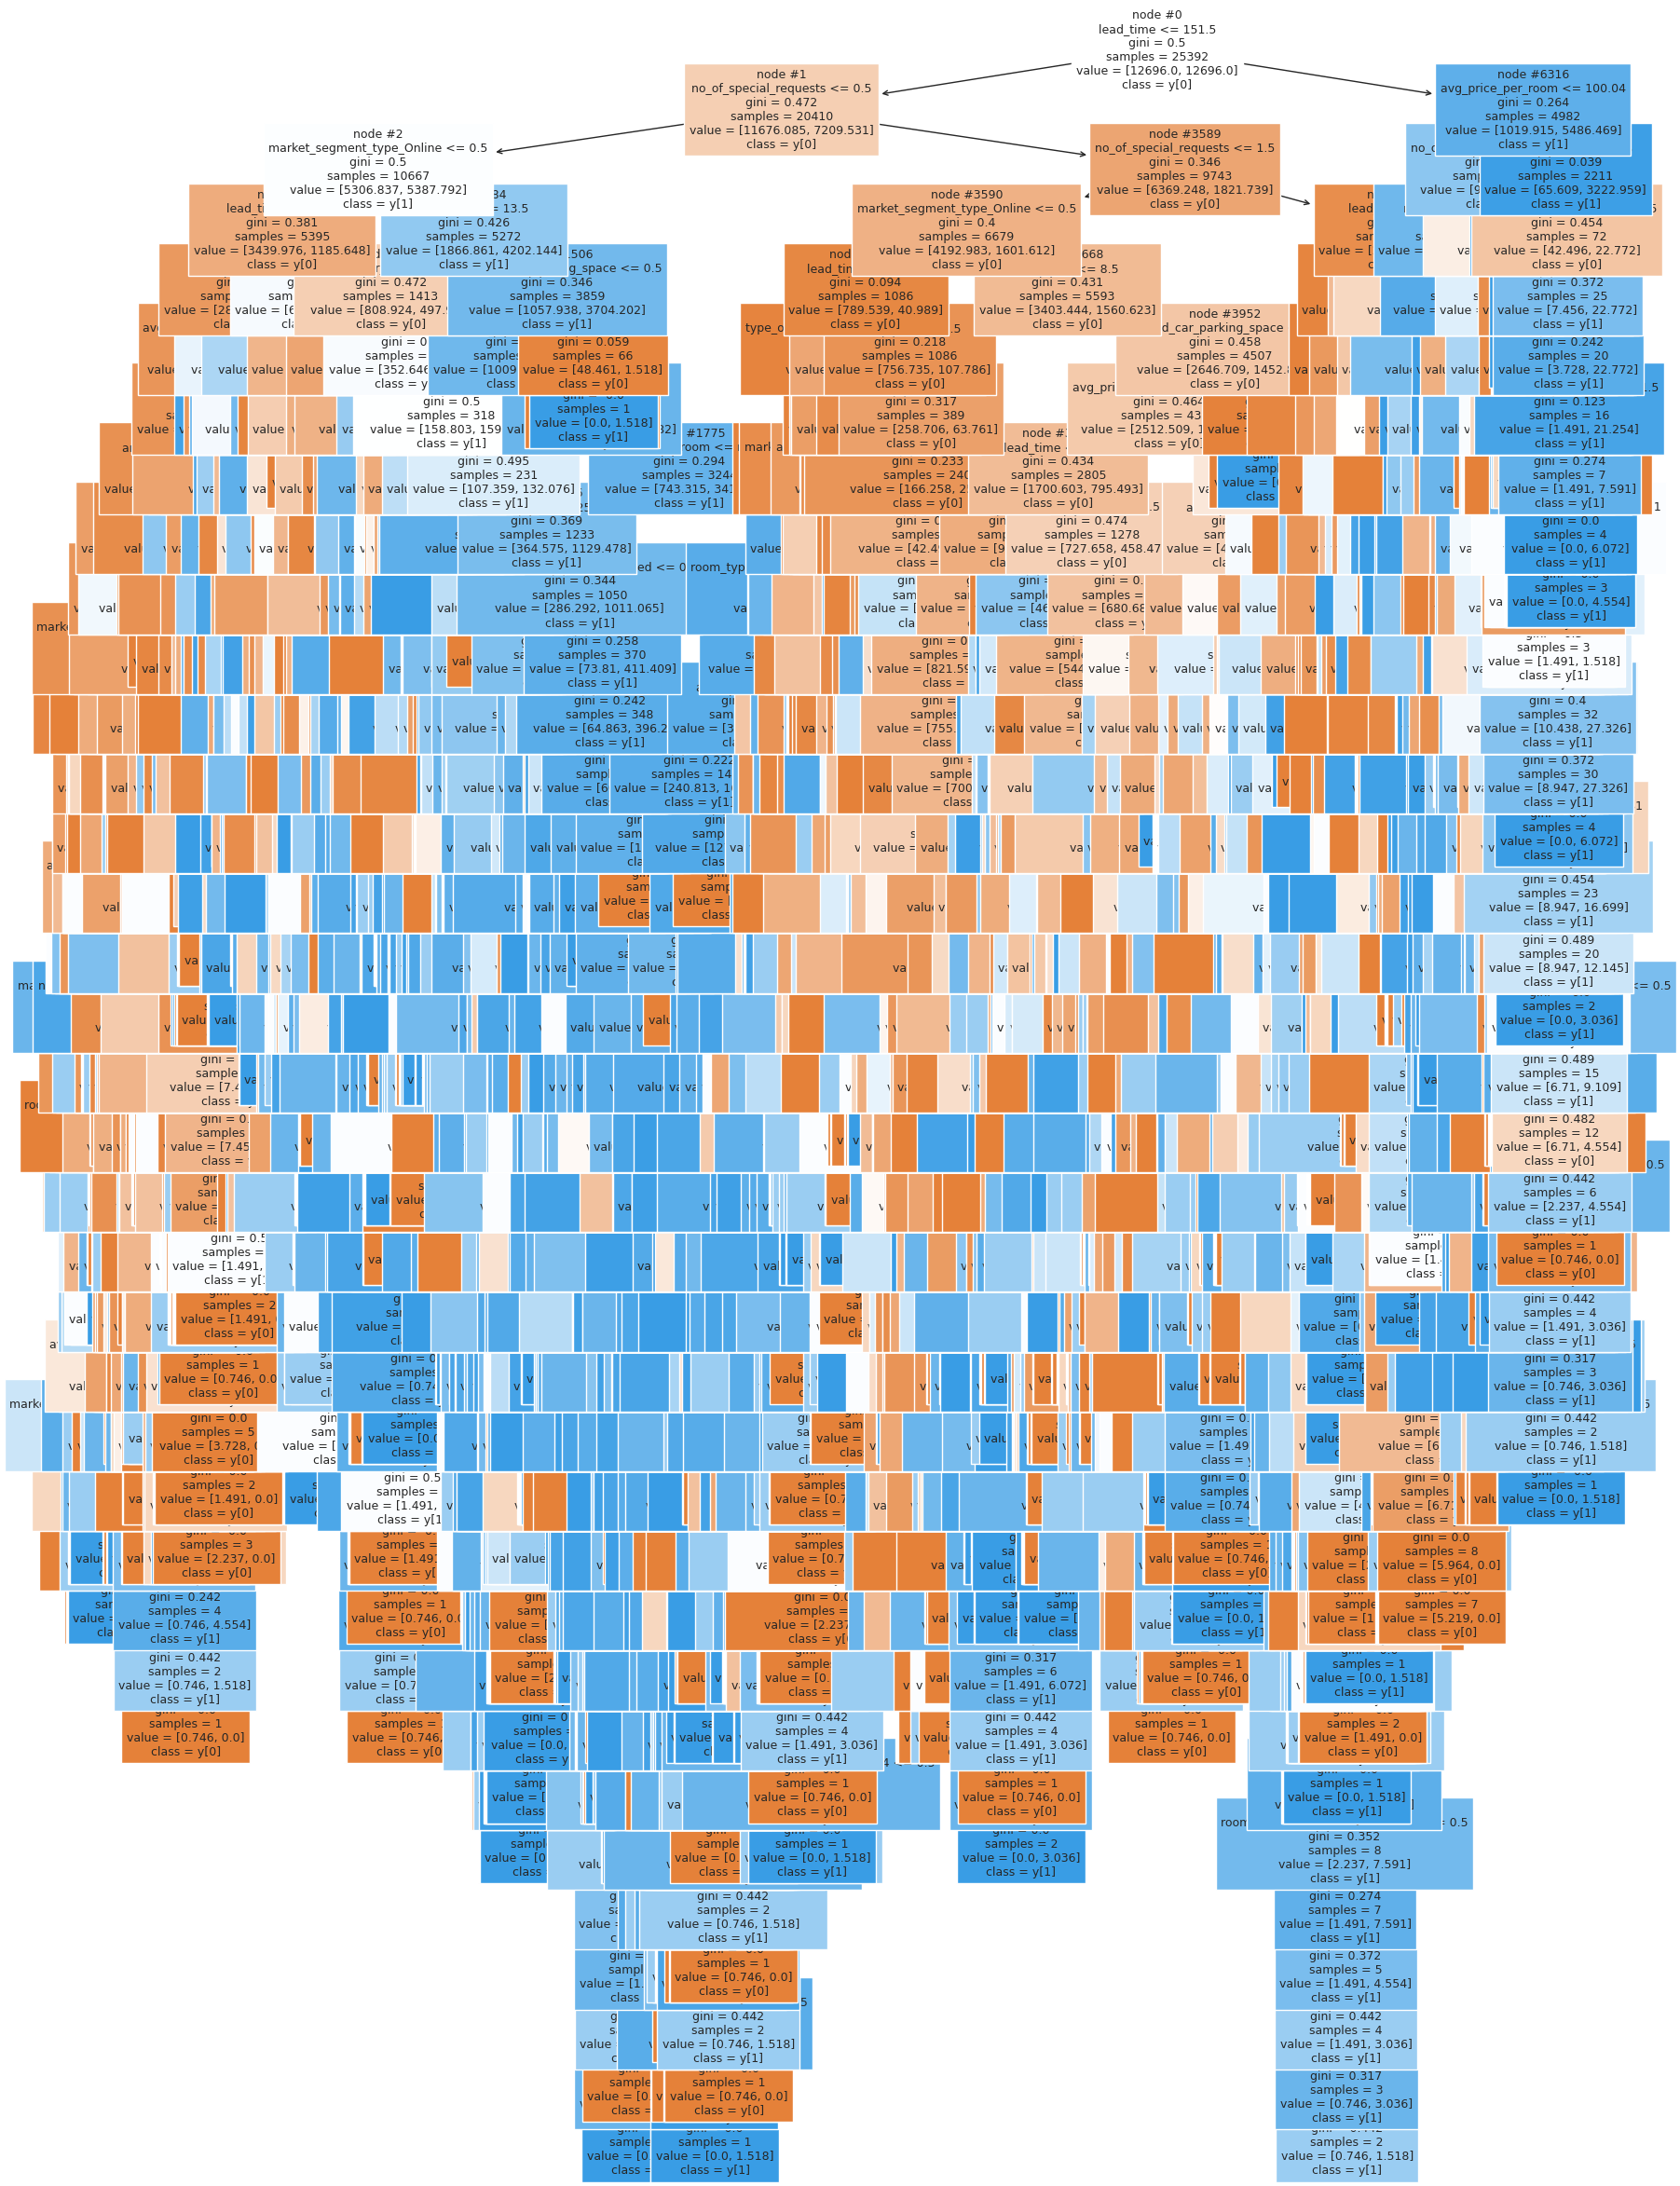

In [184]:
plt.figure(figsize=(20,30))
tree.plot_tree(decisiontree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [185]:
#Top-10 most important features in the decision tree
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature

print(pd.DataFrame(decisiontree.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

                             Imp
lead_time                   0.36
avg_price_per_room          0.15
market_segment_type_Online  0.09
arrival_date                0.09
no_of_special_requests      0.09
arrival_month               0.07
total_nights                0.06
no_of_adults                0.03
arrival_year                0.02
market_segment_type_Offline 0.01


<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 26 artists>

([<matplotlib.axis.YTick at 0x7cf38840e170>,
 [Text(0, 0, 'market_segment_type_Complementary'),
  Text(0, 1, 'type_of_meal_plan_Meal Plan 3'),
  Text(0, 2, 'room_type_reserved_Room_Type 3'),
  Text(0, 3, 'no_of_previous_bookings_not_canceled'),
  Text(0, 4, 'no_of_previous_cancellations'),
  Text(0, 5, 'room_type_reserved_Room_Type 7'),
  Text(0, 6, 'market_segment_type_Corporate'),
  Text(0, 7, 'room_type_reserved_Room_Type 6'),
  Text(0, 8, 'repeated_guest'),
  Text(0, 9, 'room_type_reserved_Room_Type 5'),
  Text(0, 10, 'room_type_reserved_Room_Type 2'),
  Text(0, 11, 'type_of_meal_plan_Meal Plan 2'),
  Text(0, 12, 'no_of_children'),
  Text(0, 13, 'type_of_meal_plan_Not Selected'),
  Text(0, 14, 'room_type_reserved_Room_Type 4'),
  Text(0, 15, 'required_car_parking_space'),
  Text(0, 16, 'market_segment_type_Offline'),
  Text(0, 17, 'arrival_year'),
  Text(0, 18, 'no_of_adults'),
  Text(0, 19, 'total_nights'),
  Text(0, 20, 'arrival_month'),
  Text(0, 21, 'no_of_special_requests'),
 

Text(0.5, 0, 'Relative Importance')

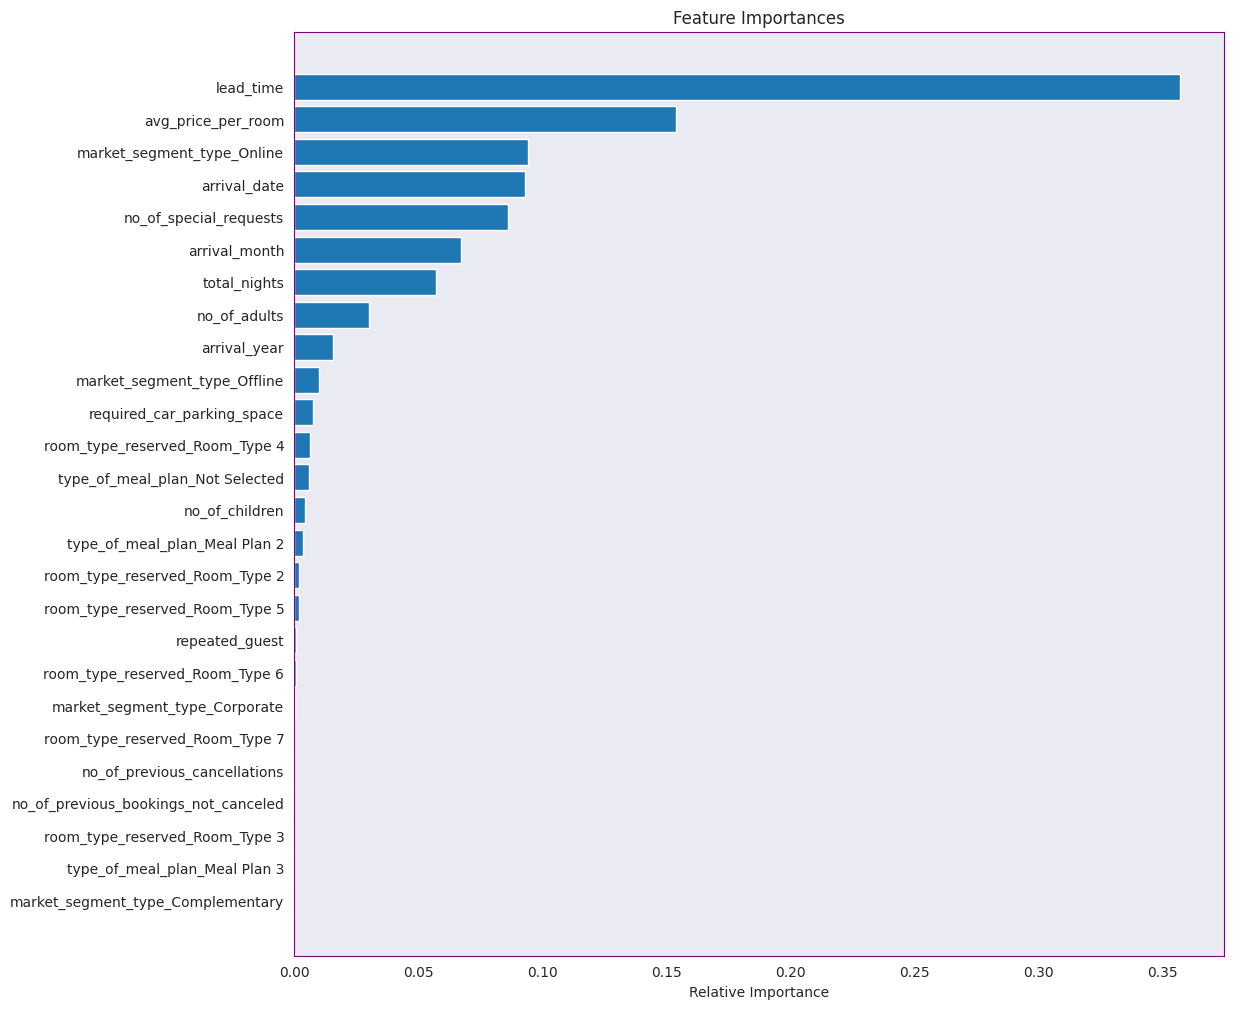

In [186]:
#visualization of feature importance
importances = decisiontree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

lead_time is the highest variable in the feature imprtance.

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning for our tree model using GridSearch is a crucial step.
* However, it can be challenging because there’s no direct formula to calculate how adjusting a hyperparameter value will impact the model’s loss.
* Instead, we rely on experimentation to find the optimal hyperparameter values i.e we'll use Grid search
* Grid search exhaustively explores specific parameter values and optimizes the model by cross-validating over a parameter grid.


In [187]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(4, 13, 4),  # [4, 8, 12]
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01, .1, 1],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],

}

# Type of scoring used to compare parameter combinations
accuracy_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=accuracy_scorer, cv=5)
grid_obj = grid_obj.fit(X_train1, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_leaf_nodes=50,
                       min_impurity_decrease=1e-05, min_samples_split=10,
                       random_state=1)

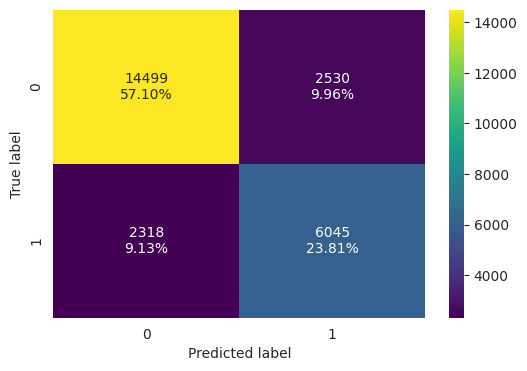

In [188]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [189]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision   F1
0      0.81    0.72       0.70 0.71

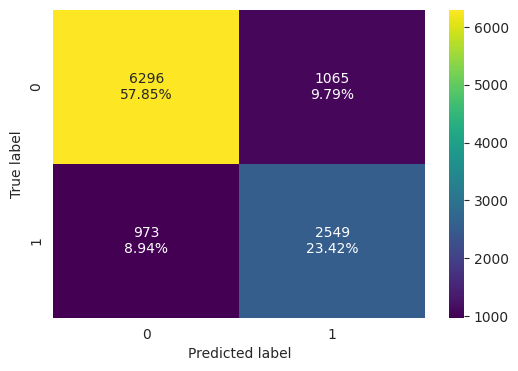

In [190]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [191]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision   F1
0      0.81    0.72       0.71 0.71

The training and the test have similar results, however the F1 scores are .71 and .71 which is very low. <br>
Also the recall score is 0.72 and 0.72.<br>
Recall on training set went from .98 to .72, but this is an improvement because now the model has less overfitting. <br>
There is still more work to do.

**Visualing the Decison Tree**

<Figure size 3500x1000 with 0 Axes>

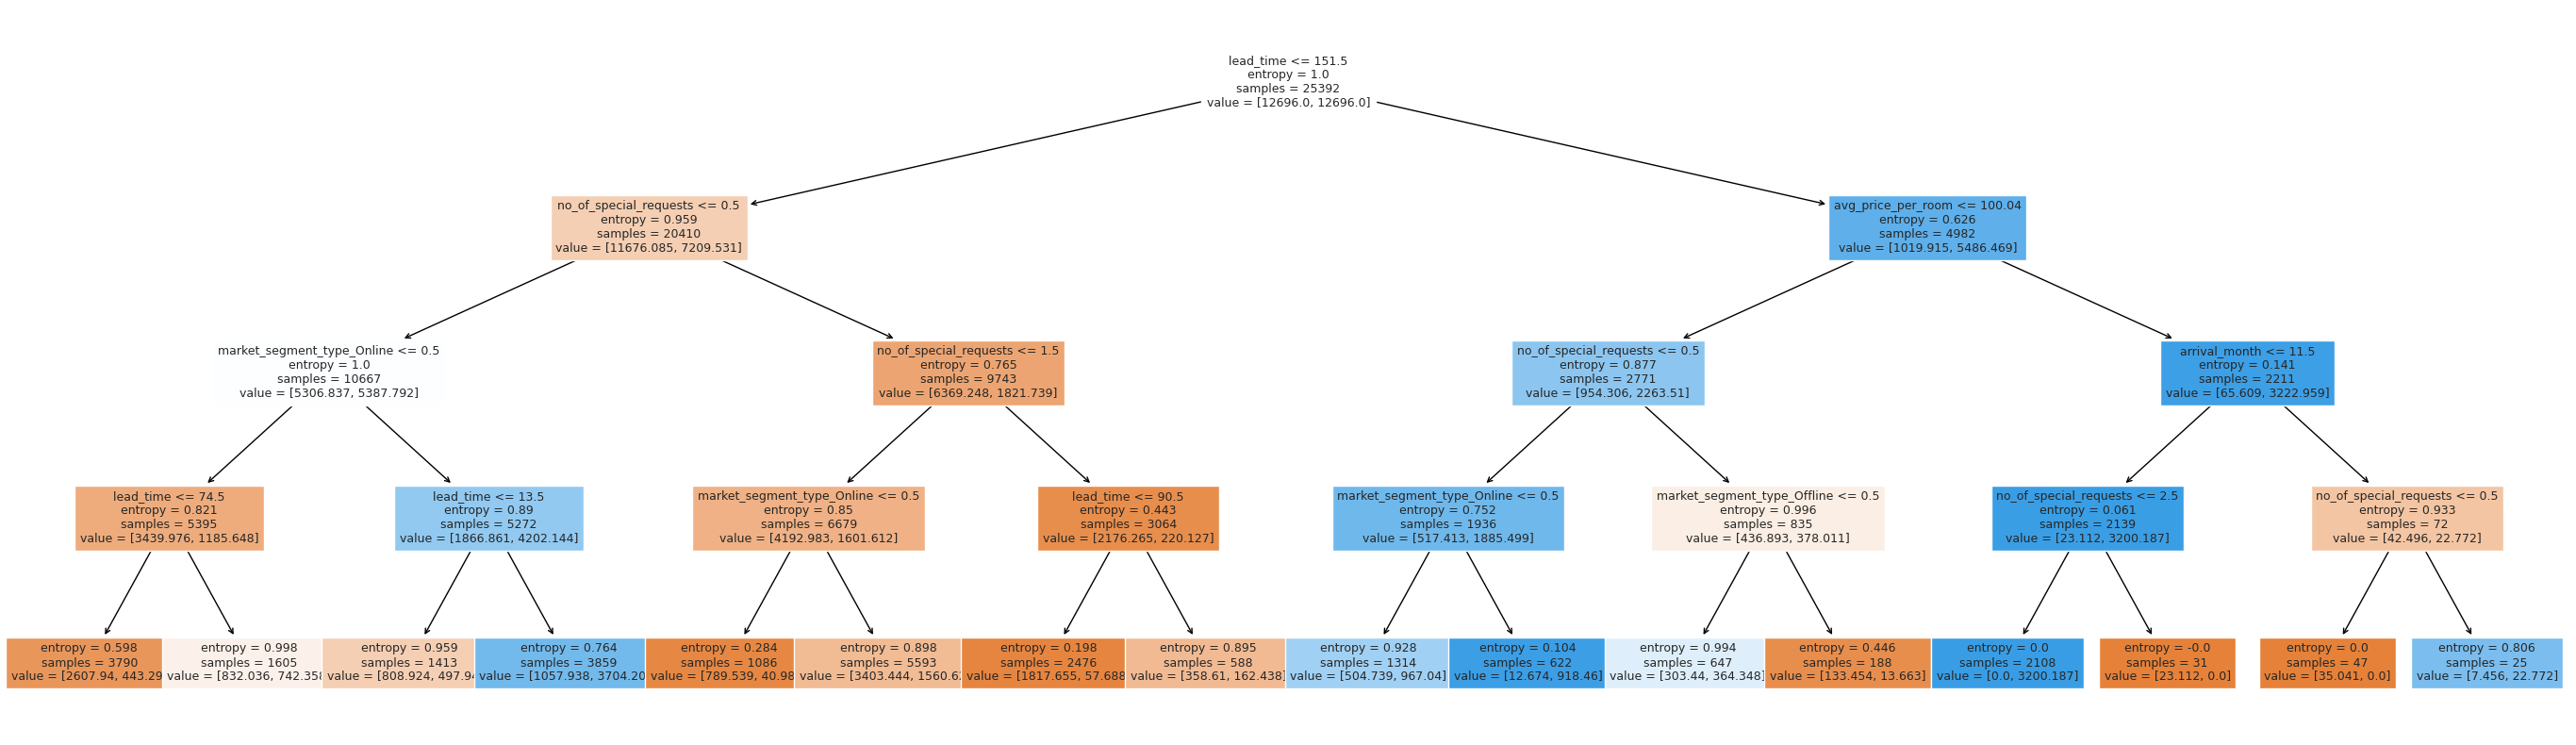

In [192]:
plt.figure(figsize=(35, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

This decisontree looks better than the previous one. <br>
Still has several nodes but way easier to read.

In [193]:
#Print the top-10 most important features in the decision tree
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature

print(pd.DataFrame(estimator.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

                                   Imp
lead_time                         0.46
market_segment_type_Online        0.22
no_of_special_requests            0.20
avg_price_per_room                0.08
arrival_month                     0.02
market_segment_type_Offline       0.01
type_of_meal_plan_Not Selected    0.00
market_segment_type_Corporate     0.00
market_segment_type_Complementary 0.00
room_type_reserved_Room_Type 7    0.00


The pre-pruned decision tree model shows lead_time and market_segment_type_online are the two most important variables for predicting a booking's cancellation. <br>
The third most important variable, no_of_special_requests. <br>



**Cost Complexity Pruning**

Minimal cost complexity pruning identifies the node with the ‘weakest link’ in a decision tree. This ‘weakest link’ is characterized by an effective alpha, where nodes with the smallest effective alpha are pruned first. To determine suitable values for the pruning parameter (ccp_alpha), scikit-learn provides the DecisionTreeClassifier.cost_complexity_pruning_path function. This function returns the effective alphas and corresponding total leaf impurities at each step of the pruning process. As the alpha value increases, more of the tree is pruned, leading to increased total impurity in its leaves. <br>

In summary, cost complexity pruning helps control the size of decision trees by selectively removing nodes based on their impact on model complexity and impurity reduction. By adjusting the ccp_alpha parameter, you can strike a balance between model accuracy and simplicity.

In [194]:
# Set the classifier first
cif = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Compute the pruning for training data
path = cif.cost_complexity_pruning_path(X_train, y_train)

# Come up with all the ccp alphas and corresponding impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

'''
Explanation of ccp_alphas: These values represent different thresholds of cost complexity.
Each value corresponds to a point where a split in the decision tree will be pruned if it doesn't improve the model's overall complexity cost by at least that amount.
The array is sorted in increasing order. Starting with the smallest alpha (the least complex tree),
each subsequent alpha increases the penalty for complexity, resulting in a simpler (more pruned) tree.


The goal is to find the ccp_alpha value that maximizes performance on the validation or test set, which may not necessarily be the highest ccp_alpha.
The optimal ccp_alpha achieves the best trade-off between overfitting and underfitting, leading to a model that generalizes well to new data.


Explanation of impurities: This array provides the total impurity of the tree at each level of pruning defined by ccp_alphas.
Impurity is a measure of how mixed the classes are in the leaves of the tree. As pruning increases (with larger ccp_alpha values),
the impurity might initially decrease, as overfitting reduces, but then can increase if the model becomes too simple and underfits.

'''


"\nExplanation of ccp_alphas: These values represent different thresholds of cost complexity.\nEach value corresponds to a point where a split in the decision tree will be pruned if it doesn't improve the model's overall complexity cost by at least that amount.\nThe array is sorted in increasing order. Starting with the smallest alpha (the least complex tree),\neach subsequent alpha increases the penalty for complexity, resulting in a simpler (more pruned) tree.\n\n\nThe goal is to find the ccp_alpha value that maximizes performance on the validation or test set, which may not necessarily be the highest ccp_alpha.\nThe optimal ccp_alpha achieves the best trade-off between overfitting and underfitting, leading to a model that generalizes well to new data.\n\n\nExplanation of impurities: This array provides the total impurity of the tree at each level of pruning defined by ccp_alphas.\nImpurity is a measure of how mixed the classes are in the leaves of the tree. As pruning increases (wit

In [195]:
pd.DataFrame(path)

ccp_alphas  impurities
0           0.00        0.01
1           0.00        0.01
2           0.00        0.01
3           0.00        0.01
4           0.00        0.01
...          ...         ...
1843        0.01        0.33
1844        0.01        0.34
1845        0.01        0.35
1846        0.03        0.42
1847        0.08        0.50

[1848 rows x 2 columns]

Text(0.5, 0, 'effective alpha')

Text(0, 0.5, 'Total impurity of leaves')

Text(0.5, 1.0, 'Total impurity vs Effective alpha for training set')

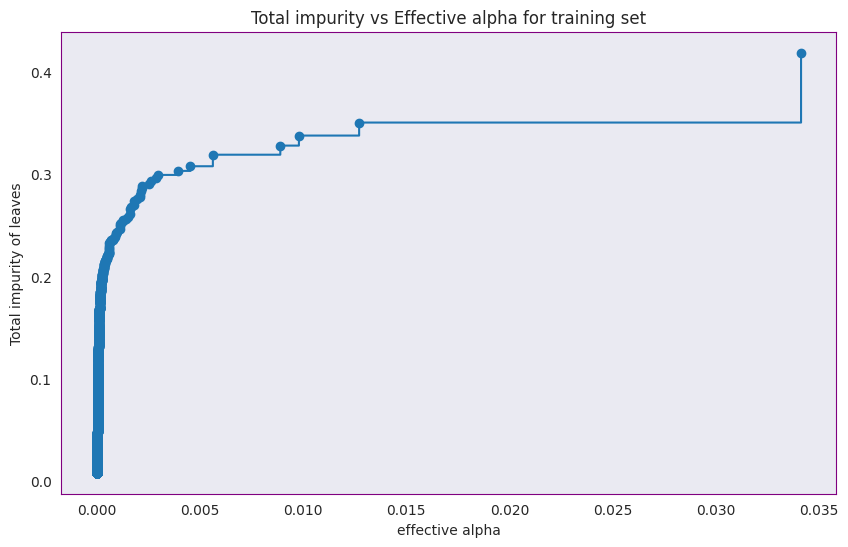

In [196]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total impurity vs Effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [197]:


clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_train, y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1])
)



Output hidden; open in https://colab.research.google.com to view.

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

Text(0.5, 0, 'Alpha')

Text(0, 0.5, 'Number of nodes')

Text(0.5, 1.0, 'Number of nodes vs Alpha')

Text(0.5, 0, 'Alpha')

Text(0, 0.5, 'Depth of tree')

Text(0.5, 1.0, 'Depth vs Alpha')

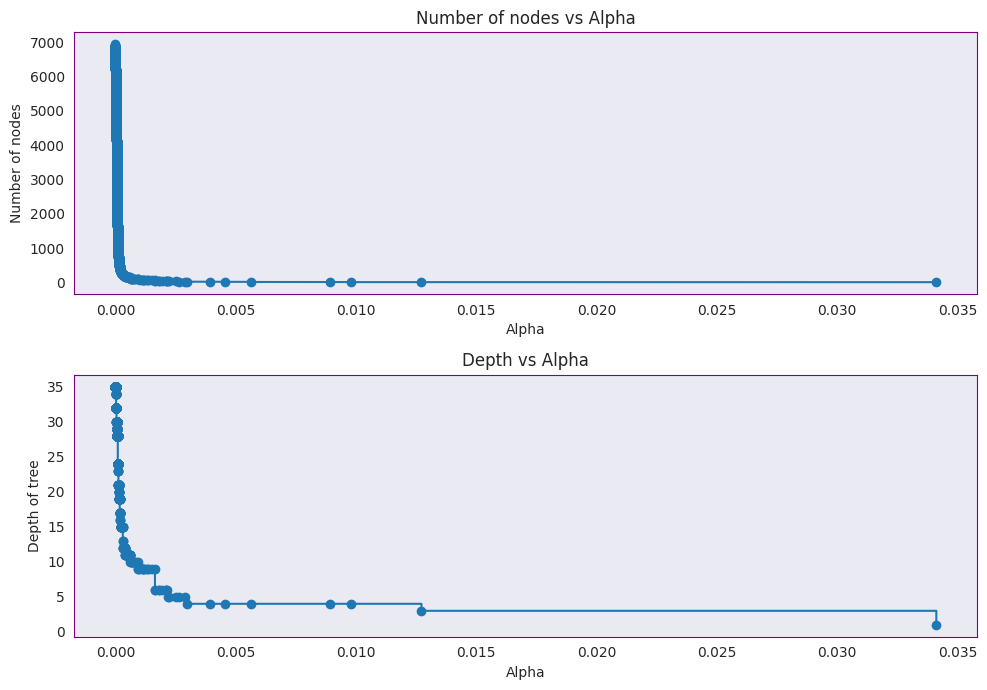

In [198]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

In [199]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [200]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [201]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'F1')

Text(0.5, 1.0, 'F1 vs Alpha for training and testing sets')

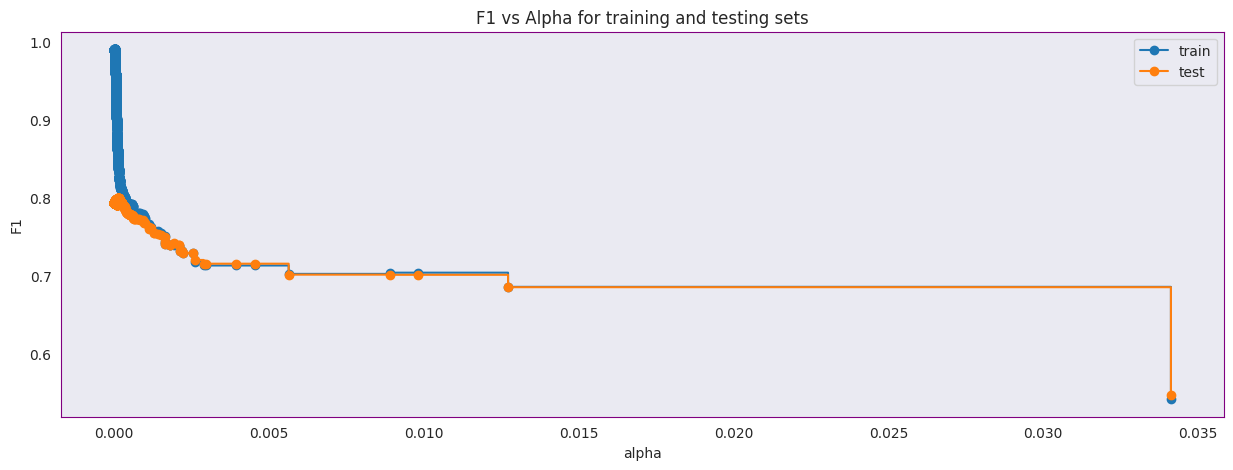

In [202]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs Alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The F1 score for the training and testing are lining up almost perfectly.

In [203]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [204]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [205]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Recall')

Text(0.5, 1.0, 'Recall vs alpha for training and testing sets')

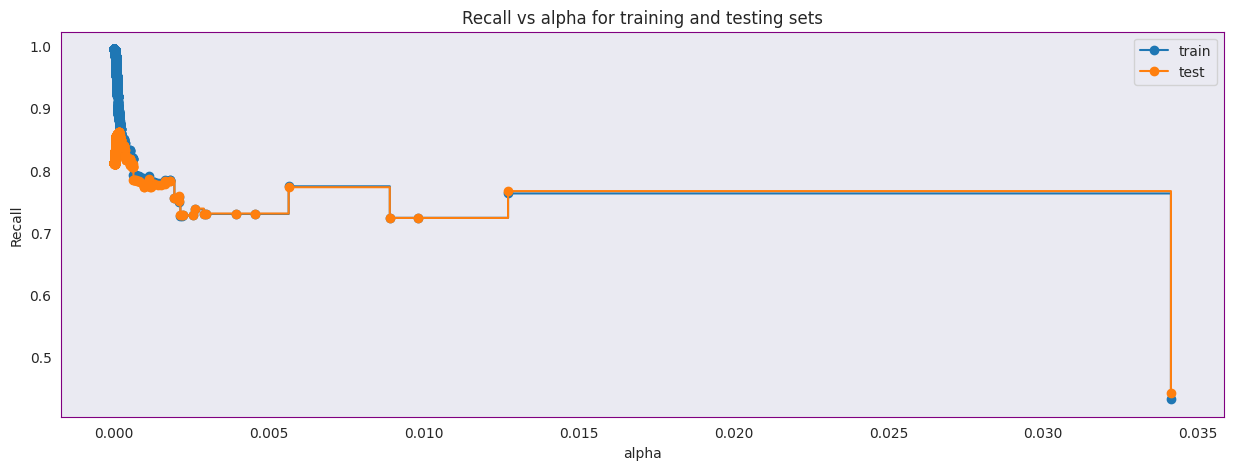

In [206]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The Recall score for the training and testing are lining up almost perfectly.

In [207]:
#create the model where we get highest train and test recall
index_post = np.argmax(f1_test)
decisiontree_post = clfs[index_post]
print(decisiontree_post)

DecisionTreeClassifier(ccp_alpha=0.00012535266224369257,
                       class_weight='balanced', random_state=1)


In [208]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001547772202137408, class_weight='balanced',
                       random_state=1)


In [209]:
decisiontree_post.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00012535266224369257,
                       class_weight='balanced', random_state=1)

Performance on Training Set

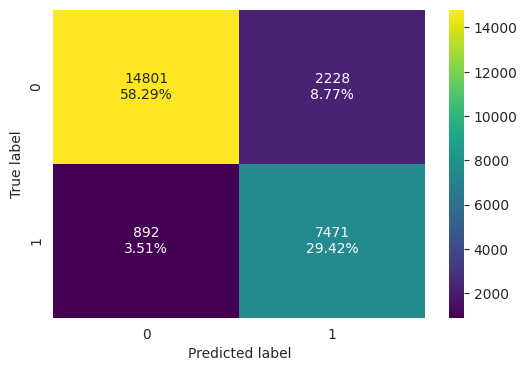

In [210]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [211]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision   F1
0      0.88    0.89       0.77 0.83

Performance on Test Set

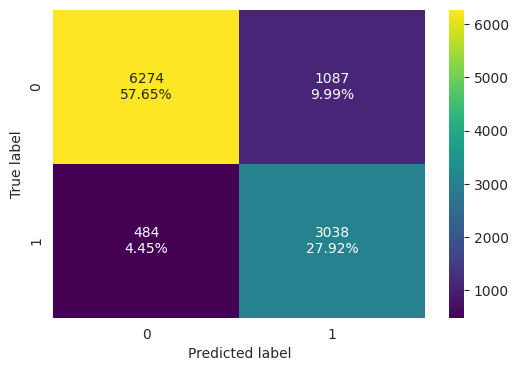

In [212]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [213]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

Accuracy  Recall  Precision   F1
0      0.86    0.86       0.74 0.79

The Fi score is 0.83 on the training set compared to 0.79 on the test set. <br>
The Recall score is 0.89 on the training set compared to 0.86 on the test set.

<Figure size 2000x1000 with 0 Axes>

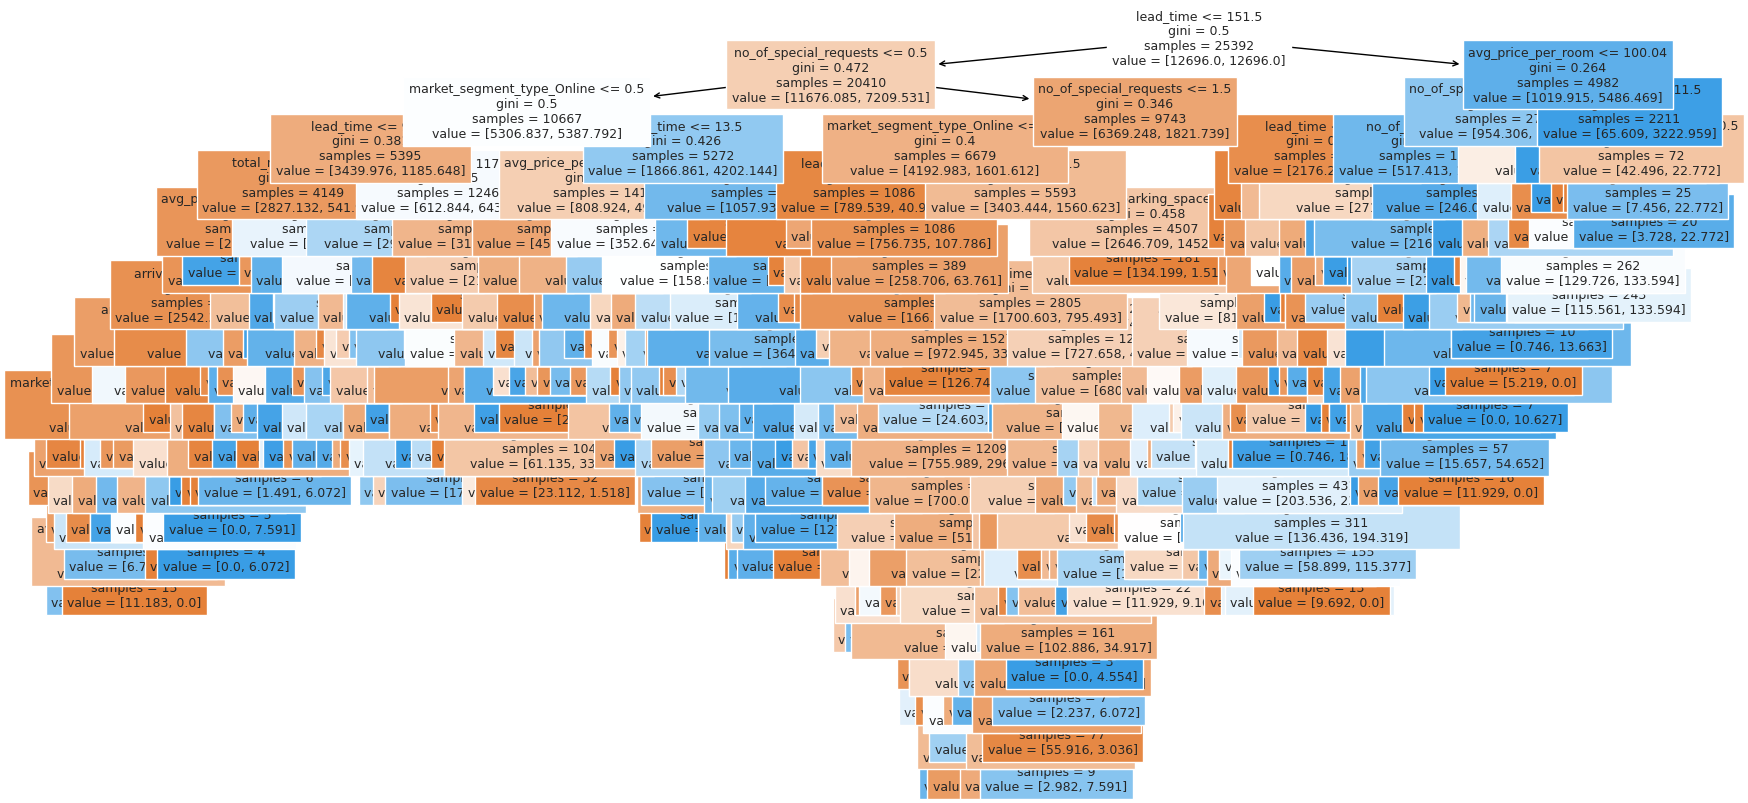

In [214]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Tree is not getting less complex.

In [215]:
#Print the top-10 most important features in the decision tree
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature

importances = decisiontree_post.feature_importances_
indices = np.argsort(importances)

print(pd.DataFrame(decisiontree_post.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

                             Imp
lead_time                   0.40
market_segment_type_Online  0.14
no_of_special_requests      0.12
avg_price_per_room          0.12
arrival_month               0.06
arrival_date                0.04
total_nights                0.03
no_of_adults                0.03
arrival_year                0.02
market_segment_type_Offline 0.01


<Figure size 1200x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 26 artists>

([<matplotlib.axis.YTick at 0x7cf3815c7a90>,
 [Text(0, 0, 'market_segment_type_Complementary'),
  Text(0, 1, 'type_of_meal_plan_Meal Plan 3'),
  Text(0, 2, 'room_type_reserved_Room_Type 3'),
  Text(0, 3, 'no_of_previous_bookings_not_canceled'),
  Text(0, 4, 'no_of_previous_cancellations'),
  Text(0, 5, 'room_type_reserved_Room_Type 7'),
  Text(0, 6, 'market_segment_type_Corporate'),
  Text(0, 7, 'room_type_reserved_Room_Type 6'),
  Text(0, 8, 'repeated_guest'),
  Text(0, 9, 'room_type_reserved_Room_Type 5'),
  Text(0, 10, 'room_type_reserved_Room_Type 2'),
  Text(0, 11, 'type_of_meal_plan_Meal Plan 2'),
  Text(0, 12, 'no_of_children'),
  Text(0, 13, 'type_of_meal_plan_Not Selected'),
  Text(0, 14, 'room_type_reserved_Room_Type 4'),
  Text(0, 15, 'required_car_parking_space'),
  Text(0, 16, 'market_segment_type_Offline'),
  Text(0, 17, 'arrival_year'),
  Text(0, 18, 'no_of_adults'),
  Text(0, 19, 'total_nights'),
  Text(0, 20, 'arrival_month'),
  Text(0, 21, 'no_of_special_requests'),
 

Text(0.5, 0, 'Relative Importance')

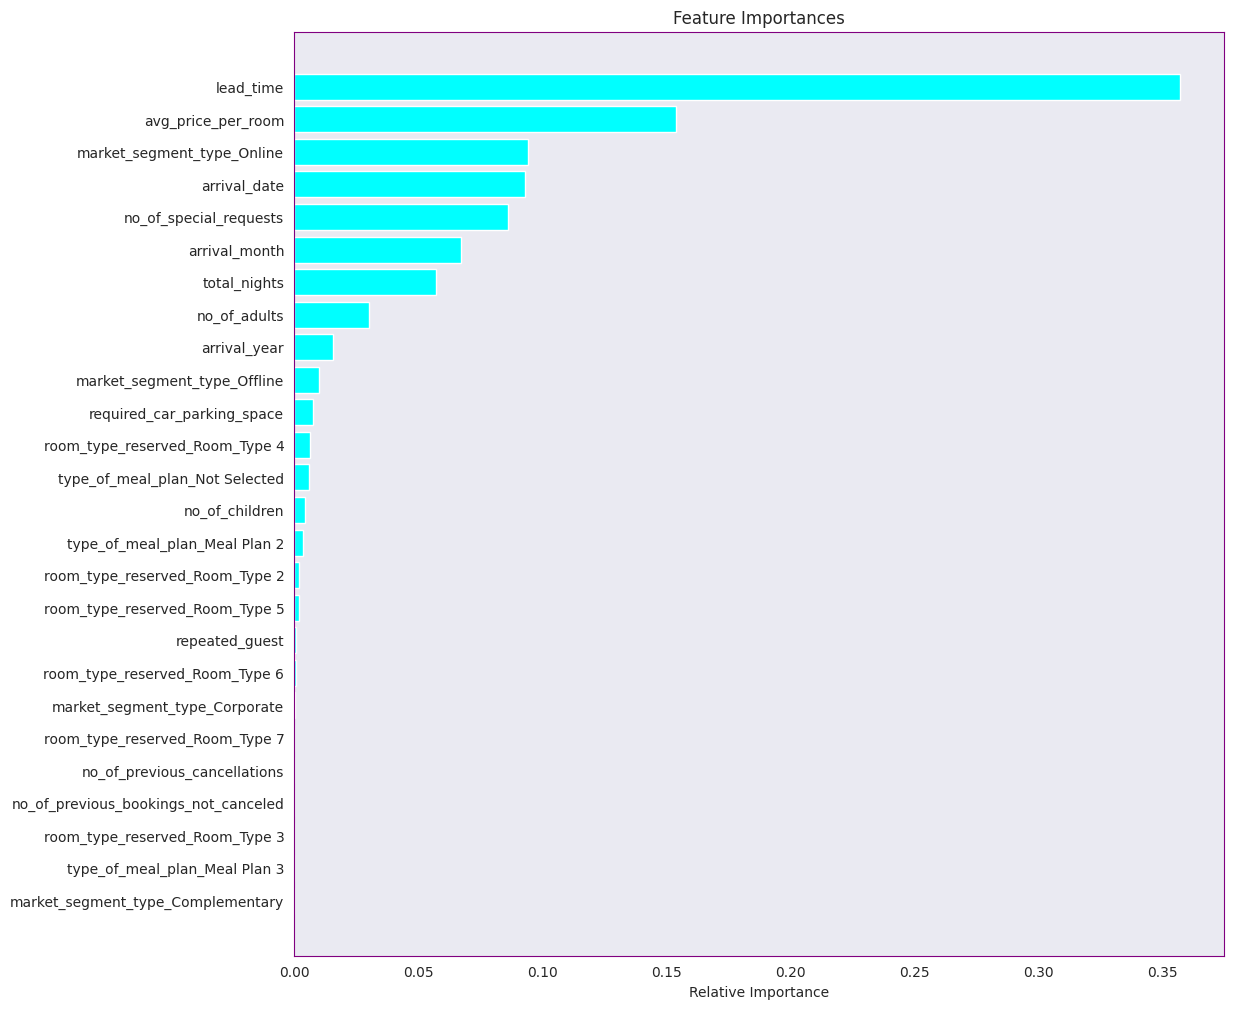

In [216]:
#visualization of feature importance
importances = decisiontree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="aqua", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [217]:
# Choose the type of classifier.
estimator_updated = DecisionTreeClassifier(random_state=1) # random forest, xgboost, svm

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(3, 13, 3),  # [3, 9, 12)
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01, 0.1, 1],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator_updated, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator_updated = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator_updated.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=250,
                       min_impurity_decrease=0.0001, min_samples_split=10,
                       random_state=1)

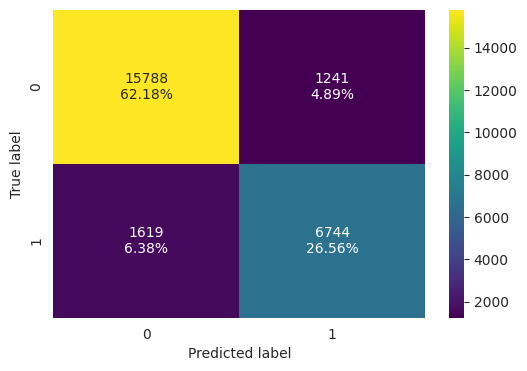

In [218]:
confusion_matrix_sklearn(estimator_updated, X_train, y_train)

In [219]:
decision_tree_tune_perf_train_updated = model_performance_classification_sklearn(
    estimator_updated, X_train, y_train
)
decision_tree_tune_perf_train_updated

Accuracy  Recall  Precision   F1
0      0.89    0.81       0.84 0.83

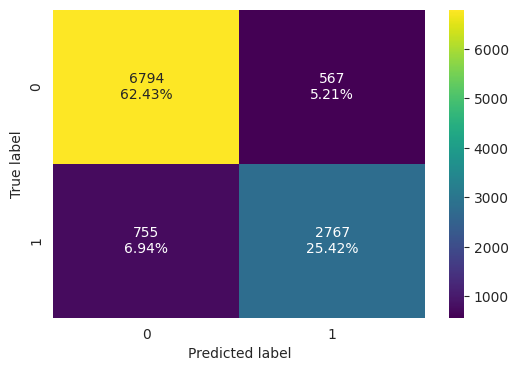

In [220]:
confusion_matrix_sklearn(estimator_updated, X_test, y_test)

In [221]:
decision_tree_tune_perf_test_updated = model_performance_classification_sklearn(
    estimator_updated, X_test, y_test
)
decision_tree_tune_perf_test_updated

Accuracy  Recall  Precision   F1
0      0.88    0.79       0.83 0.81

<Figure size 3500x1000 with 0 Axes>

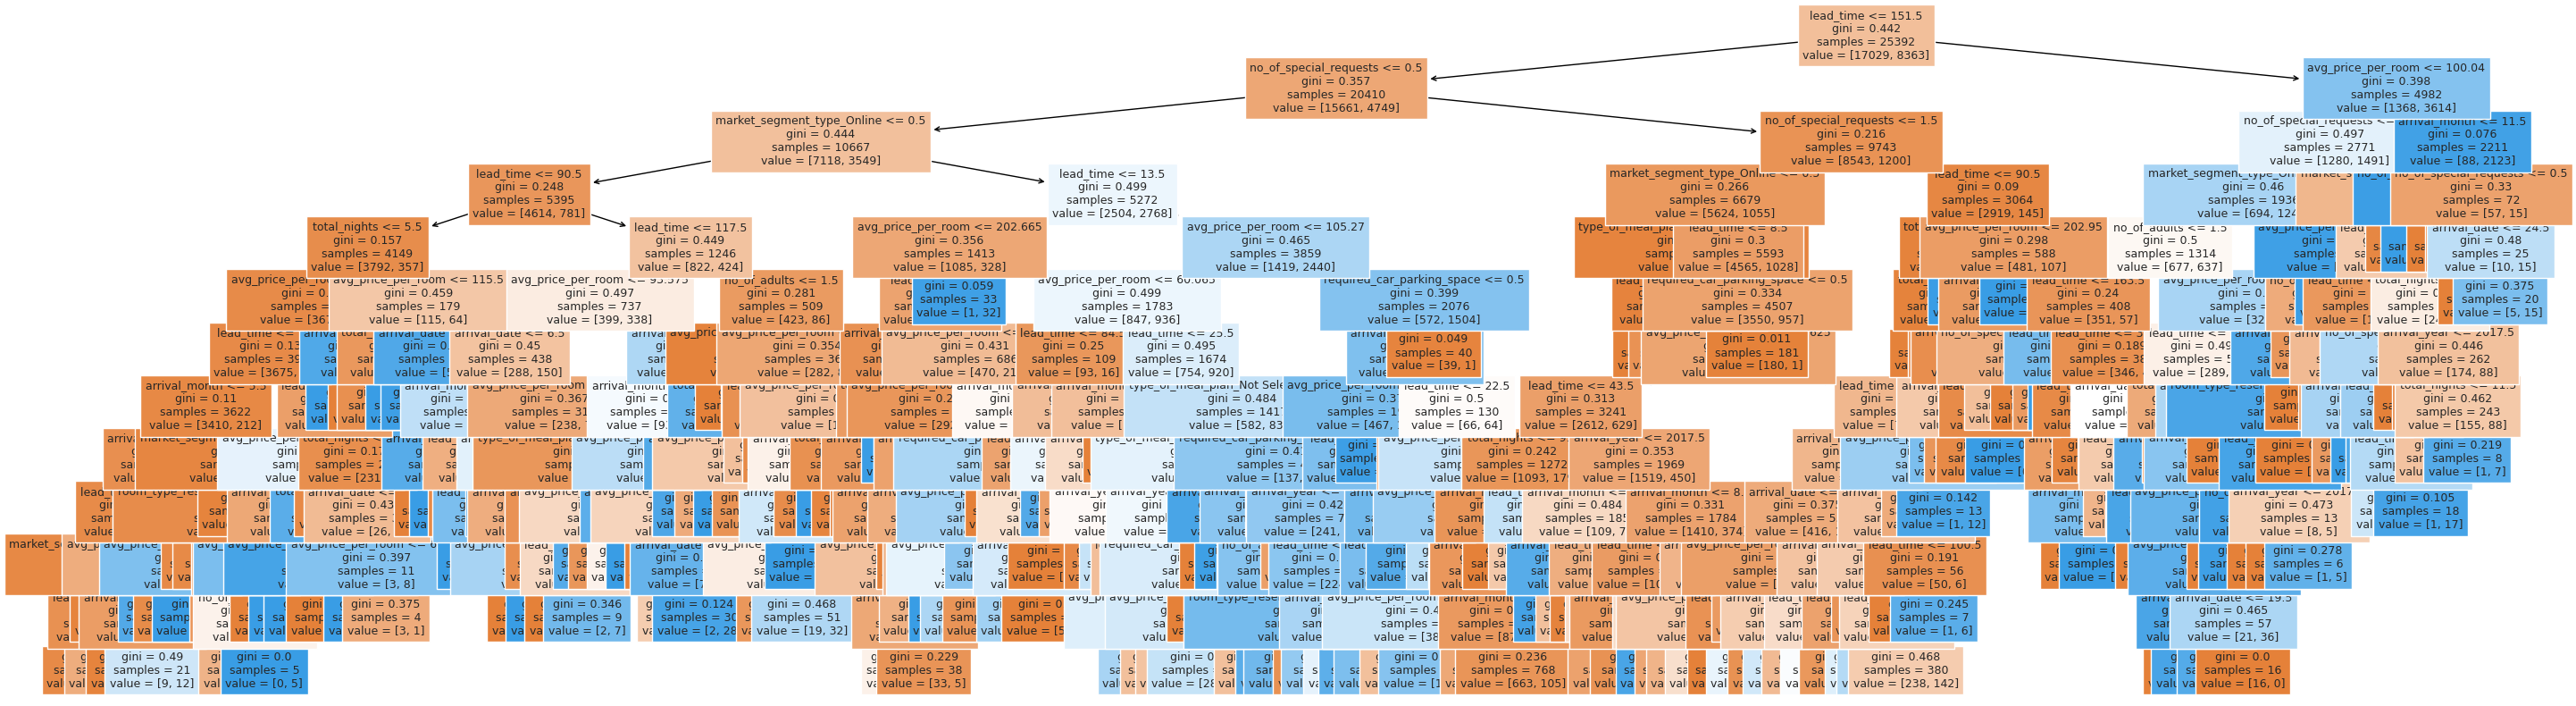

In [222]:
plt.figure(figsize=(35, 10))
out = tree.plot_tree(
    estimator_updated,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

The model has a better F1 score on both the training and testing datasets than the logistic regression models. <br>
This is a simpler model and appears to perform similarly well on both the training and test dataset, indicating that this model is not overfit to the training data and thereby should provide more generalizable predictions.

## Model Performance Comparison and Conclusions

In [223]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
        decision_tree_tune_perf_train_updated.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Readible Tree)",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                                 0.99   
Recall                                   0.99   
Precision                                1.00   
F1                                       0.99   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                              0.99                         0.81   
Recall                                1.00                         0.72   
Precision                             0.98                         0.70   
F1                                    0.99                         0.71   

           Decision Tree (Post-Pruning)  Decision Tree (Readible Tree)  
Accuracy                           0.88                           0.89  
Recall                             0.89                           0.81  
Precision                          0.77                           0.84  
F1                                 0.83                           0.83

In [225]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
        decision_tree_tune_perf_test_updated.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Readible Tree)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree without class_weight  \
Accuracy                                 0.87   
Recall                                   0.80   
Precision                                0.79   
F1                                       0.80   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                              0.86                         0.81   
Recall                                0.81                         0.72   
Precision                             0.78                         0.71   
F1                                    0.79                         0.71   

           Decision Tree (Post-Pruning)  Decision Tree (Readible Tree)  
Accuracy                           0.86                           0.88  
Recall                             0.86                           0.79  
Precision                          0.74                           0.83  
F1                                 0.79                           0.81

* Although based on presentation the pre-pruning decisiontree looks less complex, The post pruned tree is the best model since it is giving a slightly higher recall, accuracy, F1, and precision score on the train and test sets than the pre-pruned tree. <br>
* The most readible tree has a lower recall, accuracy, precision, and F1 score so it is not the best model.

## Conclusions


* We conducted an analysis of 36,275 booking cancellation decisions using five different Decision Tree classifiers to create a predictive model. These models can assist INN Hotels Group in predicting whether a booking will be canceled before the check-in date. <br>

* All five decision-tree models outperform the best-performing logistic regression model based on our objective criterion (F1 score), 0.69 pm the logistic regression test model and 0.71 (the lowest) decision tree (Pre-Pruning). <br>

* We visualized each model's decision tree and confusion matrix for better understanding. However, interpreting predictions from the original, pre-pruned, and post-pruned decision-tree models may be challenging for clients. For instance, the original and post-pruned decision tree is visually complex. The pre-pruned decision tree is slightly complex but is able to be read. <br>

* Despite efforts to reduce overfitting through tuning, both pre-pruning and post-pruning methods had minimal impact. Pre-pruning decisiontree looks better but could still have some overfitting that occurs.<br>

* The best-performing model (based on Recall), the post-pruned decision tree, has minimal performance gap between the training and test datasets: <br>
  *   Accuracy down .02 (Training .88 Test .86) <br>
  *   Recall down .03 (Training .89 Test .86) <br>
  *   Precision down .03 (Training .77 Test .74) <br>
  *   F1 down .04 (Training .83 Test .79) <br>


* The best-performing model (based on F1-Scre), the readible decision tree, has minimal performance gap between the training and test datasets: <br>
  *   Accuracy down .01 (Training .89 Test .88) <br>
  *   Recall down .02 (Training .81 Test .79) <br>
  *   Precision down .01 (Training .84 Test .83) <br>
  *   F1 down .02 (Training .83 Test .81) <br>

* INN Hotels should weigh the tradeoff between model performance, overfitting, and interpretability. <br>

* If a more understandable prediction model is desired, a max tree depth of 12 is recommended. <br>

* Alternatively, if INN Hotels prioritizes performance and is comfortable with a “black-box” model, either the post-pruning or the readible tree is a suitable choice. <br>

## Actionable Insights and Recommendations
- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

**Our EDA and predictions from both models show:**

**Guest are less likely to cancel if:** <br>
*   They are a repeated guest <br>
*   They have special requests <br>
*   They have short lead times <br>
*   They have special requests <br>
*   They require a parking space <br>
*   They book a room for January or December <br>
*   They book a cheaper room <br>
*   They are in the market segment: <br>
    Corporate <br>
    Complementary <br>
*   Lowest 5 cancelation days: <br>
    Day 2 - 23.14% <br>
    Day 9 - 26.02% <br>
    Day 14 - 26.33% <br>
    Day 29 - 28.07% <br>
    Day 5 - 28.42% <br>

**Guest are more likely to cancel if:**
*   They have long lead times <br>
*   They have no special requests <br>
*   They book a more expensive room. <br>
*   They are in the market segment:
    Online
    Offline
*   They book a room for June, July or August <br>
*   Top 5 cancelation days: <br>
    Day 15 - 42.26% <br>
    Day 1 - 41.04% <br>
    Day 30 - 38.24% <br>
    Day 12 - 38.21% <br>
    Day 26 - 37.09% <br>

**What profitable policies for cancellations and refunds can the hotel adopt?**

* Considering the coefficients in the logistic regression models and the features in the decision-tree models, both prediction models suggest that INN Hotels should contemplate implementing distinct cancellation and refund policies for guests traveling for either business or personal reasons. <br>

* INN Hotel should implement more/better incentives for corporate guests. Currently only 30% of corporate bookings are from repeat customers. Offering a reward for chosing an INN Hotel could further incentivize the corporate guest to stay with INN Hotel vs a competitor.<br>

* Repeated guests are very important as they cancel less than other guests. However, currently repeat guests only account for .3% of all guests. Researched should be done to determine how to increase these numbers. Incentives/Loyalty programs should be introduced to increase these percentages.<br>

* Moreover, if a hotel reaches full capacity or experiences overbooking, management can leverage the model to ensure that rooms remain available for repeat guests or business travelers. <br>

* By combining predictions from both models, management can identify the most probable scenarios for booking cancellations and allocate those rooms to the least likely cases within the same room category. <br>
  * This should be used as supplemental evidence in support of the managements decision-making process. <br>

**What other recommedations would you suggest to the hotel?**

* INN Hotel should implement more/better incentives for online, guests. Currently only .4% of all bookings are from repeated customers. More research should be done on why guests are not chosing to stay more often at an INN hotel. A comparison should be done between INN hotel prices vs their competitors. <br>

* INN Hotel should implement more/better incentives for offline, guests. Currently only .8% of all bookings are from repeated customers. More research should be done on why guests are not chosing to stay more often at an INN hotel. A comparison should be done between INN hotel prices vs their competitors. <br>

* The costs associated with true and false positives and negatives should be calculated. If this is done the models can be enhanced to maximize expecited profits and predict expected loses. This would be extremely beneficial to management who attempt to lessen their loses. <br>

* More research should be done to understand why so many bookings are being canceled. More data and further analysis is needed to determine the cause. <br>

* Based on our data analysis, a clear seasonal pattern emerges in booking behavior. <br>
  * The most bookings took place in October. <br>
  * The fewest bookings took place in January. <br>
  * Winter had 5,739 bookings. That accounts for 16% of the bookings. <br>
  * Spring had 7,692 bookings. That accounts for 21% of the bookings. <br>
  * Summer had 9,936 bookings. That accounts for 27% of the bookings. <br>
  * Fall had 12,908 bookings. That accounts for 36% of the bookings. <br>

As a result INN Hotels should determine how to boost sells for the Winter months. They can offer appealing deals that attract more customers and result in higher occupancy rates. <br>

This information can also be used to allocate resources based on potential booking rates.


In [233]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/Python_Course/Project_4/Project_SLC_DSBA_INNHotels_FullCode_Balance.ipynb'

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Python_Course/Project_4/Project_SLC_DSBA_INNHotels_FullCode_Balance.ipynb to html
[NbConvertApp] Writing 10056911 bytes to /content/drive/MyDrive/Python_Course/Project_4/Project_SLC_DSBA_INNHotels_FullCode_Balance.html
